### 🧠 What Are We Building?
•	We are building a RAG (Retrieval-Augmented Generation) workflow using LangChain + LangGraph.

•	This system uses agents, vector databases, retrievers, and tools.

•	The goal is: When a user asks a question, the agent decides which vector DB to use, retrieves context, checks if it's useful as per asked query by user , and either rewrites the query or gives an answer.

•	✅ Agentic RAG = more control + multiple tools + smarter query handling.


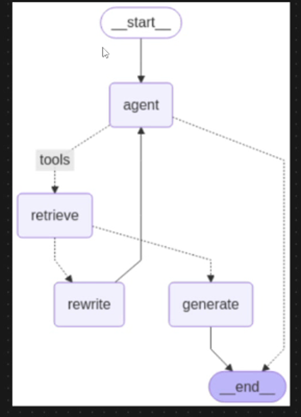

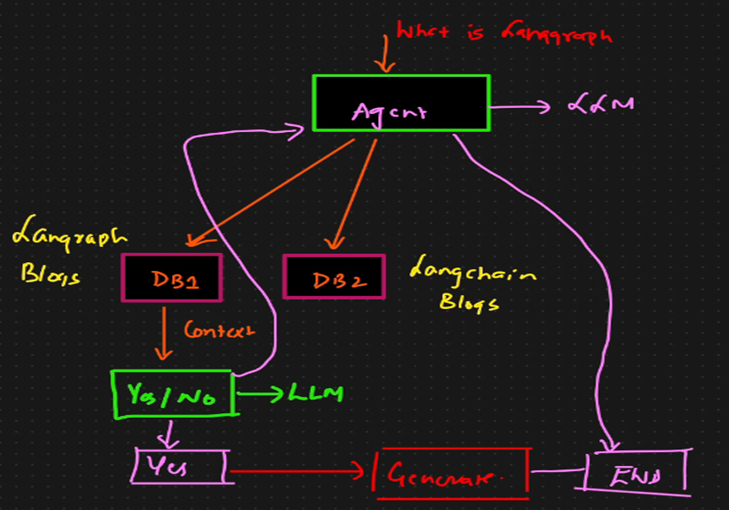

### 🟢 Start with an agent node.
•	This agent is connected to:

o	📁 Vector DB 1 (for LangGraph blocks)

o	📁 Vector DB 2 (for LangChain blocks)

•	🧠 Agent uses LLM (Language Model) to decide:

o	Which vector DB to use.

o	Whether the retrieved content is good or bad.

•	If the content is good ✅, generate a summary for the user.

•	If the content is bad ❌, the query is rewritten ✍️ and retried.

### 🧩 Example Use-Case:
•	❓ User Query: "What is LangGraph?"

•	🧠 Agent understands this is about LangGraph, so it calls Vector DB 1.

•	📄 Retrieves some content from DB1.

•	🤖 Another agent node checks: Is this content relevant?

o	If YES ✅, generate an answer.

o	If NO ❌, ✍️ rewrite the query to be more specific.

	E.g., "What are the key features of LangGraph?"


### Agentic RAG

In [ ]:
#🧪 STEP 1: Load Environment and Initialize LLM
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Set API keys as environment variables (assumes .env has these keys)
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

from langchain_groq import ChatGroq

# Initialize the Groq model (the LLM)
llm = ChatGroq(model="llama-3.3-70b-versatile")

# Quick test to see if the model works
result = llm.invoke("Hello")
print(result)
# content='Hello. How can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.020958287, 'prompt_time': 0.001889287, 'queue_time': 0.063370563, 'total_time': 0.022847574}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--32287e27-71b1-4e73-8a23-900d1b490ea6-0' usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46}

#📌 Explanation:
#You load your API keys and initialize the Groq LLM model called "qwen-qwq-32b". You also do a quick test call to confirm the model is working.

#🧰 STEP 2: Load and Split Documents from URLs
from langchain_community.document_loaders import WebBaseLoader


# List of URLs to load documents from
urls = [
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

# Load docs from URLs (each URL returns a list of documents)
# Since urls is form of list so we use list [] 
docs = [WebBaseLoader(url).load() for url in urls]
docs
# [[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
#  [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    Get started\n    \n  \n\n\n\n\n\n\n\n\n            Get started\n          \n\n\n\n\n\n    Quickstarts\n    \n  \n\n\n\n\n\n            Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent\n    \n  \n\n\n\n\n\n    Build a custom workflow\n    \n  \n\n\n\n\n\n\n    Run a local server\n    \n  \n\n\n\n\n\n\n\n\n\n    General concepts\n    \n  \n\n\n\n\n\n            General concepts\n          \n\n\n\n\n\n    Workflows & agents\n    \n  \n\n\n\n\n    Workflows & agents\n    \n  \n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Set up\n    \n\n\n\n\n\n      Building Blocks: The Augmented LLM\n    \n\n\n\n\n\n      Prompt chaining\n    \n\n\n\n\n\n      Parallelization\n    \n\n\n\n\n\n      Routing\n    \n\n\n\n\n\n      Orchestrator-Worker\n    \n\n\n\n\n\n      Evaluator-optimizer\n    \n\n\n\n\n\n      Agent\n    \n\n\n\n\n\n\n      Pre-built\n    \n\n\n\n\n\n\n\n\n      What LangGraph provides\n    \n\n\n\n\n\n\n      Persistence: Human-in-the-Loop\n    \n\n\n\n\n\n      Persistence: Memory\n    \n\n\n\n\n\n      Streaming\n    \n\n\n\n\n\n      Deployment\n    \n\n\n\n\n\n\n\n\n\n\n\n    Agent architectures\n    \n  \n\n\n\n\n\n\n\n\n\n\n\n    Guides\n    \n  \n\n\n\n\n\n\n    Reference\n    \n  \n\n\n\n\n\n\n    Examples\n    \n  \n\n\n\n\n\n\n    Additional resources\n    \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Set up\n    \n\n\n\n\n\n      Building Blocks: The Augmented LLM\n    \n\n\n\n\n\n      Prompt chaining\n    \n\n\n\n\n\n      Parallelization\n    \n\n\n\n\n\n      Routing\n    \n\n\n\n\n\n      Orchestrator-Worker\n    \n\n\n\n\n\n      Evaluator-optimizer\n    \n\n\n\n\n\n      Agent\n    \n\n\n\n\n\n\n      Pre-built\n    \n\n\n\n\n\n\n\n\n      What LangGraph provides\n    \n\n\n\n\n\n\n      Persistence: Human-in-the-Loop\n    \n\n\n\n\n\n      Persistence: Memory\n    \n\n\n\n\n\n      Streaming\n    \n\n\n\n\n\n      Deployment\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWorkflows and Agents¶\nThis guide reviews common patterns for agentic systems. In describing these systems, it can be useful to make a distinction between "workflows" and "agents". One way to think about this difference is nicely explained in Anthropic\'s Building Effective Agents blog post:\n\nWorkflows are systems where LLMs and tools are orchestrated through predefined code paths.\nAgents, on the other hand, are systems where LLMs dynamically direct their own processes and tool usage, maintaining control over how they accomplish tasks.\n\nHere is a simple way to visualize these differences:\n\nWhen building agents and workflows, LangGraph offers a number of benefits including persistence, streaming, and support for debugging as well as deployment.\nSet up¶\nYou can use any chat model that supports structured outputs and tool calling. Below, we show the process of installing the packages, setting API keys, and testing structured outputs / tool calling for Anthropic.\n\nInstall dependencies\npip install langchain_core langchain-anthropic langgraph\n\n\nInitialize an LLM\nAPI Reference: ChatAnthropic\nimport os\nimport getpass\n\nfrom langchain_anthropic import ChatAnthropic\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")\n\n\n_set_env("ANTHROPIC_API_KEY")\n\nllm = ChatAnthropic(model="claude-3-5-sonnet-latest")\n\nBuilding Blocks: The Augmented LLM¶\nLLM have augmentations that support building workflows and agents. These include structured outputs and tool calling, as shown in this image from the Anthropic blog on Building Effective Agents:\n\n# Schema for structured output\nfrom pydantic import BaseModel, Field\n\nclass SearchQuery(BaseModel):\n    search_query: str = Field(None, description="Query that is optimized web search.")\n    justification: str = Field(\n        None, description="Why this query is relevant to the user\'s request."\n    )\n\n\n# Augment the LLM with schema for structured output\nstructured_llm = llm.with_structured_output(SearchQuery)\n\n# Invoke the augmented LLM\noutput = structured_llm.invoke("How does Calcium CT score relate to high cholesterol?")\n\n# Define a tool\ndef multiply(a: int, b: int) -> int:\n    return a * b\n\n# Augment the LLM with tools\nllm_with_tools = llm.bind_tools([multiply])\n\n# Invoke the LLM with input that triggers the tool call\nmsg = llm_with_tools.invoke("What is 2 times 3?")\n\n# Get the tool call\nmsg.tool_calls\n\nPrompt chaining¶\nIn prompt chaining, each LLM call processes the output of the previous one.\nAs noted in the Anthropic blog on Building Effective Agents:\n\nPrompt chaining decomposes a task into a sequence of steps, where each LLM call processes the output of the previous one. You can add programmatic checks (see "gate" in the diagram below) on any intermediate steps to ensure that the process is still on track.\nWhen to use this workflow: This workflow is ideal for situations where the task can be easily and cleanly decomposed into fixed subtasks. The main goal is to trade off latency for higher accuracy, by making each LLM call an easier task.\n\n\nGraph APIFunctional API\n\n\nfrom typing_extensions import TypedDict\nfrom langgraph.graph import StateGraph, START, END\nfrom IPython.display import Image, display\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str\n    joke: str\n    improved_joke: str\n    final_joke: str\n\n\n# Nodes\ndef generate_joke(state: State):\n    """First LLM call to generate initial joke"""\n\n    msg = llm.invoke(f"Write a short joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef check_punchline(state: State):\n    """Gate function to check if the joke has a punchline"""\n\n    # Simple check - does the joke contain "?" or "!"\n    if "?" in state["joke"] or "!" in state["joke"]:\n        return "Pass"\n    return "Fail"\n\n\ndef improve_joke(state: State):\n    """Second LLM call to improve the joke"""\n\n    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state[\'joke\']}")\n    return {"improved_joke": msg.content}\n\n\ndef polish_joke(state: State):\n    """Third LLM call for final polish"""\n\n    msg = llm.invoke(f"Add a surprising twist to this joke: {state[\'improved_joke\']}")\n    return {"final_joke": msg.content}\n\n\n# Build workflow\nworkflow = StateGraph(State)\n\n# Add nodes\nworkflow.add_node("generate_joke", generate_joke)\nworkflow.add_node("improve_joke", improve_joke)\nworkflow.add_node("polish_joke", polish_joke)\n\n# Add edges to connect nodes\nworkflow.add_edge(START, "generate_joke")\nworkflow.add_conditional_edges(\n    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}\n)\nworkflow.add_edge("improve_joke", "polish_joke")\nworkflow.add_edge("polish_joke", END)\n\n# Compile\nchain = workflow.compile()\n\n# Show workflow\ndisplay(Image(chain.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = chain.invoke({"topic": "cats"})\nprint("Initial joke:")\nprint(state["joke"])\nprint("\\n--- --- ---\\n")\nif "improved_joke" in state:\n    print("Improved joke:")\n    print(state["improved_joke"])\n    print("\\n--- --- ---\\n")\n\n    print("Final joke:")\n    print(state["final_joke"])\nelse:\n    print("Joke failed quality gate - no punchline detected!")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/a0281fca-3a71-46de-beee-791468607b75/r\nResources:\nLangChain Academy\nSee our lesson on Prompt Chaining here.\n\n\nfrom langgraph.func import entrypoint, task\n\n\n# Tasks\n@task\ndef generate_joke(topic: str):\n    """First LLM call to generate initial joke"""\n    msg = llm.invoke(f"Write a short joke about {topic}")\n    return msg.content\n\n\ndef check_punchline(joke: str):\n    """Gate function to check if the joke has a punchline"""\n    # Simple check - does the joke contain "?" or "!"\n    if "?" in joke or "!" in joke:\n        return "Fail"\n\n    return "Pass"\n\n\n@task\ndef improve_joke(joke: str):\n    """Second LLM call to improve the joke"""\n    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {joke}")\n    return msg.content\n\n\n@task\ndef polish_joke(joke: str):\n    """Third LLM call for final polish"""\n    msg = llm.invoke(f"Add a surprising twist to this joke: {joke}")\n    return msg.content\n\n\n@entrypoint()\ndef prompt_chaining_workflow(topic: str):\n    original_joke = generate_joke(topic).result()\n    if check_punchline(original_joke) == "Pass":\n        return original_joke\n\n    improved_joke = improve_joke(original_joke).result()\n    return polish_joke(improved_joke).result()\n\n# Invoke\nfor step in prompt_chaining_workflow.stream("cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/332fa4fc-b6ca-416e-baa3-161625e69163/r\n\n\n\nParallelization¶\nWith parallelization, LLMs work simultaneously on a task:\n\nLLMs can sometimes work simultaneously on a task and have their outputs aggregated programmatically. This workflow, parallelization, manifests in two key variations: Sectioning: Breaking a task into independent subtasks run in parallel. Voting: Running the same task multiple times to get diverse outputs.\nWhen to use this workflow: Parallelization is effective when the divided subtasks can be parallelized for speed, or when multiple perspectives or attempts are needed for higher confidence results. For complex tasks with multiple considerations, LLMs generally perform better when each consideration is handled by a separate LLM call, allowing focused attention on each specific aspect.\n\n\nGraph APIFunctional API\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str\n    joke: str\n    story: str\n    poem: str\n    combined_output: str\n\n\n# Nodes\ndef call_llm_1(state: State):\n    """First LLM call to generate initial joke"""\n\n    msg = llm.invoke(f"Write a joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef call_llm_2(state: State):\n    """Second LLM call to generate story"""\n\n    msg = llm.invoke(f"Write a story about {state[\'topic\']}")\n    return {"story": msg.content}\n\n\ndef call_llm_3(state: State):\n    """Third LLM call to generate poem"""\n\n    msg = llm.invoke(f"Write a poem about {state[\'topic\']}")\n    return {"poem": msg.content}\n\n\ndef aggregator(state: State):\n    """Combine the joke and story into a single output"""\n\n    combined = f"Here\'s a story, joke, and poem about {state[\'topic\']}!\\n\\n"\n    combined += f"STORY:\\n{state[\'story\']}\\n\\n"\n    combined += f"JOKE:\\n{state[\'joke\']}\\n\\n"\n    combined += f"POEM:\\n{state[\'poem\']}"\n    return {"combined_output": combined}\n\n\n# Build workflow\nparallel_builder = StateGraph(State)\n\n# Add nodes\nparallel_builder.add_node("call_llm_1", call_llm_1)\nparallel_builder.add_node("call_llm_2", call_llm_2)\nparallel_builder.add_node("call_llm_3", call_llm_3)\nparallel_builder.add_node("aggregator", aggregator)\n\n# Add edges to connect nodes\nparallel_builder.add_edge(START, "call_llm_1")\nparallel_builder.add_edge(START, "call_llm_2")\nparallel_builder.add_edge(START, "call_llm_3")\nparallel_builder.add_edge("call_llm_1", "aggregator")\nparallel_builder.add_edge("call_llm_2", "aggregator")\nparallel_builder.add_edge("call_llm_3", "aggregator")\nparallel_builder.add_edge("aggregator", END)\nparallel_workflow = parallel_builder.compile()\n\n# Show workflow\ndisplay(Image(parallel_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = parallel_workflow.invoke({"topic": "cats"})\nprint(state["combined_output"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/3be2e53c-ca94-40dd-934f-82ff87fac277/r\nResources:\nDocumentation\nSee our documentation on parallelization here.\nLangChain Academy\nSee our lesson on parallelization here.\n\n\n@task\ndef call_llm_1(topic: str):\n    """First LLM call to generate initial joke"""\n    msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content\n\n\n@task\ndef call_llm_2(topic: str):\n    """Second LLM call to generate story"""\n    msg = llm.invoke(f"Write a story about {topic}")\n    return msg.content\n\n\n@task\ndef call_llm_3(topic):\n    """Third LLM call to generate poem"""\n    msg = llm.invoke(f"Write a poem about {topic}")\n    return msg.content\n\n\n@task\ndef aggregator(topic, joke, story, poem):\n    """Combine the joke and story into a single output"""\n\n    combined = f"Here\'s a story, joke, and poem about {topic}!\\n\\n"\n    combined += f"STORY:\\n{story}\\n\\n"\n    combined += f"JOKE:\\n{joke}\\n\\n"\n    combined += f"POEM:\\n{poem}"\n    return combined\n\n\n# Build workflow\n@entrypoint()\ndef parallel_workflow(topic: str):\n    joke_fut = call_llm_1(topic)\n    story_fut = call_llm_2(topic)\n    poem_fut = call_llm_3(topic)\n    return aggregator(\n        topic, joke_fut.result(), story_fut.result(), poem_fut.result()\n    ).result()\n\n# Invoke\nfor step in parallel_workflow.stream("cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/623d033f-e814-41e9-80b1-75e6abb67801/r\n\n\n\nRouting¶\nRouting classifies an input and directs it to a followup task. As noted in the Anthropic blog on Building Effective Agents:\n\nRouting classifies an input and directs it to a specialized followup task. This workflow allows for separation of concerns, and building more specialized prompts. Without this workflow, optimizing for one kind of input can hurt performance on other inputs.\nWhen to use this workflow: Routing works well for complex tasks where there are distinct categories that are better handled separately, and where classification can be handled accurately, either by an LLM or a more traditional classification model/algorithm.\n\n\nGraph APIFunctional API\n\n\nfrom typing_extensions import Literal\nfrom langchain_core.messages import HumanMessage, SystemMessage\n\n\n# Schema for structured output to use as routing logic\nclass Route(BaseModel):\n    step: Literal["poem", "story", "joke"] = Field(\n        None, description="The next step in the routing process"\n    )\n\n\n# Augment the LLM with schema for structured output\nrouter = llm.with_structured_output(Route)\n\n\n# State\nclass State(TypedDict):\n    input: str\n    decision: str\n    output: str\n\n\n# Nodes\ndef llm_call_1(state: State):\n    """Write a story"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_2(state: State):\n    """Write a joke"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_3(state: State):\n    """Write a poem"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_router(state: State):\n    """Route the input to the appropriate node"""\n\n    # Run the augmented LLM with structured output to serve as routing logic\n    decision = router.invoke(\n        [\n            SystemMessage(\n                content="Route the input to story, joke, or poem based on the user\'s request."\n            ),\n            HumanMessage(content=state["input"]),\n        ]\n    )\n\n    return {"decision": decision.step}\n\n\n# Conditional edge function to route to the appropriate node\ndef route_decision(state: State):\n    # Return the node name you want to visit next\n    if state["decision"] == "story":\n        return "llm_call_1"\n    elif state["decision"] == "joke":\n        return "llm_call_2"\n    elif state["decision"] == "poem":\n        return "llm_call_3"\n\n\n# Build workflow\nrouter_builder = StateGraph(State)\n\n# Add nodes\nrouter_builder.add_node("llm_call_1", llm_call_1)\nrouter_builder.add_node("llm_call_2", llm_call_2)\nrouter_builder.add_node("llm_call_3", llm_call_3)\nrouter_builder.add_node("llm_call_router", llm_call_router)\n\n# Add edges to connect nodes\nrouter_builder.add_edge(START, "llm_call_router")\nrouter_builder.add_conditional_edges(\n    "llm_call_router",\n    route_decision,\n    {  # Name returned by route_decision : Name of next node to visit\n        "llm_call_1": "llm_call_1",\n        "llm_call_2": "llm_call_2",\n        "llm_call_3": "llm_call_3",\n    },\n)\nrouter_builder.add_edge("llm_call_1", END)\nrouter_builder.add_edge("llm_call_2", END)\nrouter_builder.add_edge("llm_call_3", END)\n\n# Compile workflow\nrouter_workflow = router_builder.compile()\n\n# Show the workflow\ndisplay(Image(router_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = router_workflow.invoke({"input": "Write me a joke about cats"})\nprint(state["output"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/c4580b74-fe91-47e4-96fe-7fac598d509c/r\nResources:\nLangChain Academy\nSee our lesson on routing here.\nExamples\nHere is RAG workflow that routes questions. See our video here.\n\n\nfrom typing_extensions import Literal\nfrom pydantic import BaseModel\nfrom langchain_core.messages import HumanMessage, SystemMessage\n\n\n# Schema for structured output to use as routing logic\nclass Route(BaseModel):\n    step: Literal["poem", "story", "joke"] = Field(\n        None, description="The next step in the routing process"\n    )\n\n\n# Augment the LLM with schema for structured output\nrouter = llm.with_structured_output(Route)\n\n\n@task\ndef llm_call_1(input_: str):\n    """Write a story"""\n    result = llm.invoke(input_)\n    return result.content\n\n\n@task\ndef llm_call_2(input_: str):\n    """Write a joke"""\n    result = llm.invoke(input_)\n    return result.content\n\n\n@task\ndef llm_call_3(input_: str):\n    """Write a poem"""\n    result = llm.invoke(input_)\n    return result.content\n\n\ndef llm_call_router(input_: str):\n    """Route the input to the appropriate node"""\n    # Run the augmented LLM with structured output to serve as routing logic\n    decision = router.invoke(\n        [\n            SystemMessage(\n                content="Route the input to story, joke, or poem based on the user\'s request."\n            ),\n            HumanMessage(content=input_),\n        ]\n    )\n    return decision.step\n\n\n# Create workflow\n@entrypoint()\ndef router_workflow(input_: str):\n    next_step = llm_call_router(input_)\n    if next_step == "story":\n        llm_call = llm_call_1\n    elif next_step == "joke":\n        llm_call = llm_call_2\n    elif next_step == "poem":\n        llm_call = llm_call_3\n\n    return llm_call(input_).result()\n\n# Invoke\nfor step in router_workflow.stream("Write me a joke about cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/5e2eb979-82dd-402c-b1a0-a8cceaf2a28a/r\n\n\n\nOrchestrator-Worker¶\nWith orchestrator-worker, an orchestrator breaks down a task and delegates each sub-task to workers. As noted in the Anthropic blog on Building Effective Agents:\n\nIn the orchestrator-workers workflow, a central LLM dynamically breaks down tasks, delegates them to worker LLMs, and synthesizes their results.\nWhen to use this workflow: This workflow is well-suited for complex tasks where you can\'t predict the subtasks needed (in coding, for example, the number of files that need to be changed and the nature of the change in each file likely depend on the task). Whereas it\'s topographically similar, the key difference from parallelization is its flexibility—subtasks aren\'t pre-defined, but determined by the orchestrator based on the specific input.\n\n\nGraph APIFunctional API\n\n\nfrom typing import Annotated, List\nimport operator\n\n\n# Schema for structured output to use in planning\nclass Section(BaseModel):\n    name: str = Field(\n        description="Name for this section of the report.",\n    )\n    description: str = Field(\n        description="Brief overview of the main topics and concepts to be covered in this section.",\n    )\n\n\nclass Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\nCreating Workers in LangGraph\nBecause orchestrator-worker workflows are common, LangGraph has the Send API to support this. It lets you dynamically create worker nodes and send each one a specific input. Each worker has its own state, and all worker outputs are written to a shared state key that is accessible to the orchestrator graph. This gives the orchestrator access to all worker output and allows it to synthesize them into a final output. As you can see below, we iterate over a list of sections and Send each to a worker node. See further documentation here and here.\nfrom langgraph.types import Send\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str  # Report topic\n    sections: list[Section]  # List of report sections\n    completed_sections: Annotated[\n        list, operator.add\n    ]  # All workers write to this key in parallel\n    final_report: str  # Final report\n\n\n# Worker state\nclass WorkerState(TypedDict):\n    section: Section\n    completed_sections: Annotated[list, operator.add]\n\n\n# Nodes\ndef orchestrator(state: State):\n    """Orchestrator that generates a plan for the report"""\n\n    # Generate queries\n    report_sections = planner.invoke(\n        [\n            SystemMessage(content="Generate a plan for the report."),\n            HumanMessage(content=f"Here is the report topic: {state[\'topic\']}"),\n        ]\n    )\n\n    return {"sections": report_sections.sections}\n\n\ndef llm_call(state: WorkerState):\n    """Worker writes a section of the report"""\n\n    # Generate section\n    section = llm.invoke(\n        [\n            SystemMessage(\n                content="Write a report section following the provided name and description. Include no preamble for each section. Use markdown formatting."\n            ),\n            HumanMessage(\n                content=f"Here is the section name: {state[\'section\'].name} and description: {state[\'section\'].description}"\n            ),\n        ]\n    )\n\n    # Write the updated section to completed sections\n    return {"completed_sections": [section.content]}\n\n\ndef synthesizer(state: State):\n    """Synthesize full report from sections"""\n\n    # List of completed sections\n    completed_sections = state["completed_sections"]\n\n    # Format completed section to str to use as context for final sections\n    completed_report_sections = "\\n\\n---\\n\\n".join(completed_sections)\n\n    return {"final_report": completed_report_sections}\n\n\n# Conditional edge function to create llm_call workers that each write a section of the report\ndef assign_workers(state: State):\n    """Assign a worker to each section in the plan"""\n\n    # Kick off section writing in parallel via Send() API\n    return [Send("llm_call", {"section": s}) for s in state["sections"]]\n\n\n# Build workflow\norchestrator_worker_builder = StateGraph(State)\n\n# Add the nodes\norchestrator_worker_builder.add_node("orchestrator", orchestrator)\norchestrator_worker_builder.add_node("llm_call", llm_call)\norchestrator_worker_builder.add_node("synthesizer", synthesizer)\n\n# Add edges to connect nodes\norchestrator_worker_builder.add_edge(START, "orchestrator")\norchestrator_worker_builder.add_conditional_edges(\n    "orchestrator", assign_workers, ["llm_call"]\n)\norchestrator_worker_builder.add_edge("llm_call", "synthesizer")\norchestrator_worker_builder.add_edge("synthesizer", END)\n\n# Compile the workflow\norchestrator_worker = orchestrator_worker_builder.compile()\n\n# Show the workflow\ndisplay(Image(orchestrator_worker.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = orchestrator_worker.invoke({"topic": "Create a report on LLM scaling laws"})\n\nfrom IPython.display import Markdown\nMarkdown(state["final_report"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/78cbcfc3-38bf-471d-b62a-b299b144237d/r\nResources:\nLangChain Academy\nSee our lesson on orchestrator-worker here.\nExamples\nHere is a project that uses orchestrator-worker for report planning and writing. See our video here.\n\n\nfrom typing import List\n\n\n# Schema for structured output to use in planning\nclass Section(BaseModel):\n    name: str = Field(\n        description="Name for this section of the report.",\n    )\n    description: str = Field(\n        description="Brief overview of the main topics and concepts to be covered in this section.",\n    )\n\n\nclass Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\n\n@task\ndef orchestrator(topic: str):\n    """Orchestrator that generates a plan for the report"""\n    # Generate queries\n    report_sections = planner.invoke(\n        [\n            SystemMessage(content="Generate a plan for the report."),\n            HumanMessage(content=f"Here is the report topic: {topic}"),\n        ]\n    )\n\n    return report_sections.sections\n\n\n@task\ndef llm_call(section: Section):\n    """Worker writes a section of the report"""\n\n    # Generate section\n    result = llm.invoke(\n        [\n            SystemMessage(content="Write a report section."),\n            HumanMessage(\n                content=f"Here is the section name: {section.name} and description: {section.description}"\n            ),\n        ]\n    )\n\n    # Write the updated section to completed sections\n    return result.content\n\n\n@task\ndef synthesizer(completed_sections: list[str]):\n    """Synthesize full report from sections"""\n    final_report = "\\n\\n---\\n\\n".join(completed_sections)\n    return final_report\n\n\n@entrypoint()\ndef orchestrator_worker(topic: str):\n    sections = orchestrator(topic).result()\n    section_futures = [llm_call(section) for section in sections]\n    final_report = synthesizer(\n        [section_fut.result() for section_fut in section_futures]\n    ).result()\n    return final_report\n\n# Invoke\nreport = orchestrator_worker.invoke("Create a report on LLM scaling laws")\nfrom IPython.display import Markdown\nMarkdown(report)\n\nLangSmith Trace\nhttps://smith.langchain.com/public/75a636d0-6179-4a12-9836-e0aa571e87c5/r\n\n\n\nEvaluator-optimizer¶\nIn the evaluator-optimizer workflow, one LLM call generates a response while another provides evaluation and feedback in a loop:\n\nWhen to use this workflow: This workflow is particularly effective when we have clear evaluation criteria, and when iterative refinement provides measurable value. The two signs of good fit are, first, that LLM responses can be demonstrably improved when a human articulates their feedback; and second, that the LLM can provide such feedback. This is analogous to the iterative writing process a human writer might go through when producing a polished document.\n\n\nGraph APIFunctional API\n\n\n# Graph state\nclass State(TypedDict):\n    joke: str\n    topic: str\n    feedback: str\n    funny_or_not: str\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )\n\n\n# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)\n\n\n# Nodes\ndef llm_call_generator(state: State):\n    """LLM generates a joke"""\n\n    if state.get("feedback"):\n        msg = llm.invoke(\n            f"Write a joke about {state[\'topic\']} but take into account the feedback: {state[\'feedback\']}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef llm_call_evaluator(state: State):\n    """LLM evaluates the joke"""\n\n    grade = evaluator.invoke(f"Grade the joke {state[\'joke\']}")\n    return {"funny_or_not": grade.grade, "feedback": grade.feedback}\n\n\n# Conditional edge function to route back to joke generator or end based upon feedback from the evaluator\ndef route_joke(state: State):\n    """Route back to joke generator or end based upon feedback from the evaluator"""\n\n    if state["funny_or_not"] == "funny":\n        return "Accepted"\n    elif state["funny_or_not"] == "not funny":\n        return "Rejected + Feedback"\n\n\n# Build workflow\noptimizer_builder = StateGraph(State)\n\n# Add the nodes\noptimizer_builder.add_node("llm_call_generator", llm_call_generator)\noptimizer_builder.add_node("llm_call_evaluator", llm_call_evaluator)\n\n# Add edges to connect nodes\noptimizer_builder.add_edge(START, "llm_call_generator")\noptimizer_builder.add_edge("llm_call_generator", "llm_call_evaluator")\noptimizer_builder.add_conditional_edges(\n    "llm_call_evaluator",\n    route_joke,\n    {  # Name returned by route_joke : Name of next node to visit\n        "Accepted": END,\n        "Rejected + Feedback": "llm_call_generator",\n    },\n)\n\n# Compile the workflow\noptimizer_workflow = optimizer_builder.compile()\n\n# Show the workflow\ndisplay(Image(optimizer_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = optimizer_workflow.invoke({"topic": "Cats"})\nprint(state["joke"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/86ab3e60-2000-4bff-b988-9b89a3269789/r\nResources:\nExamples\nHere is an assistant that uses evaluator-optimizer to improve a report. See our video here.\nHere is a RAG workflow that grades answers for hallucinations or errors. See our video here.\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )\n\n\n# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)\n\n\n# Nodes\n@task\ndef llm_call_generator(topic: str, feedback: Feedback):\n    """LLM generates a joke"""\n    if feedback:\n        msg = llm.invoke(\n            f"Write a joke about {topic} but take into account the feedback: {feedback}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content\n\n\n@task\ndef llm_call_evaluator(joke: str):\n    """LLM evaluates the joke"""\n    feedback = evaluator.invoke(f"Grade the joke {joke}")\n    return feedback\n\n\n@entrypoint()\ndef optimizer_workflow(topic: str):\n    feedback = None\n    while True:\n        joke = llm_call_generator(topic, feedback).result()\n        feedback = llm_call_evaluator(joke).result()\n        if feedback.grade == "funny":\n            break\n\n    return joke\n\n# Invoke\nfor step in optimizer_workflow.stream("Cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/f66830be-4339-4a6b-8a93-389ce5ae27b4/r\n\n\n\nAgent¶\nAgents are typically implemented as an LLM performing actions (via tool-calling) based on environmental feedback in a loop. As noted in the Anthropic blog on Building Effective Agents:\n\nAgents can handle sophisticated tasks, but their implementation is often straightforward. They are typically just LLMs using tools based on environmental feedback in a loop. It is therefore crucial to design toolsets and their documentation clearly and thoughtfully.\nWhen to use agents: Agents can be used for open-ended problems where it\'s difficult or impossible to predict the required number of steps, and where you can\'t hardcode a fixed path. The LLM will potentially operate for many turns, and you must have some level of trust in its decision-making. Agents\' autonomy makes them ideal for scaling tasks in trusted environments.\n\n\nAPI Reference: tool\nfrom langchain_core.tools import tool\n\n\n# Define tools\n@tool\ndef multiply(a: int, b: int) -> int:\n    """Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a * b\n\n\n@tool\ndef add(a: int, b: int) -> int:\n    """Adds a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a + b\n\n\n@tool\ndef divide(a: int, b: int) -> float:\n    """Divide a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a / b\n\n\n# Augment the LLM with tools\ntools = [add, multiply, divide]\ntools_by_name = {tool.name: tool for tool in tools}\nllm_with_tools = llm.bind_tools(tools)\n\nGraph APIFunctional API\n\n\nfrom langgraph.graph import MessagesState\nfrom langchain_core.messages import SystemMessage, HumanMessage, ToolMessage\n\n\n# Nodes\ndef llm_call(state: MessagesState):\n    """LLM decides whether to call a tool or not"""\n\n    return {\n        "messages": [\n            llm_with_tools.invoke(\n                [\n                    SystemMessage(\n                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n                    )\n                ]\n                + state["messages"]\n            )\n        ]\n    }\n\n\ndef tool_node(state: dict):\n    """Performs the tool call"""\n\n    result = []\n    for tool_call in state["messages"][-1].tool_calls:\n        tool = tools_by_name[tool_call["name"]]\n        observation = tool.invoke(tool_call["args"])\n        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))\n    return {"messages": result}\n\n\n# Conditional edge function to route to the tool node or end based upon whether the LLM made a tool call\ndef should_continue(state: MessagesState) -> Literal["Action", END]:\n    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""\n\n    messages = state["messages"]\n    last_message = messages[-1]\n    # If the LLM makes a tool call, then perform an action\n    if last_message.tool_calls:\n        return "Action"\n    # Otherwise, we stop (reply to the user)\n    return END\n\n\n# Build workflow\nagent_builder = StateGraph(MessagesState)\n\n# Add nodes\nagent_builder.add_node("llm_call", llm_call)\nagent_builder.add_node("environment", tool_node)\n\n# Add edges to connect nodes\nagent_builder.add_edge(START, "llm_call")\nagent_builder.add_conditional_edges(\n    "llm_call",\n    should_continue,\n    {\n        # Name returned by should_continue : Name of next node to visit\n        "Action": "environment",\n        END: END,\n    },\n)\nagent_builder.add_edge("environment", "llm_call")\n\n# Compile the agent\nagent = agent_builder.compile()\n\n# Show the agent\ndisplay(Image(agent.get_graph(xray=True).draw_mermaid_png()))\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nmessages = agent.invoke({"messages": messages})\nfor m in messages["messages"]:\n    m.pretty_print()\n\nLangSmith Trace\nhttps://smith.langchain.com/public/051f0391-6761-4f8c-a53b-22231b016690/r\nResources:\nLangChain Academy\nSee our lesson on agents here.\nExamples\nHere is a project that uses a tool calling agent to create / store long-term memories.\n\n\nfrom langgraph.graph import add_messages\nfrom langchain_core.messages import (\n    SystemMessage,\n    HumanMessage,\n    BaseMessage,\n    ToolCall,\n)\n\n\n@task\ndef call_llm(messages: list[BaseMessage]):\n    """LLM decides whether to call a tool or not"""\n    return llm_with_tools.invoke(\n        [\n            SystemMessage(\n                content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n            )\n        ]\n        + messages\n    )\n\n\n@task\ndef call_tool(tool_call: ToolCall):\n    """Performs the tool call"""\n    tool = tools_by_name[tool_call["name"]]\n    return tool.invoke(tool_call)\n\n\n@entrypoint()\ndef agent(messages: list[BaseMessage]):\n    llm_response = call_llm(messages).result()\n\n    while True:\n        if not llm_response.tool_calls:\n            break\n\n        # Execute tools\n        tool_result_futures = [\n            call_tool(tool_call) for tool_call in llm_response.tool_calls\n        ]\n        tool_results = [fut.result() for fut in tool_result_futures]\n        messages = add_messages(messages, [llm_response, *tool_results])\n        llm_response = call_llm(messages).result()\n\n    messages = add_messages(messages, llm_response)\n    return messages\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nfor chunk in agent.stream(messages, stream_mode="updates"):\n    print(chunk)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/42ae8bf9-3935-4504-a081-8ddbcbfc8b2e/r\n\n\n\nPre-built¶\nLangGraph also provides a pre-built method for creating an agent as defined above (using the create_react_agent function):\nhttps://langchain-ai.github.io/langgraph/how-tos/create-react-agent/\nAPI Reference: create_react_agent\nfrom langgraph.prebuilt import create_react_agent\n\n# Pass in:\n# (1) the augmented LLM with tools\n# (2) the tools list (which is used to create the tool node)\npre_built_agent = create_react_agent(llm, tools=tools)\n\n# Show the agent\ndisplay(Image(pre_built_agent.get_graph().draw_mermaid_png()))\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nmessages = pre_built_agent.invoke({"messages": messages})\nfor m in messages["messages"]:\n    m.pretty_print()\n\nLangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment, observability, and evaluation. See module 6 of LangChain Academy.\n\n\n\n\n\n\n\n  Back to top\n\n\n\n\n\n\n\n\n\n\n                Previous\n              \n\n                Run a local server\n              \n\n\n\n\n\n                Next\n              \n\n                Agent architectures\n              \n\n\n\n\n\n\n\n\n\n\n      Copyright © 2025 LangChain, Inc | Consent Preferences\n\n  \n  \n    Made with\n    \n      Material for MkDocs\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')],
#  [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]


# Flatten the list of lists into one list of documents
docs_list = [doc for sublist in docs for doc in sublist]
docs_list
# [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'),
#  Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    Get started\n    \n  \n\n\n\n\n\n\n\n\n            Get started\n          \n\n\n\n\n\n    Quickstarts\n    \n  \n\n\n\n\n\n            Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent\n    \n  \n\n\n\n\n\n    Build a custom workflow\n    \n  \n\n\n\n\n\n\n    Run a local server\n    \n  \n\n\n\n\n\n\n\n\n\n    General concepts\n    \n  \n\n\n\n\n\n            General concepts\n          \n\n\n\n\n\n    Workflows & agents\n    \n  \n\n\n\n\n    Workflows & agents\n    \n  \n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Set up\n    \n\n\n\n\n\n      Building Blocks: The Augmented LLM\n    \n\n\n\n\n\n      Prompt chaining\n    \n\n\n\n\n\n      Parallelization\n    \n\n\n\n\n\n      Routing\n    \n\n\n\n\n\n      Orchestrator-Worker\n    \n\n\n\n\n\n      Evaluator-optimizer\n    \n\n\n\n\n\n      Agent\n    \n\n\n\n\n\n\n      Pre-built\n    \n\n\n\n\n\n\n\n\n      What LangGraph provides\n    \n\n\n\n\n\n\n      Persistence: Human-in-the-Loop\n    \n\n\n\n\n\n      Persistence: Memory\n    \n\n\n\n\n\n      Streaming\n    \n\n\n\n\n\n      Deployment\n    \n\n\n\n\n\n\n\n\n\n\n\n    Agent architectures\n    \n  \n\n\n\n\n\n\n\n\n\n\n\n    Guides\n    \n  \n\n\n\n\n\n\n    Reference\n    \n  \n\n\n\n\n\n\n    Examples\n    \n  \n\n\n\n\n\n\n    Additional resources\n    \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Set up\n    \n\n\n\n\n\n      Building Blocks: The Augmented LLM\n    \n\n\n\n\n\n      Prompt chaining\n    \n\n\n\n\n\n      Parallelization\n    \n\n\n\n\n\n      Routing\n    \n\n\n\n\n\n      Orchestrator-Worker\n    \n\n\n\n\n\n      Evaluator-optimizer\n    \n\n\n\n\n\n      Agent\n    \n\n\n\n\n\n\n      Pre-built\n    \n\n\n\n\n\n\n\n\n      What LangGraph provides\n    \n\n\n\n\n\n\n      Persistence: Human-in-the-Loop\n    \n\n\n\n\n\n      Persistence: Memory\n    \n\n\n\n\n\n      Streaming\n    \n\n\n\n\n\n      Deployment\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWorkflows and Agents¶\nThis guide reviews common patterns for agentic systems. In describing these systems, it can be useful to make a distinction between "workflows" and "agents". One way to think about this difference is nicely explained in Anthropic\'s Building Effective Agents blog post:\n\nWorkflows are systems where LLMs and tools are orchestrated through predefined code paths.\nAgents, on the other hand, are systems where LLMs dynamically direct their own processes and tool usage, maintaining control over how they accomplish tasks.\n\nHere is a simple way to visualize these differences:\n\nWhen building agents and workflows, LangGraph offers a number of benefits including persistence, streaming, and support for debugging as well as deployment.\nSet up¶\nYou can use any chat model that supports structured outputs and tool calling. Below, we show the process of installing the packages, setting API keys, and testing structured outputs / tool calling for Anthropic.\n\nInstall dependencies\npip install langchain_core langchain-anthropic langgraph\n\n\nInitialize an LLM\nAPI Reference: ChatAnthropic\nimport os\nimport getpass\n\nfrom langchain_anthropic import ChatAnthropic\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")\n\n\n_set_env("ANTHROPIC_API_KEY")\n\nllm = ChatAnthropic(model="claude-3-5-sonnet-latest")\n\nBuilding Blocks: The Augmented LLM¶\nLLM have augmentations that support building workflows and agents. These include structured outputs and tool calling, as shown in this image from the Anthropic blog on Building Effective Agents:\n\n# Schema for structured output\nfrom pydantic import BaseModel, Field\n\nclass SearchQuery(BaseModel):\n    search_query: str = Field(None, description="Query that is optimized web search.")\n    justification: str = Field(\n        None, description="Why this query is relevant to the user\'s request."\n    )\n\n\n# Augment the LLM with schema for structured output\nstructured_llm = llm.with_structured_output(SearchQuery)\n\n# Invoke the augmented LLM\noutput = structured_llm.invoke("How does Calcium CT score relate to high cholesterol?")\n\n# Define a tool\ndef multiply(a: int, b: int) -> int:\n    return a * b\n\n# Augment the LLM with tools\nllm_with_tools = llm.bind_tools([multiply])\n\n# Invoke the LLM with input that triggers the tool call\nmsg = llm_with_tools.invoke("What is 2 times 3?")\n\n# Get the tool call\nmsg.tool_calls\n\nPrompt chaining¶\nIn prompt chaining, each LLM call processes the output of the previous one.\nAs noted in the Anthropic blog on Building Effective Agents:\n\nPrompt chaining decomposes a task into a sequence of steps, where each LLM call processes the output of the previous one. You can add programmatic checks (see "gate" in the diagram below) on any intermediate steps to ensure that the process is still on track.\nWhen to use this workflow: This workflow is ideal for situations where the task can be easily and cleanly decomposed into fixed subtasks. The main goal is to trade off latency for higher accuracy, by making each LLM call an easier task.\n\n\nGraph APIFunctional API\n\n\nfrom typing_extensions import TypedDict\nfrom langgraph.graph import StateGraph, START, END\nfrom IPython.display import Image, display\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str\n    joke: str\n    improved_joke: str\n    final_joke: str\n\n\n# Nodes\ndef generate_joke(state: State):\n    """First LLM call to generate initial joke"""\n\n    msg = llm.invoke(f"Write a short joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef check_punchline(state: State):\n    """Gate function to check if the joke has a punchline"""\n\n    # Simple check - does the joke contain "?" or "!"\n    if "?" in state["joke"] or "!" in state["joke"]:\n        return "Pass"\n    return "Fail"\n\n\ndef improve_joke(state: State):\n    """Second LLM call to improve the joke"""\n\n    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state[\'joke\']}")\n    return {"improved_joke": msg.content}\n\n\ndef polish_joke(state: State):\n    """Third LLM call for final polish"""\n\n    msg = llm.invoke(f"Add a surprising twist to this joke: {state[\'improved_joke\']}")\n    return {"final_joke": msg.content}\n\n\n# Build workflow\nworkflow = StateGraph(State)\n\n# Add nodes\nworkflow.add_node("generate_joke", generate_joke)\nworkflow.add_node("improve_joke", improve_joke)\nworkflow.add_node("polish_joke", polish_joke)\n\n# Add edges to connect nodes\nworkflow.add_edge(START, "generate_joke")\nworkflow.add_conditional_edges(\n    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}\n)\nworkflow.add_edge("improve_joke", "polish_joke")\nworkflow.add_edge("polish_joke", END)\n\n# Compile\nchain = workflow.compile()\n\n# Show workflow\ndisplay(Image(chain.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = chain.invoke({"topic": "cats"})\nprint("Initial joke:")\nprint(state["joke"])\nprint("\\n--- --- ---\\n")\nif "improved_joke" in state:\n    print("Improved joke:")\n    print(state["improved_joke"])\n    print("\\n--- --- ---\\n")\n\n    print("Final joke:")\n    print(state["final_joke"])\nelse:\n    print("Joke failed quality gate - no punchline detected!")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/a0281fca-3a71-46de-beee-791468607b75/r\nResources:\nLangChain Academy\nSee our lesson on Prompt Chaining here.\n\n\nfrom langgraph.func import entrypoint, task\n\n\n# Tasks\n@task\ndef generate_joke(topic: str):\n    """First LLM call to generate initial joke"""\n    msg = llm.invoke(f"Write a short joke about {topic}")\n    return msg.content\n\n\ndef check_punchline(joke: str):\n    """Gate function to check if the joke has a punchline"""\n    # Simple check - does the joke contain "?" or "!"\n    if "?" in joke or "!" in joke:\n        return "Fail"\n\n    return "Pass"\n\n\n@task\ndef improve_joke(joke: str):\n    """Second LLM call to improve the joke"""\n    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {joke}")\n    return msg.content\n\n\n@task\ndef polish_joke(joke: str):\n    """Third LLM call for final polish"""\n    msg = llm.invoke(f"Add a surprising twist to this joke: {joke}")\n    return msg.content\n\n\n@entrypoint()\ndef prompt_chaining_workflow(topic: str):\n    original_joke = generate_joke(topic).result()\n    if check_punchline(original_joke) == "Pass":\n        return original_joke\n\n    improved_joke = improve_joke(original_joke).result()\n    return polish_joke(improved_joke).result()\n\n# Invoke\nfor step in prompt_chaining_workflow.stream("cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/332fa4fc-b6ca-416e-baa3-161625e69163/r\n\n\n\nParallelization¶\nWith parallelization, LLMs work simultaneously on a task:\n\nLLMs can sometimes work simultaneously on a task and have their outputs aggregated programmatically. This workflow, parallelization, manifests in two key variations: Sectioning: Breaking a task into independent subtasks run in parallel. Voting: Running the same task multiple times to get diverse outputs.\nWhen to use this workflow: Parallelization is effective when the divided subtasks can be parallelized for speed, or when multiple perspectives or attempts are needed for higher confidence results. For complex tasks with multiple considerations, LLMs generally perform better when each consideration is handled by a separate LLM call, allowing focused attention on each specific aspect.\n\n\nGraph APIFunctional API\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str\n    joke: str\n    story: str\n    poem: str\n    combined_output: str\n\n\n# Nodes\ndef call_llm_1(state: State):\n    """First LLM call to generate initial joke"""\n\n    msg = llm.invoke(f"Write a joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef call_llm_2(state: State):\n    """Second LLM call to generate story"""\n\n    msg = llm.invoke(f"Write a story about {state[\'topic\']}")\n    return {"story": msg.content}\n\n\ndef call_llm_3(state: State):\n    """Third LLM call to generate poem"""\n\n    msg = llm.invoke(f"Write a poem about {state[\'topic\']}")\n    return {"poem": msg.content}\n\n\ndef aggregator(state: State):\n    """Combine the joke and story into a single output"""\n\n    combined = f"Here\'s a story, joke, and poem about {state[\'topic\']}!\\n\\n"\n    combined += f"STORY:\\n{state[\'story\']}\\n\\n"\n    combined += f"JOKE:\\n{state[\'joke\']}\\n\\n"\n    combined += f"POEM:\\n{state[\'poem\']}"\n    return {"combined_output": combined}\n\n\n# Build workflow\nparallel_builder = StateGraph(State)\n\n# Add nodes\nparallel_builder.add_node("call_llm_1", call_llm_1)\nparallel_builder.add_node("call_llm_2", call_llm_2)\nparallel_builder.add_node("call_llm_3", call_llm_3)\nparallel_builder.add_node("aggregator", aggregator)\n\n# Add edges to connect nodes\nparallel_builder.add_edge(START, "call_llm_1")\nparallel_builder.add_edge(START, "call_llm_2")\nparallel_builder.add_edge(START, "call_llm_3")\nparallel_builder.add_edge("call_llm_1", "aggregator")\nparallel_builder.add_edge("call_llm_2", "aggregator")\nparallel_builder.add_edge("call_llm_3", "aggregator")\nparallel_builder.add_edge("aggregator", END)\nparallel_workflow = parallel_builder.compile()\n\n# Show workflow\ndisplay(Image(parallel_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = parallel_workflow.invoke({"topic": "cats"})\nprint(state["combined_output"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/3be2e53c-ca94-40dd-934f-82ff87fac277/r\nResources:\nDocumentation\nSee our documentation on parallelization here.\nLangChain Academy\nSee our lesson on parallelization here.\n\n\n@task\ndef call_llm_1(topic: str):\n    """First LLM call to generate initial joke"""\n    msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content\n\n\n@task\ndef call_llm_2(topic: str):\n    """Second LLM call to generate story"""\n    msg = llm.invoke(f"Write a story about {topic}")\n    return msg.content\n\n\n@task\ndef call_llm_3(topic):\n    """Third LLM call to generate poem"""\n    msg = llm.invoke(f"Write a poem about {topic}")\n    return msg.content\n\n\n@task\ndef aggregator(topic, joke, story, poem):\n    """Combine the joke and story into a single output"""\n\n    combined = f"Here\'s a story, joke, and poem about {topic}!\\n\\n"\n    combined += f"STORY:\\n{story}\\n\\n"\n    combined += f"JOKE:\\n{joke}\\n\\n"\n    combined += f"POEM:\\n{poem}"\n    return combined\n\n\n# Build workflow\n@entrypoint()\ndef parallel_workflow(topic: str):\n    joke_fut = call_llm_1(topic)\n    story_fut = call_llm_2(topic)\n    poem_fut = call_llm_3(topic)\n    return aggregator(\n        topic, joke_fut.result(), story_fut.result(), poem_fut.result()\n    ).result()\n\n# Invoke\nfor step in parallel_workflow.stream("cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/623d033f-e814-41e9-80b1-75e6abb67801/r\n\n\n\nRouting¶\nRouting classifies an input and directs it to a followup task. As noted in the Anthropic blog on Building Effective Agents:\n\nRouting classifies an input and directs it to a specialized followup task. This workflow allows for separation of concerns, and building more specialized prompts. Without this workflow, optimizing for one kind of input can hurt performance on other inputs.\nWhen to use this workflow: Routing works well for complex tasks where there are distinct categories that are better handled separately, and where classification can be handled accurately, either by an LLM or a more traditional classification model/algorithm.\n\n\nGraph APIFunctional API\n\n\nfrom typing_extensions import Literal\nfrom langchain_core.messages import HumanMessage, SystemMessage\n\n\n# Schema for structured output to use as routing logic\nclass Route(BaseModel):\n    step: Literal["poem", "story", "joke"] = Field(\n        None, description="The next step in the routing process"\n    )\n\n\n# Augment the LLM with schema for structured output\nrouter = llm.with_structured_output(Route)\n\n\n# State\nclass State(TypedDict):\n    input: str\n    decision: str\n    output: str\n\n\n# Nodes\ndef llm_call_1(state: State):\n    """Write a story"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_2(state: State):\n    """Write a joke"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_3(state: State):\n    """Write a poem"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_router(state: State):\n    """Route the input to the appropriate node"""\n\n    # Run the augmented LLM with structured output to serve as routing logic\n    decision = router.invoke(\n        [\n            SystemMessage(\n                content="Route the input to story, joke, or poem based on the user\'s request."\n            ),\n            HumanMessage(content=state["input"]),\n        ]\n    )\n\n    return {"decision": decision.step}\n\n\n# Conditional edge function to route to the appropriate node\ndef route_decision(state: State):\n    # Return the node name you want to visit next\n    if state["decision"] == "story":\n        return "llm_call_1"\n    elif state["decision"] == "joke":\n        return "llm_call_2"\n    elif state["decision"] == "poem":\n        return "llm_call_3"\n\n\n# Build workflow\nrouter_builder = StateGraph(State)\n\n# Add nodes\nrouter_builder.add_node("llm_call_1", llm_call_1)\nrouter_builder.add_node("llm_call_2", llm_call_2)\nrouter_builder.add_node("llm_call_3", llm_call_3)\nrouter_builder.add_node("llm_call_router", llm_call_router)\n\n# Add edges to connect nodes\nrouter_builder.add_edge(START, "llm_call_router")\nrouter_builder.add_conditional_edges(\n    "llm_call_router",\n    route_decision,\n    {  # Name returned by route_decision : Name of next node to visit\n        "llm_call_1": "llm_call_1",\n        "llm_call_2": "llm_call_2",\n        "llm_call_3": "llm_call_3",\n    },\n)\nrouter_builder.add_edge("llm_call_1", END)\nrouter_builder.add_edge("llm_call_2", END)\nrouter_builder.add_edge("llm_call_3", END)\n\n# Compile workflow\nrouter_workflow = router_builder.compile()\n\n# Show the workflow\ndisplay(Image(router_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = router_workflow.invoke({"input": "Write me a joke about cats"})\nprint(state["output"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/c4580b74-fe91-47e4-96fe-7fac598d509c/r\nResources:\nLangChain Academy\nSee our lesson on routing here.\nExamples\nHere is RAG workflow that routes questions. See our video here.\n\n\nfrom typing_extensions import Literal\nfrom pydantic import BaseModel\nfrom langchain_core.messages import HumanMessage, SystemMessage\n\n\n# Schema for structured output to use as routing logic\nclass Route(BaseModel):\n    step: Literal["poem", "story", "joke"] = Field(\n        None, description="The next step in the routing process"\n    )\n\n\n# Augment the LLM with schema for structured output\nrouter = llm.with_structured_output(Route)\n\n\n@task\ndef llm_call_1(input_: str):\n    """Write a story"""\n    result = llm.invoke(input_)\n    return result.content\n\n\n@task\ndef llm_call_2(input_: str):\n    """Write a joke"""\n    result = llm.invoke(input_)\n    return result.content\n\n\n@task\ndef llm_call_3(input_: str):\n    """Write a poem"""\n    result = llm.invoke(input_)\n    return result.content\n\n\ndef llm_call_router(input_: str):\n    """Route the input to the appropriate node"""\n    # Run the augmented LLM with structured output to serve as routing logic\n    decision = router.invoke(\n        [\n            SystemMessage(\n                content="Route the input to story, joke, or poem based on the user\'s request."\n            ),\n            HumanMessage(content=input_),\n        ]\n    )\n    return decision.step\n\n\n# Create workflow\n@entrypoint()\ndef router_workflow(input_: str):\n    next_step = llm_call_router(input_)\n    if next_step == "story":\n        llm_call = llm_call_1\n    elif next_step == "joke":\n        llm_call = llm_call_2\n    elif next_step == "poem":\n        llm_call = llm_call_3\n\n    return llm_call(input_).result()\n\n# Invoke\nfor step in router_workflow.stream("Write me a joke about cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/5e2eb979-82dd-402c-b1a0-a8cceaf2a28a/r\n\n\n\nOrchestrator-Worker¶\nWith orchestrator-worker, an orchestrator breaks down a task and delegates each sub-task to workers. As noted in the Anthropic blog on Building Effective Agents:\n\nIn the orchestrator-workers workflow, a central LLM dynamically breaks down tasks, delegates them to worker LLMs, and synthesizes their results.\nWhen to use this workflow: This workflow is well-suited for complex tasks where you can\'t predict the subtasks needed (in coding, for example, the number of files that need to be changed and the nature of the change in each file likely depend on the task). Whereas it\'s topographically similar, the key difference from parallelization is its flexibility—subtasks aren\'t pre-defined, but determined by the orchestrator based on the specific input.\n\n\nGraph APIFunctional API\n\n\nfrom typing import Annotated, List\nimport operator\n\n\n# Schema for structured output to use in planning\nclass Section(BaseModel):\n    name: str = Field(\n        description="Name for this section of the report.",\n    )\n    description: str = Field(\n        description="Brief overview of the main topics and concepts to be covered in this section.",\n    )\n\n\nclass Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\nCreating Workers in LangGraph\nBecause orchestrator-worker workflows are common, LangGraph has the Send API to support this. It lets you dynamically create worker nodes and send each one a specific input. Each worker has its own state, and all worker outputs are written to a shared state key that is accessible to the orchestrator graph. This gives the orchestrator access to all worker output and allows it to synthesize them into a final output. As you can see below, we iterate over a list of sections and Send each to a worker node. See further documentation here and here.\nfrom langgraph.types import Send\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str  # Report topic\n    sections: list[Section]  # List of report sections\n    completed_sections: Annotated[\n        list, operator.add\n    ]  # All workers write to this key in parallel\n    final_report: str  # Final report\n\n\n# Worker state\nclass WorkerState(TypedDict):\n    section: Section\n    completed_sections: Annotated[list, operator.add]\n\n\n# Nodes\ndef orchestrator(state: State):\n    """Orchestrator that generates a plan for the report"""\n\n    # Generate queries\n    report_sections = planner.invoke(\n        [\n            SystemMessage(content="Generate a plan for the report."),\n            HumanMessage(content=f"Here is the report topic: {state[\'topic\']}"),\n        ]\n    )\n\n    return {"sections": report_sections.sections}\n\n\ndef llm_call(state: WorkerState):\n    """Worker writes a section of the report"""\n\n    # Generate section\n    section = llm.invoke(\n        [\n            SystemMessage(\n                content="Write a report section following the provided name and description. Include no preamble for each section. Use markdown formatting."\n            ),\n            HumanMessage(\n                content=f"Here is the section name: {state[\'section\'].name} and description: {state[\'section\'].description}"\n            ),\n        ]\n    )\n\n    # Write the updated section to completed sections\n    return {"completed_sections": [section.content]}\n\n\ndef synthesizer(state: State):\n    """Synthesize full report from sections"""\n\n    # List of completed sections\n    completed_sections = state["completed_sections"]\n\n    # Format completed section to str to use as context for final sections\n    completed_report_sections = "\\n\\n---\\n\\n".join(completed_sections)\n\n    return {"final_report": completed_report_sections}\n\n\n# Conditional edge function to create llm_call workers that each write a section of the report\ndef assign_workers(state: State):\n    """Assign a worker to each section in the plan"""\n\n    # Kick off section writing in parallel via Send() API\n    return [Send("llm_call", {"section": s}) for s in state["sections"]]\n\n\n# Build workflow\norchestrator_worker_builder = StateGraph(State)\n\n# Add the nodes\norchestrator_worker_builder.add_node("orchestrator", orchestrator)\norchestrator_worker_builder.add_node("llm_call", llm_call)\norchestrator_worker_builder.add_node("synthesizer", synthesizer)\n\n# Add edges to connect nodes\norchestrator_worker_builder.add_edge(START, "orchestrator")\norchestrator_worker_builder.add_conditional_edges(\n    "orchestrator", assign_workers, ["llm_call"]\n)\norchestrator_worker_builder.add_edge("llm_call", "synthesizer")\norchestrator_worker_builder.add_edge("synthesizer", END)\n\n# Compile the workflow\norchestrator_worker = orchestrator_worker_builder.compile()\n\n# Show the workflow\ndisplay(Image(orchestrator_worker.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = orchestrator_worker.invoke({"topic": "Create a report on LLM scaling laws"})\n\nfrom IPython.display import Markdown\nMarkdown(state["final_report"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/78cbcfc3-38bf-471d-b62a-b299b144237d/r\nResources:\nLangChain Academy\nSee our lesson on orchestrator-worker here.\nExamples\nHere is a project that uses orchestrator-worker for report planning and writing. See our video here.\n\n\nfrom typing import List\n\n\n# Schema for structured output to use in planning\nclass Section(BaseModel):\n    name: str = Field(\n        description="Name for this section of the report.",\n    )\n    description: str = Field(\n        description="Brief overview of the main topics and concepts to be covered in this section.",\n    )\n\n\nclass Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\n\n@task\ndef orchestrator(topic: str):\n    """Orchestrator that generates a plan for the report"""\n    # Generate queries\n    report_sections = planner.invoke(\n        [\n            SystemMessage(content="Generate a plan for the report."),\n            HumanMessage(content=f"Here is the report topic: {topic}"),\n        ]\n    )\n\n    return report_sections.sections\n\n\n@task\ndef llm_call(section: Section):\n    """Worker writes a section of the report"""\n\n    # Generate section\n    result = llm.invoke(\n        [\n            SystemMessage(content="Write a report section."),\n            HumanMessage(\n                content=f"Here is the section name: {section.name} and description: {section.description}"\n            ),\n        ]\n    )\n\n    # Write the updated section to completed sections\n    return result.content\n\n\n@task\ndef synthesizer(completed_sections: list[str]):\n    """Synthesize full report from sections"""\n    final_report = "\\n\\n---\\n\\n".join(completed_sections)\n    return final_report\n\n\n@entrypoint()\ndef orchestrator_worker(topic: str):\n    sections = orchestrator(topic).result()\n    section_futures = [llm_call(section) for section in sections]\n    final_report = synthesizer(\n        [section_fut.result() for section_fut in section_futures]\n    ).result()\n    return final_report\n\n# Invoke\nreport = orchestrator_worker.invoke("Create a report on LLM scaling laws")\nfrom IPython.display import Markdown\nMarkdown(report)\n\nLangSmith Trace\nhttps://smith.langchain.com/public/75a636d0-6179-4a12-9836-e0aa571e87c5/r\n\n\n\nEvaluator-optimizer¶\nIn the evaluator-optimizer workflow, one LLM call generates a response while another provides evaluation and feedback in a loop:\n\nWhen to use this workflow: This workflow is particularly effective when we have clear evaluation criteria, and when iterative refinement provides measurable value. The two signs of good fit are, first, that LLM responses can be demonstrably improved when a human articulates their feedback; and second, that the LLM can provide such feedback. This is analogous to the iterative writing process a human writer might go through when producing a polished document.\n\n\nGraph APIFunctional API\n\n\n# Graph state\nclass State(TypedDict):\n    joke: str\n    topic: str\n    feedback: str\n    funny_or_not: str\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )\n\n\n# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)\n\n\n# Nodes\ndef llm_call_generator(state: State):\n    """LLM generates a joke"""\n\n    if state.get("feedback"):\n        msg = llm.invoke(\n            f"Write a joke about {state[\'topic\']} but take into account the feedback: {state[\'feedback\']}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef llm_call_evaluator(state: State):\n    """LLM evaluates the joke"""\n\n    grade = evaluator.invoke(f"Grade the joke {state[\'joke\']}")\n    return {"funny_or_not": grade.grade, "feedback": grade.feedback}\n\n\n# Conditional edge function to route back to joke generator or end based upon feedback from the evaluator\ndef route_joke(state: State):\n    """Route back to joke generator or end based upon feedback from the evaluator"""\n\n    if state["funny_or_not"] == "funny":\n        return "Accepted"\n    elif state["funny_or_not"] == "not funny":\n        return "Rejected + Feedback"\n\n\n# Build workflow\noptimizer_builder = StateGraph(State)\n\n# Add the nodes\noptimizer_builder.add_node("llm_call_generator", llm_call_generator)\noptimizer_builder.add_node("llm_call_evaluator", llm_call_evaluator)\n\n# Add edges to connect nodes\noptimizer_builder.add_edge(START, "llm_call_generator")\noptimizer_builder.add_edge("llm_call_generator", "llm_call_evaluator")\noptimizer_builder.add_conditional_edges(\n    "llm_call_evaluator",\n    route_joke,\n    {  # Name returned by route_joke : Name of next node to visit\n        "Accepted": END,\n        "Rejected + Feedback": "llm_call_generator",\n    },\n)\n\n# Compile the workflow\noptimizer_workflow = optimizer_builder.compile()\n\n# Show the workflow\ndisplay(Image(optimizer_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = optimizer_workflow.invoke({"topic": "Cats"})\nprint(state["joke"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/86ab3e60-2000-4bff-b988-9b89a3269789/r\nResources:\nExamples\nHere is an assistant that uses evaluator-optimizer to improve a report. See our video here.\nHere is a RAG workflow that grades answers for hallucinations or errors. See our video here.\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )\n\n\n# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)\n\n\n# Nodes\n@task\ndef llm_call_generator(topic: str, feedback: Feedback):\n    """LLM generates a joke"""\n    if feedback:\n        msg = llm.invoke(\n            f"Write a joke about {topic} but take into account the feedback: {feedback}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content\n\n\n@task\ndef llm_call_evaluator(joke: str):\n    """LLM evaluates the joke"""\n    feedback = evaluator.invoke(f"Grade the joke {joke}")\n    return feedback\n\n\n@entrypoint()\ndef optimizer_workflow(topic: str):\n    feedback = None\n    while True:\n        joke = llm_call_generator(topic, feedback).result()\n        feedback = llm_call_evaluator(joke).result()\n        if feedback.grade == "funny":\n            break\n\n    return joke\n\n# Invoke\nfor step in optimizer_workflow.stream("Cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/f66830be-4339-4a6b-8a93-389ce5ae27b4/r\n\n\n\nAgent¶\nAgents are typically implemented as an LLM performing actions (via tool-calling) based on environmental feedback in a loop. As noted in the Anthropic blog on Building Effective Agents:\n\nAgents can handle sophisticated tasks, but their implementation is often straightforward. They are typically just LLMs using tools based on environmental feedback in a loop. It is therefore crucial to design toolsets and their documentation clearly and thoughtfully.\nWhen to use agents: Agents can be used for open-ended problems where it\'s difficult or impossible to predict the required number of steps, and where you can\'t hardcode a fixed path. The LLM will potentially operate for many turns, and you must have some level of trust in its decision-making. Agents\' autonomy makes them ideal for scaling tasks in trusted environments.\n\n\nAPI Reference: tool\nfrom langchain_core.tools import tool\n\n\n# Define tools\n@tool\ndef multiply(a: int, b: int) -> int:\n    """Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a * b\n\n\n@tool\ndef add(a: int, b: int) -> int:\n    """Adds a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a + b\n\n\n@tool\ndef divide(a: int, b: int) -> float:\n    """Divide a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a / b\n\n\n# Augment the LLM with tools\ntools = [add, multiply, divide]\ntools_by_name = {tool.name: tool for tool in tools}\nllm_with_tools = llm.bind_tools(tools)\n\nGraph APIFunctional API\n\n\nfrom langgraph.graph import MessagesState\nfrom langchain_core.messages import SystemMessage, HumanMessage, ToolMessage\n\n\n# Nodes\ndef llm_call(state: MessagesState):\n    """LLM decides whether to call a tool or not"""\n\n    return {\n        "messages": [\n            llm_with_tools.invoke(\n                [\n                    SystemMessage(\n                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n                    )\n                ]\n                + state["messages"]\n            )\n        ]\n    }\n\n\ndef tool_node(state: dict):\n    """Performs the tool call"""\n\n    result = []\n    for tool_call in state["messages"][-1].tool_calls:\n        tool = tools_by_name[tool_call["name"]]\n        observation = tool.invoke(tool_call["args"])\n        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))\n    return {"messages": result}\n\n\n# Conditional edge function to route to the tool node or end based upon whether the LLM made a tool call\ndef should_continue(state: MessagesState) -> Literal["Action", END]:\n    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""\n\n    messages = state["messages"]\n    last_message = messages[-1]\n    # If the LLM makes a tool call, then perform an action\n    if last_message.tool_calls:\n        return "Action"\n    # Otherwise, we stop (reply to the user)\n    return END\n\n\n# Build workflow\nagent_builder = StateGraph(MessagesState)\n\n# Add nodes\nagent_builder.add_node("llm_call", llm_call)\nagent_builder.add_node("environment", tool_node)\n\n# Add edges to connect nodes\nagent_builder.add_edge(START, "llm_call")\nagent_builder.add_conditional_edges(\n    "llm_call",\n    should_continue,\n    {\n        # Name returned by should_continue : Name of next node to visit\n        "Action": "environment",\n        END: END,\n    },\n)\nagent_builder.add_edge("environment", "llm_call")\n\n# Compile the agent\nagent = agent_builder.compile()\n\n# Show the agent\ndisplay(Image(agent.get_graph(xray=True).draw_mermaid_png()))\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nmessages = agent.invoke({"messages": messages})\nfor m in messages["messages"]:\n    m.pretty_print()\n\nLangSmith Trace\nhttps://smith.langchain.com/public/051f0391-6761-4f8c-a53b-22231b016690/r\nResources:\nLangChain Academy\nSee our lesson on agents here.\nExamples\nHere is a project that uses a tool calling agent to create / store long-term memories.\n\n\nfrom langgraph.graph import add_messages\nfrom langchain_core.messages import (\n    SystemMessage,\n    HumanMessage,\n    BaseMessage,\n    ToolCall,\n)\n\n\n@task\ndef call_llm(messages: list[BaseMessage]):\n    """LLM decides whether to call a tool or not"""\n    return llm_with_tools.invoke(\n        [\n            SystemMessage(\n                content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n            )\n        ]\n        + messages\n    )\n\n\n@task\ndef call_tool(tool_call: ToolCall):\n    """Performs the tool call"""\n    tool = tools_by_name[tool_call["name"]]\n    return tool.invoke(tool_call)\n\n\n@entrypoint()\ndef agent(messages: list[BaseMessage]):\n    llm_response = call_llm(messages).result()\n\n    while True:\n        if not llm_response.tool_calls:\n            break\n\n        # Execute tools\n        tool_result_futures = [\n            call_tool(tool_call) for tool_call in llm_response.tool_calls\n        ]\n        tool_results = [fut.result() for fut in tool_result_futures]\n        messages = add_messages(messages, [llm_response, *tool_results])\n        llm_response = call_llm(messages).result()\n\n    messages = add_messages(messages, llm_response)\n    return messages\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nfor chunk in agent.stream(messages, stream_mode="updates"):\n    print(chunk)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/42ae8bf9-3935-4504-a081-8ddbcbfc8b2e/r\n\n\n\nPre-built¶\nLangGraph also provides a pre-built method for creating an agent as defined above (using the create_react_agent function):\nhttps://langchain-ai.github.io/langgraph/how-tos/create-react-agent/\nAPI Reference: create_react_agent\nfrom langgraph.prebuilt import create_react_agent\n\n# Pass in:\n# (1) the augmented LLM with tools\n# (2) the tools list (which is used to create the tool node)\npre_built_agent = create_react_agent(llm, tools=tools)\n\n# Show the agent\ndisplay(Image(pre_built_agent.get_graph().draw_mermaid_png()))\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nmessages = pre_built_agent.invoke({"messages": messages})\nfor m in messages["messages"]:\n    m.pretty_print()\n\nLangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment, observability, and evaluation. See module 6 of LangChain Academy.\n\n\n\n\n\n\n\n  Back to top\n\n\n\n\n\n\n\n\n\n\n                Previous\n              \n\n                Run a local server\n              \n\n\n\n\n\n                Next\n              \n\n                Agent architectures\n              \n\n\n\n\n\n\n\n\n\n\n      Copyright © 2025 LangChain, Inc | Consent Preferences\n\n  \n  \n    Made with\n    \n      Material for MkDocs\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'),
#  Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]

# for sublist in docs: loops through each sublist (i.e., each list of docs from a URL).
# for doc in sublist: loops through each document inside that sublist.
# doc: is the item added to the new list docs_list.

# Split large docs into chunks for better processing
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
doc_splits = text_splitter.split_documents(docs_list)

print(f"Number of chunks: {len(doc_splits)}")
# Number of chunks: 47

print(doc_splits)
# [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    Get started\n    \n  \n\n\n\n\n\n\n\n\n            Get started\n          \n\n\n\n\n\n    Quickstarts\n    \n  \n\n\n\n\n\n            Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent\n    \n  \n\n\n\n\n\n    Build a custom workflow\n    \n  \n\n\n\n\n\n\n    Run a local server\n    \n  \n\n\n\n\n\n\n\n\n\n    General concepts\n    \n  \n\n\n\n\n\n            General concepts\n          \n\n\n\n\n\n    Workflows & agents\n    \n  \n\n\n\n\n    Workflows & agents\n    \n  \n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Set up\n    \n\n\n\n\n\n      Building Blocks: The Augmented LLM\n    \n\n\n\n\n\n      Prompt chaining\n    \n\n\n\n\n\n      Parallelization\n    \n\n\n\n\n\n      Routing\n    \n\n\n\n\n\n      Orchestrator-Worker\n    \n\n\n\n\n\n      Evaluator-optimizer\n    \n\n\n\n\n\n      Agent\n    \n\n\n\n\n\n\n      Pre-built\n    \n\n\n\n\n\n\n\n\n      What LangGraph provides\n    \n\n\n\n\n\n\n      Persistence: Human-in-the-Loop\n    \n\n\n\n\n\n      Persistence: Memory\n    \n\n\n\n\n\n      Streaming\n    \n\n\n\n\n\n      Deployment\n    \n\n\n\n\n\n\n\n\n\n\n\n    Agent architectures\n    \n  \n\n\n\n\n\n\n\n\n\n\n\n    Guides\n    \n  \n\n\n\n\n\n\n    Reference\n    \n  \n\n\n\n\n\n\n    Examples\n    \n  \n\n\n\n\n\n\n    Additional resources'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Examples\n    \n  \n\n\n\n\n\n\n    Additional resources\n    \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Set up\n    \n\n\n\n\n\n      Building Blocks: The Augmented LLM\n    \n\n\n\n\n\n      Prompt chaining\n    \n\n\n\n\n\n      Parallelization\n    \n\n\n\n\n\n      Routing\n    \n\n\n\n\n\n      Orchestrator-Worker\n    \n\n\n\n\n\n      Evaluator-optimizer\n    \n\n\n\n\n\n      Agent\n    \n\n\n\n\n\n\n      Pre-built\n    \n\n\n\n\n\n\n\n\n      What LangGraph provides\n    \n\n\n\n\n\n\n      Persistence: Human-in-the-Loop\n    \n\n\n\n\n\n      Persistence: Memory\n    \n\n\n\n\n\n      Streaming\n    \n\n\n\n\n\n      Deployment\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWorkflows and Agents¶\nThis guide reviews common patterns for agentic systems. In describing these systems, it can be useful to make a distinction between "workflows" and "agents". One way to think about this difference is nicely explained in Anthropic\'s Building Effective Agents blog post:'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows are systems where LLMs and tools are orchestrated through predefined code paths.\nAgents, on the other hand, are systems where LLMs dynamically direct their own processes and tool usage, maintaining control over how they accomplish tasks.\n\nHere is a simple way to visualize these differences:\n\nWhen building agents and workflows, LangGraph offers a number of benefits including persistence, streaming, and support for debugging as well as deployment.\nSet up¶\nYou can use any chat model that supports structured outputs and tool calling. Below, we show the process of installing the packages, setting API keys, and testing structured outputs / tool calling for Anthropic.\n\nInstall dependencies\npip install langchain_core langchain-anthropic langgraph\n\n\nInitialize an LLM\nAPI Reference: ChatAnthropic\nimport os\nimport getpass\n\nfrom langchain_anthropic import ChatAnthropic\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='_set_env("ANTHROPIC_API_KEY")\n\nllm = ChatAnthropic(model="claude-3-5-sonnet-latest")\n\nBuilding Blocks: The Augmented LLM¶\nLLM have augmentations that support building workflows and agents. These include structured outputs and tool calling, as shown in this image from the Anthropic blog on Building Effective Agents:\n\n# Schema for structured output\nfrom pydantic import BaseModel, Field\n\nclass SearchQuery(BaseModel):\n    search_query: str = Field(None, description="Query that is optimized web search.")\n    justification: str = Field(\n        None, description="Why this query is relevant to the user\'s request."\n    )\n\n\n# Augment the LLM with schema for structured output\nstructured_llm = llm.with_structured_output(SearchQuery)\n\n# Invoke the augmented LLM\noutput = structured_llm.invoke("How does Calcium CT score relate to high cholesterol?")\n\n# Define a tool\ndef multiply(a: int, b: int) -> int:\n    return a * b\n\n# Augment the LLM with tools\nllm_with_tools = llm.bind_tools([multiply])'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Augment the LLM with tools\nllm_with_tools = llm.bind_tools([multiply])\n\n# Invoke the LLM with input that triggers the tool call\nmsg = llm_with_tools.invoke("What is 2 times 3?")\n\n# Get the tool call\nmsg.tool_calls\n\nPrompt chaining¶\nIn prompt chaining, each LLM call processes the output of the previous one.\nAs noted in the Anthropic blog on Building Effective Agents:\n\nPrompt chaining decomposes a task into a sequence of steps, where each LLM call processes the output of the previous one. You can add programmatic checks (see "gate" in the diagram below) on any intermediate steps to ensure that the process is still on track.\nWhen to use this workflow: This workflow is ideal for situations where the task can be easily and cleanly decomposed into fixed subtasks. The main goal is to trade off latency for higher accuracy, by making each LLM call an easier task.\n\n\nGraph APIFunctional API'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Graph APIFunctional API\n\n\nfrom typing_extensions import TypedDict\nfrom langgraph.graph import StateGraph, START, END\nfrom IPython.display import Image, display\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str\n    joke: str\n    improved_joke: str\n    final_joke: str\n\n\n# Nodes\ndef generate_joke(state: State):\n    """First LLM call to generate initial joke"""\n\n    msg = llm.invoke(f"Write a short joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef check_punchline(state: State):\n    """Gate function to check if the joke has a punchline"""\n\n    # Simple check - does the joke contain "?" or "!"\n    if "?" in state["joke"] or "!" in state["joke"]:\n        return "Pass"\n    return "Fail"\n\n\ndef improve_joke(state: State):\n    """Second LLM call to improve the joke"""\n\n    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state[\'joke\']}")\n    return {"improved_joke": msg.content}\n\n\ndef polish_joke(state: State):\n    """Third LLM call for final polish"""'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='def polish_joke(state: State):\n    """Third LLM call for final polish"""\n\n    msg = llm.invoke(f"Add a surprising twist to this joke: {state[\'improved_joke\']}")\n    return {"final_joke": msg.content}\n\n\n# Build workflow\nworkflow = StateGraph(State)\n\n# Add nodes\nworkflow.add_node("generate_joke", generate_joke)\nworkflow.add_node("improve_joke", improve_joke)\nworkflow.add_node("polish_joke", polish_joke)\n\n# Add edges to connect nodes\nworkflow.add_edge(START, "generate_joke")\nworkflow.add_conditional_edges(\n    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}\n)\nworkflow.add_edge("improve_joke", "polish_joke")\nworkflow.add_edge("polish_joke", END)\n\n# Compile\nchain = workflow.compile()\n\n# Show workflow\ndisplay(Image(chain.get_graph().draw_mermaid_png()))'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Show workflow\ndisplay(Image(chain.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = chain.invoke({"topic": "cats"})\nprint("Initial joke:")\nprint(state["joke"])\nprint("\\n--- --- ---\\n")\nif "improved_joke" in state:\n    print("Improved joke:")\n    print(state["improved_joke"])\n    print("\\n--- --- ---\\n")\n\n    print("Final joke:")\n    print(state["final_joke"])\nelse:\n    print("Joke failed quality gate - no punchline detected!")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/a0281fca-3a71-46de-beee-791468607b75/r\nResources:\nLangChain Academy\nSee our lesson on Prompt Chaining here.\n\n\nfrom langgraph.func import entrypoint, task\n\n\n# Tasks\n@task\ndef generate_joke(topic: str):\n    """First LLM call to generate initial joke"""\n    msg = llm.invoke(f"Write a short joke about {topic}")\n    return msg.content'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='def check_punchline(joke: str):\n    """Gate function to check if the joke has a punchline"""\n    # Simple check - does the joke contain "?" or "!"\n    if "?" in joke or "!" in joke:\n        return "Fail"\n\n    return "Pass"\n\n\n@task\ndef improve_joke(joke: str):\n    """Second LLM call to improve the joke"""\n    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {joke}")\n    return msg.content\n\n\n@task\ndef polish_joke(joke: str):\n    """Third LLM call for final polish"""\n    msg = llm.invoke(f"Add a surprising twist to this joke: {joke}")\n    return msg.content\n\n\n@entrypoint()\ndef prompt_chaining_workflow(topic: str):\n    original_joke = generate_joke(topic).result()\n    if check_punchline(original_joke) == "Pass":\n        return original_joke\n\n    improved_joke = improve_joke(original_joke).result()\n    return polish_joke(improved_joke).result()\n\n# Invoke\nfor step in prompt_chaining_workflow.stream("cats", stream_mode="updates"):\n    print(step)\n    print("\\n")'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/332fa4fc-b6ca-416e-baa3-161625e69163/r\n\n\n\nParallelization¶\nWith parallelization, LLMs work simultaneously on a task:\n\nLLMs can sometimes work simultaneously on a task and have their outputs aggregated programmatically. This workflow, parallelization, manifests in two key variations: Sectioning: Breaking a task into independent subtasks run in parallel. Voting: Running the same task multiple times to get diverse outputs.\nWhen to use this workflow: Parallelization is effective when the divided subtasks can be parallelized for speed, or when multiple perspectives or attempts are needed for higher confidence results. For complex tasks with multiple considerations, LLMs generally perform better when each consideration is handled by a separate LLM call, allowing focused attention on each specific aspect.\n\n\nGraph APIFunctional API'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Graph APIFunctional API\n\n\n# Graph state\nclass State(TypedDict):\n    topic: str\n    joke: str\n    story: str\n    poem: str\n    combined_output: str\n\n\n# Nodes\ndef call_llm_1(state: State):\n    """First LLM call to generate initial joke"""\n\n    msg = llm.invoke(f"Write a joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef call_llm_2(state: State):\n    """Second LLM call to generate story"""\n\n    msg = llm.invoke(f"Write a story about {state[\'topic\']}")\n    return {"story": msg.content}\n\n\ndef call_llm_3(state: State):\n    """Third LLM call to generate poem"""\n\n    msg = llm.invoke(f"Write a poem about {state[\'topic\']}")\n    return {"poem": msg.content}\n\n\ndef aggregator(state: State):\n    """Combine the joke and story into a single output"""'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='def aggregator(state: State):\n    """Combine the joke and story into a single output"""\n\n    combined = f"Here\'s a story, joke, and poem about {state[\'topic\']}!\\n\\n"\n    combined += f"STORY:\\n{state[\'story\']}\\n\\n"\n    combined += f"JOKE:\\n{state[\'joke\']}\\n\\n"\n    combined += f"POEM:\\n{state[\'poem\']}"\n    return {"combined_output": combined}\n\n\n# Build workflow\nparallel_builder = StateGraph(State)\n\n# Add nodes\nparallel_builder.add_node("call_llm_1", call_llm_1)\nparallel_builder.add_node("call_llm_2", call_llm_2)\nparallel_builder.add_node("call_llm_3", call_llm_3)\nparallel_builder.add_node("aggregator", aggregator)'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Add edges to connect nodes\nparallel_builder.add_edge(START, "call_llm_1")\nparallel_builder.add_edge(START, "call_llm_2")\nparallel_builder.add_edge(START, "call_llm_3")\nparallel_builder.add_edge("call_llm_1", "aggregator")\nparallel_builder.add_edge("call_llm_2", "aggregator")\nparallel_builder.add_edge("call_llm_3", "aggregator")\nparallel_builder.add_edge("aggregator", END)\nparallel_workflow = parallel_builder.compile()\n\n# Show workflow\ndisplay(Image(parallel_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = parallel_workflow.invoke({"topic": "cats"})\nprint(state["combined_output"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/3be2e53c-ca94-40dd-934f-82ff87fac277/r\nResources:\nDocumentation\nSee our documentation on parallelization here.\nLangChain Academy\nSee our lesson on parallelization here.\n\n\n@task\ndef call_llm_1(topic: str):\n    """First LLM call to generate initial joke"""\n    msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='@task\ndef call_llm_2(topic: str):\n    """Second LLM call to generate story"""\n    msg = llm.invoke(f"Write a story about {topic}")\n    return msg.content\n\n\n@task\ndef call_llm_3(topic):\n    """Third LLM call to generate poem"""\n    msg = llm.invoke(f"Write a poem about {topic}")\n    return msg.content\n\n\n@task\ndef aggregator(topic, joke, story, poem):\n    """Combine the joke and story into a single output"""\n\n    combined = f"Here\'s a story, joke, and poem about {topic}!\\n\\n"\n    combined += f"STORY:\\n{story}\\n\\n"\n    combined += f"JOKE:\\n{joke}\\n\\n"\n    combined += f"POEM:\\n{poem}"\n    return combined\n\n\n# Build workflow\n@entrypoint()\ndef parallel_workflow(topic: str):\n    joke_fut = call_llm_1(topic)\n    story_fut = call_llm_2(topic)\n    poem_fut = call_llm_3(topic)\n    return aggregator(\n        topic, joke_fut.result(), story_fut.result(), poem_fut.result()\n    ).result()\n\n# Invoke\nfor step in parallel_workflow.stream("cats", stream_mode="updates"):\n    print(step)\n    print("\\n")'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/623d033f-e814-41e9-80b1-75e6abb67801/r\n\n\n\nRouting¶\nRouting classifies an input and directs it to a followup task. As noted in the Anthropic blog on Building Effective Agents:\n\nRouting classifies an input and directs it to a specialized followup task. This workflow allows for separation of concerns, and building more specialized prompts. Without this workflow, optimizing for one kind of input can hurt performance on other inputs.\nWhen to use this workflow: Routing works well for complex tasks where there are distinct categories that are better handled separately, and where classification can be handled accurately, either by an LLM or a more traditional classification model/algorithm.\n\n\nGraph APIFunctional API\n\n\nfrom typing_extensions import Literal\nfrom langchain_core.messages import HumanMessage, SystemMessage'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Schema for structured output to use as routing logic\nclass Route(BaseModel):\n    step: Literal["poem", "story", "joke"] = Field(\n        None, description="The next step in the routing process"\n    )\n\n\n# Augment the LLM with schema for structured output\nrouter = llm.with_structured_output(Route)\n\n\n# State\nclass State(TypedDict):\n    input: str\n    decision: str\n    output: str\n\n\n# Nodes\ndef llm_call_1(state: State):\n    """Write a story"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_2(state: State):\n    """Write a joke"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_3(state: State):\n    """Write a poem"""\n\n    result = llm.invoke(state["input"])\n    return {"output": result.content}\n\n\ndef llm_call_router(state: State):\n    """Route the input to the appropriate node"""'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='def llm_call_router(state: State):\n    """Route the input to the appropriate node"""\n\n    # Run the augmented LLM with structured output to serve as routing logic\n    decision = router.invoke(\n        [\n            SystemMessage(\n                content="Route the input to story, joke, or poem based on the user\'s request."\n            ),\n            HumanMessage(content=state["input"]),\n        ]\n    )\n\n    return {"decision": decision.step}\n\n\n# Conditional edge function to route to the appropriate node\ndef route_decision(state: State):\n    # Return the node name you want to visit next\n    if state["decision"] == "story":\n        return "llm_call_1"\n    elif state["decision"] == "joke":\n        return "llm_call_2"\n    elif state["decision"] == "poem":\n        return "llm_call_3"\n\n\n# Build workflow\nrouter_builder = StateGraph(State)'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Build workflow\nrouter_builder = StateGraph(State)\n\n# Add nodes\nrouter_builder.add_node("llm_call_1", llm_call_1)\nrouter_builder.add_node("llm_call_2", llm_call_2)\nrouter_builder.add_node("llm_call_3", llm_call_3)\nrouter_builder.add_node("llm_call_router", llm_call_router)\n\n# Add edges to connect nodes\nrouter_builder.add_edge(START, "llm_call_router")\nrouter_builder.add_conditional_edges(\n    "llm_call_router",\n    route_decision,\n    {  # Name returned by route_decision : Name of next node to visit\n        "llm_call_1": "llm_call_1",\n        "llm_call_2": "llm_call_2",\n        "llm_call_3": "llm_call_3",\n    },\n)\nrouter_builder.add_edge("llm_call_1", END)\nrouter_builder.add_edge("llm_call_2", END)\nrouter_builder.add_edge("llm_call_3", END)\n\n# Compile workflow\nrouter_workflow = router_builder.compile()\n\n# Show the workflow\ndisplay(Image(router_workflow.get_graph().draw_mermaid_png()))'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Show the workflow\ndisplay(Image(router_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = router_workflow.invoke({"input": "Write me a joke about cats"})\nprint(state["output"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/c4580b74-fe91-47e4-96fe-7fac598d509c/r\nResources:\nLangChain Academy\nSee our lesson on routing here.\nExamples\nHere is RAG workflow that routes questions. See our video here.\n\n\nfrom typing_extensions import Literal\nfrom pydantic import BaseModel\nfrom langchain_core.messages import HumanMessage, SystemMessage\n\n\n# Schema for structured output to use as routing logic\nclass Route(BaseModel):\n    step: Literal["poem", "story", "joke"] = Field(\n        None, description="The next step in the routing process"\n    )\n\n\n# Augment the LLM with schema for structured output\nrouter = llm.with_structured_output(Route)\n\n\n@task\ndef llm_call_1(input_: str):\n    """Write a story"""\n    result = llm.invoke(input_)\n    return result.content'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='@task\ndef llm_call_2(input_: str):\n    """Write a joke"""\n    result = llm.invoke(input_)\n    return result.content\n\n\n@task\ndef llm_call_3(input_: str):\n    """Write a poem"""\n    result = llm.invoke(input_)\n    return result.content\n\n\ndef llm_call_router(input_: str):\n    """Route the input to the appropriate node"""\n    # Run the augmented LLM with structured output to serve as routing logic\n    decision = router.invoke(\n        [\n            SystemMessage(\n                content="Route the input to story, joke, or poem based on the user\'s request."\n            ),\n            HumanMessage(content=input_),\n        ]\n    )\n    return decision.step\n\n\n# Create workflow\n@entrypoint()\ndef router_workflow(input_: str):\n    next_step = llm_call_router(input_)\n    if next_step == "story":\n        llm_call = llm_call_1\n    elif next_step == "joke":\n        llm_call = llm_call_2\n    elif next_step == "poem":\n        llm_call = llm_call_3\n\n    return llm_call(input_).result()'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='return llm_call(input_).result()\n\n# Invoke\nfor step in router_workflow.stream("Write me a joke about cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/5e2eb979-82dd-402c-b1a0-a8cceaf2a28a/r\n\n\n\nOrchestrator-Worker¶\nWith orchestrator-worker, an orchestrator breaks down a task and delegates each sub-task to workers. As noted in the Anthropic blog on Building Effective Agents:'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='In the orchestrator-workers workflow, a central LLM dynamically breaks down tasks, delegates them to worker LLMs, and synthesizes their results.\nWhen to use this workflow: This workflow is well-suited for complex tasks where you can\'t predict the subtasks needed (in coding, for example, the number of files that need to be changed and the nature of the change in each file likely depend on the task). Whereas it\'s topographically similar, the key difference from parallelization is its flexibility—subtasks aren\'t pre-defined, but determined by the orchestrator based on the specific input.\n\n\nGraph APIFunctional API\n\n\nfrom typing import Annotated, List\nimport operator\n\n\n# Schema for structured output to use in planning\nclass Section(BaseModel):\n    name: str = Field(\n        description="Name for this section of the report.",\n    )\n    description: str = Field(\n        description="Brief overview of the main topics and concepts to be covered in this section.",\n    )'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='class Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\nCreating Workers in LangGraph\nBecause orchestrator-worker workflows are common, LangGraph has the Send API to support this. It lets you dynamically create worker nodes and send each one a specific input. Each worker has its own state, and all worker outputs are written to a shared state key that is accessible to the orchestrator graph. This gives the orchestrator access to all worker output and allows it to synthesize them into a final output. As you can see below, we iterate over a list of sections and Send each to a worker node. See further documentation here and here.\nfrom langgraph.types import Send'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Graph state\nclass State(TypedDict):\n    topic: str  # Report topic\n    sections: list[Section]  # List of report sections\n    completed_sections: Annotated[\n        list, operator.add\n    ]  # All workers write to this key in parallel\n    final_report: str  # Final report\n\n\n# Worker state\nclass WorkerState(TypedDict):\n    section: Section\n    completed_sections: Annotated[list, operator.add]\n\n\n# Nodes\ndef orchestrator(state: State):\n    """Orchestrator that generates a plan for the report"""\n\n    # Generate queries\n    report_sections = planner.invoke(\n        [\n            SystemMessage(content="Generate a plan for the report."),\n            HumanMessage(content=f"Here is the report topic: {state[\'topic\']}"),\n        ]\n    )\n\n    return {"sections": report_sections.sections}\n\n\ndef llm_call(state: WorkerState):\n    """Worker writes a section of the report"""'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='def llm_call(state: WorkerState):\n    """Worker writes a section of the report"""\n\n    # Generate section\n    section = llm.invoke(\n        [\n            SystemMessage(\n                content="Write a report section following the provided name and description. Include no preamble for each section. Use markdown formatting."\n            ),\n            HumanMessage(\n                content=f"Here is the section name: {state[\'section\'].name} and description: {state[\'section\'].description}"\n            ),\n        ]\n    )\n\n    # Write the updated section to completed sections\n    return {"completed_sections": [section.content]}\n\n\ndef synthesizer(state: State):\n    """Synthesize full report from sections"""\n\n    # List of completed sections\n    completed_sections = state["completed_sections"]\n\n    # Format completed section to str to use as context for final sections\n    completed_report_sections = "\\n\\n---\\n\\n".join(completed_sections)'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='return {"final_report": completed_report_sections}\n\n\n# Conditional edge function to create llm_call workers that each write a section of the report\ndef assign_workers(state: State):\n    """Assign a worker to each section in the plan"""\n\n    # Kick off section writing in parallel via Send() API\n    return [Send("llm_call", {"section": s}) for s in state["sections"]]\n\n\n# Build workflow\norchestrator_worker_builder = StateGraph(State)\n\n# Add the nodes\norchestrator_worker_builder.add_node("orchestrator", orchestrator)\norchestrator_worker_builder.add_node("llm_call", llm_call)\norchestrator_worker_builder.add_node("synthesizer", synthesizer)\n\n# Add edges to connect nodes\norchestrator_worker_builder.add_edge(START, "orchestrator")\norchestrator_worker_builder.add_conditional_edges(\n    "orchestrator", assign_workers, ["llm_call"]\n)\norchestrator_worker_builder.add_edge("llm_call", "synthesizer")\norchestrator_worker_builder.add_edge("synthesizer", END)'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Compile the workflow\norchestrator_worker = orchestrator_worker_builder.compile()\n\n# Show the workflow\ndisplay(Image(orchestrator_worker.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = orchestrator_worker.invoke({"topic": "Create a report on LLM scaling laws"})\n\nfrom IPython.display import Markdown\nMarkdown(state["final_report"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/78cbcfc3-38bf-471d-b62a-b299b144237d/r\nResources:\nLangChain Academy\nSee our lesson on orchestrator-worker here.\nExamples\nHere is a project that uses orchestrator-worker for report planning and writing. See our video here.\n\n\nfrom typing import List\n\n\n# Schema for structured output to use in planning\nclass Section(BaseModel):\n    name: str = Field(\n        description="Name for this section of the report.",\n    )\n    description: str = Field(\n        description="Brief overview of the main topics and concepts to be covered in this section.",\n    )'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='class Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\n\n@task\ndef orchestrator(topic: str):\n    """Orchestrator that generates a plan for the report"""\n    # Generate queries\n    report_sections = planner.invoke(\n        [\n            SystemMessage(content="Generate a plan for the report."),\n            HumanMessage(content=f"Here is the report topic: {topic}"),\n        ]\n    )\n\n    return report_sections.sections\n\n\n@task\ndef llm_call(section: Section):\n    """Worker writes a section of the report"""\n\n    # Generate section\n    result = llm.invoke(\n        [\n            SystemMessage(content="Write a report section."),\n            HumanMessage(\n                content=f"Here is the section name: {section.name} and description: {section.description}"\n            ),\n        ]\n    )'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Write the updated section to completed sections\n    return result.content\n\n\n@task\ndef synthesizer(completed_sections: list[str]):\n    """Synthesize full report from sections"""\n    final_report = "\\n\\n---\\n\\n".join(completed_sections)\n    return final_report\n\n\n@entrypoint()\ndef orchestrator_worker(topic: str):\n    sections = orchestrator(topic).result()\n    section_futures = [llm_call(section) for section in sections]\n    final_report = synthesizer(\n        [section_fut.result() for section_fut in section_futures]\n    ).result()\n    return final_report\n\n# Invoke\nreport = orchestrator_worker.invoke("Create a report on LLM scaling laws")\nfrom IPython.display import Markdown\nMarkdown(report)\n\nLangSmith Trace\nhttps://smith.langchain.com/public/75a636d0-6179-4a12-9836-e0aa571e87c5/r\n\n\n\nEvaluator-optimizer¶\nIn the evaluator-optimizer workflow, one LLM call generates a response while another provides evaluation and feedback in a loop:'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='When to use this workflow: This workflow is particularly effective when we have clear evaluation criteria, and when iterative refinement provides measurable value. The two signs of good fit are, first, that LLM responses can be demonstrably improved when a human articulates their feedback; and second, that the LLM can provide such feedback. This is analogous to the iterative writing process a human writer might go through when producing a polished document.\n\n\nGraph APIFunctional API\n\n\n# Graph state\nclass State(TypedDict):\n    joke: str\n    topic: str\n    feedback: str\n    funny_or_not: str\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)\n\n\n# Nodes\ndef llm_call_generator(state: State):\n    """LLM generates a joke"""\n\n    if state.get("feedback"):\n        msg = llm.invoke(\n            f"Write a joke about {state[\'topic\']} but take into account the feedback: {state[\'feedback\']}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {state[\'topic\']}")\n    return {"joke": msg.content}\n\n\ndef llm_call_evaluator(state: State):\n    """LLM evaluates the joke"""\n\n    grade = evaluator.invoke(f"Grade the joke {state[\'joke\']}")\n    return {"funny_or_not": grade.grade, "feedback": grade.feedback}\n\n\n# Conditional edge function to route back to joke generator or end based upon feedback from the evaluator\ndef route_joke(state: State):\n    """Route back to joke generator or end based upon feedback from the evaluator"""'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='if state["funny_or_not"] == "funny":\n        return "Accepted"\n    elif state["funny_or_not"] == "not funny":\n        return "Rejected + Feedback"\n\n\n# Build workflow\noptimizer_builder = StateGraph(State)\n\n# Add the nodes\noptimizer_builder.add_node("llm_call_generator", llm_call_generator)\noptimizer_builder.add_node("llm_call_evaluator", llm_call_evaluator)\n\n# Add edges to connect nodes\noptimizer_builder.add_edge(START, "llm_call_generator")\noptimizer_builder.add_edge("llm_call_generator", "llm_call_evaluator")\noptimizer_builder.add_conditional_edges(\n    "llm_call_evaluator",\n    route_joke,\n    {  # Name returned by route_joke : Name of next node to visit\n        "Accepted": END,\n        "Rejected + Feedback": "llm_call_generator",\n    },\n)\n\n# Compile the workflow\noptimizer_workflow = optimizer_builder.compile()\n\n# Show the workflow\ndisplay(Image(optimizer_workflow.get_graph().draw_mermaid_png()))'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Show the workflow\ndisplay(Image(optimizer_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = optimizer_workflow.invoke({"topic": "Cats"})\nprint(state["joke"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/86ab3e60-2000-4bff-b988-9b89a3269789/r\nResources:\nExamples\nHere is an assistant that uses evaluator-optimizer to improve a report. See our video here.\nHere is a RAG workflow that grades answers for hallucinations or errors. See our video here.\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )\n\n\n# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Nodes\n@task\ndef llm_call_generator(topic: str, feedback: Feedback):\n    """LLM generates a joke"""\n    if feedback:\n        msg = llm.invoke(\n            f"Write a joke about {topic} but take into account the feedback: {feedback}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content\n\n\n@task\ndef llm_call_evaluator(joke: str):\n    """LLM evaluates the joke"""\n    feedback = evaluator.invoke(f"Grade the joke {joke}")\n    return feedback\n\n\n@entrypoint()\ndef optimizer_workflow(topic: str):\n    feedback = None\n    while True:\n        joke = llm_call_generator(topic, feedback).result()\n        feedback = llm_call_evaluator(joke).result()\n        if feedback.grade == "funny":\n            break\n\n    return joke\n\n# Invoke\nfor step in optimizer_workflow.stream("Cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/f66830be-4339-4a6b-8a93-389ce5ae27b4/r'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="LangSmith Trace\nhttps://smith.langchain.com/public/f66830be-4339-4a6b-8a93-389ce5ae27b4/r\n\n\n\nAgent¶\nAgents are typically implemented as an LLM performing actions (via tool-calling) based on environmental feedback in a loop. As noted in the Anthropic blog on Building Effective Agents:\n\nAgents can handle sophisticated tasks, but their implementation is often straightforward. They are typically just LLMs using tools based on environmental feedback in a loop. It is therefore crucial to design toolsets and their documentation clearly and thoughtfully.\nWhen to use agents: Agents can be used for open-ended problems where it's difficult or impossible to predict the required number of steps, and where you can't hardcode a fixed path. The LLM will potentially operate for many turns, and you must have some level of trust in its decision-making. Agents' autonomy makes them ideal for scaling tasks in trusted environments.\n\n\nAPI Reference: tool\nfrom langchain_core.tools import tool"), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='API Reference: tool\nfrom langchain_core.tools import tool\n\n\n# Define tools\n@tool\ndef multiply(a: int, b: int) -> int:\n    """Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a * b\n\n\n@tool\ndef add(a: int, b: int) -> int:\n    """Adds a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a + b\n\n\n@tool\ndef divide(a: int, b: int) -> float:\n    """Divide a and b.\n\n    Args:\n        a: first int\n        b: second int\n    """\n    return a / b\n\n\n# Augment the LLM with tools\ntools = [add, multiply, divide]\ntools_by_name = {tool.name: tool for tool in tools}\nllm_with_tools = llm.bind_tools(tools)\n\nGraph APIFunctional API\n\n\nfrom langgraph.graph import MessagesState\nfrom langchain_core.messages import SystemMessage, HumanMessage, ToolMessage\n\n\n# Nodes\ndef llm_call(state: MessagesState):\n    """LLM decides whether to call a tool or not"""'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Nodes\ndef llm_call(state: MessagesState):\n    """LLM decides whether to call a tool or not"""\n\n    return {\n        "messages": [\n            llm_with_tools.invoke(\n                [\n                    SystemMessage(\n                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n                    )\n                ]\n                + state["messages"]\n            )\n        ]\n    }\n\n\ndef tool_node(state: dict):\n    """Performs the tool call"""\n\n    result = []\n    for tool_call in state["messages"][-1].tool_calls:\n        tool = tools_by_name[tool_call["name"]]\n        observation = tool.invoke(tool_call["args"])\n        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))\n    return {"messages": result}'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Conditional edge function to route to the tool node or end based upon whether the LLM made a tool call\ndef should_continue(state: MessagesState) -> Literal["Action", END]:\n    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""\n\n    messages = state["messages"]\n    last_message = messages[-1]\n    # If the LLM makes a tool call, then perform an action\n    if last_message.tool_calls:\n        return "Action"\n    # Otherwise, we stop (reply to the user)\n    return END\n\n\n# Build workflow\nagent_builder = StateGraph(MessagesState)\n\n# Add nodes\nagent_builder.add_node("llm_call", llm_call)\nagent_builder.add_node("environment", tool_node)'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='# Add edges to connect nodes\nagent_builder.add_edge(START, "llm_call")\nagent_builder.add_conditional_edges(\n    "llm_call",\n    should_continue,\n    {\n        # Name returned by should_continue : Name of next node to visit\n        "Action": "environment",\n        END: END,\n    },\n)\nagent_builder.add_edge("environment", "llm_call")\n\n# Compile the agent\nagent = agent_builder.compile()\n\n# Show the agent\ndisplay(Image(agent.get_graph(xray=True).draw_mermaid_png()))\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nmessages = agent.invoke({"messages": messages})\nfor m in messages["messages"]:\n    m.pretty_print()\n\nLangSmith Trace\nhttps://smith.langchain.com/public/051f0391-6761-4f8c-a53b-22231b016690/r\nResources:\nLangChain Academy\nSee our lesson on agents here.\nExamples\nHere is a project that uses a tool calling agent to create / store long-term memories.'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='from langgraph.graph import add_messages\nfrom langchain_core.messages import (\n    SystemMessage,\n    HumanMessage,\n    BaseMessage,\n    ToolCall,\n)\n\n\n@task\ndef call_llm(messages: list[BaseMessage]):\n    """LLM decides whether to call a tool or not"""\n    return llm_with_tools.invoke(\n        [\n            SystemMessage(\n                content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n            )\n        ]\n        + messages\n    )\n\n\n@task\ndef call_tool(tool_call: ToolCall):\n    """Performs the tool call"""\n    tool = tools_by_name[tool_call["name"]]\n    return tool.invoke(tool_call)\n\n\n@entrypoint()\ndef agent(messages: list[BaseMessage]):\n    llm_response = call_llm(messages).result()\n\n    while True:\n        if not llm_response.tool_calls:\n            break'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='while True:\n        if not llm_response.tool_calls:\n            break\n\n        # Execute tools\n        tool_result_futures = [\n            call_tool(tool_call) for tool_call in llm_response.tool_calls\n        ]\n        tool_results = [fut.result() for fut in tool_result_futures]\n        messages = add_messages(messages, [llm_response, *tool_results])\n        llm_response = call_llm(messages).result()\n\n    messages = add_messages(messages, llm_response)\n    return messages\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nfor chunk in agent.stream(messages, stream_mode="updates"):\n    print(chunk)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/42ae8bf9-3935-4504-a081-8ddbcbfc8b2e/r'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/42ae8bf9-3935-4504-a081-8ddbcbfc8b2e/r\n\n\n\nPre-built¶\nLangGraph also provides a pre-built method for creating an agent as defined above (using the create_react_agent function):\nhttps://langchain-ai.github.io/langgraph/how-tos/create-react-agent/\nAPI Reference: create_react_agent\nfrom langgraph.prebuilt import create_react_agent\n\n# Pass in:\n# (1) the augmented LLM with tools\n# (2) the tools list (which is used to create the tool node)\npre_built_agent = create_react_agent(llm, tools=tools)\n\n# Show the agent\ndisplay(Image(pre_built_agent.get_graph().draw_mermaid_png()))\n\n# Invoke\nmessages = [HumanMessage(content="Add 3 and 4.")]\nmessages = pre_built_agent.invoke({"messages": messages})\nfor m in messages["messages"]:\n    m.pretty_print()'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment, observability, and evaluation. See module 6 of LangChain Academy.\n\n\n\n\n\n\n\n  Back to top\n\n\n\n\n\n\n\n\n\n\n                Previous\n              \n\n                Run a local server\n              \n\n\n\n\n\n                Next\n              \n\n                Agent architectures'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Next\n              \n\n                Agent architectures\n              \n\n\n\n\n\n\n\n\n\n\n      Copyright © 2025 LangChain, Inc | Consent Preferences\n\n  \n  \n    Made with\n    \n      Material for MkDocs'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]

# 📌 Explanation:
# You fetch web pages as documents and split them into smaller chunks (1000 characters each with 100 overlap) to make it easier for the vector store to handle.

# 🧰 STEP 3: Create Vector Store and Retriever for Documents
from langchain_community.vectorstores import FAISS
# from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import OllamaEmbeddings  # 👈 use Ollama embeddings

# Create embeddings for each chunk using OllamaEmbeddings with a local model
# embedding = OpenAIEmbeddings()
embedding = OllamaEmbeddings(model="nomic-embed-text")  # 👈 specify your model
embedding
# OllamaEmbeddings(base_url='http://localhost:11434', model='nomic-embed-text', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)


# Create a FAISS vector store from document chunks and their embeddings
vectorstore = FAISS.from_documents(doc_splits, embedding)
vectorstore.save_local("./faiss_store")

# Create a retriever from the vector store (for searching relevant docs)
retriever = vectorstore.as_retriever()
retriever
# VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002341D1C5010>, search_kwargs={})


# Test retrieval with a query

results = retriever.get_relevant_documents("What is Langgraph?")
print("Result of the query:", results)
# Result of the query: [Document(id='ae6fc759-b998-49a0-8322-a53f5f1bdd86', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    Get started\n    \n  \n\n\n\n\n\n\n\n\n            Get started\n          \n\n\n\n\n\n    Quickstarts\n    \n  \n\n\n\n\n\n            Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent'), Document(id='8e62f6f9-82b9-47e7-b01f-31b4826c67a8', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='from langgraph.graph import add_messages\nfrom langchain_core.messages import (\n    SystemMessage,\n    HumanMessage,\n    BaseMessage,\n    ToolCall,\n)\n\n\n@task\ndef call_llm(messages: list[BaseMessage]):\n    """LLM decides whether to call a tool or not"""\n    return llm_with_tools.invoke(\n        [\n            SystemMessage(\n                content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n            )\n        ]\n        + messages\n    )\n\n\n@task\ndef call_tool(tool_call: ToolCall):\n    """Performs the tool call"""\n    tool = tools_by_name[tool_call["name"]]\n    return tool.invoke(tool_call)\n\n\n@entrypoint()\ndef agent(messages: list[BaseMessage]):\n    llm_response = call_llm(messages).result()\n\n    while True:\n        if not llm_response.tool_calls:\n            break'), Document(id='28781294-10a8-4842-8f90-e8b280f3a3d6', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='class Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\nCreating Workers in LangGraph\nBecause orchestrator-worker workflows are common, LangGraph has the Send API to support this. It lets you dynamically create worker nodes and send each one a specific input. Each worker has its own state, and all worker outputs are written to a shared state key that is accessible to the orchestrator graph. This gives the orchestrator access to all worker output and allows it to synthesize them into a final output. As you can see below, we iterate over a list of sections and Send each to a worker node. See further documentation here and here.\nfrom langgraph.types import Send'), Document(id='4c487ca2-89d0-4472-96eb-b7d10a910ad9', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows are systems where LLMs and tools are orchestrated through predefined code paths.\nAgents, on the other hand, are systems where LLMs dynamically direct their own processes and tool usage, maintaining control over how they accomplish tasks.\n\nHere is a simple way to visualize these differences:\n\nWhen building agents and workflows, LangGraph offers a number of benefits including persistence, streaming, and support for debugging as well as deployment.\nSet up¶\nYou can use any chat model that supports structured outputs and tool calling. Below, we show the process of installing the packages, setting API keys, and testing structured outputs / tool calling for Anthropic.\n\nInstall dependencies\npip install langchain_core langchain-anthropic langgraph\n\n\nInitialize an LLM\nAPI Reference: ChatAnthropic\nimport os\nimport getpass\n\nfrom langchain_anthropic import ChatAnthropic\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")')]

print(f"Retrieved {len(results)} documents")
# C:\Users\sahus\AppData\Local\Temp\ipykernel_19116\3289663527.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
#   results = retriever.get_relevant_documents("What is Langgraph?")
# Retrieved 4 documents

retriever.invoke("What is Langgraph?")
# [Document(id='ae6fc759-b998-49a0-8322-a53f5f1bdd86', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    Get started\n    \n  \n\n\n\n\n\n\n\n\n            Get started\n          \n\n\n\n\n\n    Quickstarts\n    \n  \n\n\n\n\n\n            Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent'),
#  Document(id='8e62f6f9-82b9-47e7-b01f-31b4826c67a8', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='from langgraph.graph import add_messages\nfrom langchain_core.messages import (\n    SystemMessage,\n    HumanMessage,\n    BaseMessage,\n    ToolCall,\n)\n\n\n@task\ndef call_llm(messages: list[BaseMessage]):\n    """LLM decides whether to call a tool or not"""\n    return llm_with_tools.invoke(\n        [\n            SystemMessage(\n                content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n            )\n        ]\n        + messages\n    )\n\n\n@task\ndef call_tool(tool_call: ToolCall):\n    """Performs the tool call"""\n    tool = tools_by_name[tool_call["name"]]\n    return tool.invoke(tool_call)\n\n\n@entrypoint()\ndef agent(messages: list[BaseMessage]):\n    llm_response = call_llm(messages).result()\n\n    while True:\n        if not llm_response.tool_calls:\n            break'),
#  Document(id='28781294-10a8-4842-8f90-e8b280f3a3d6', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='class Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\nCreating Workers in LangGraph\nBecause orchestrator-worker workflows are common, LangGraph has the Send API to support this. It lets you dynamically create worker nodes and send each one a specific input. Each worker has its own state, and all worker outputs are written to a shared state key that is accessible to the orchestrator graph. This gives the orchestrator access to all worker output and allows it to synthesize them into a final output. As you can see below, we iterate over a list of sections and Send each to a worker node. See further documentation here and here.\nfrom langgraph.types import Send'),
#  Document(id='4c487ca2-89d0-4472-96eb-b7d10a910ad9', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows are systems where LLMs and tools are orchestrated through predefined code paths.\nAgents, on the other hand, are systems where LLMs dynamically direct their own processes and tool usage, maintaining control over how they accomplish tasks.\n\nHere is a simple way to visualize these differences:\n\nWhen building agents and workflows, LangGraph offers a number of benefits including persistence, streaming, and support for debugging as well as deployment.\nSet up¶\nYou can use any chat model that supports structured outputs and tool calling. Below, we show the process of installing the packages, setting API keys, and testing structured outputs / tool calling for Anthropic.\n\nInstall dependencies\npip install langchain_core langchain-anthropic langgraph\n\n\nInitialize an LLM\nAPI Reference: ChatAnthropic\nimport os\nimport getpass\n\nfrom langchain_anthropic import ChatAnthropic\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")')]

# 📌 Explanation:
# You embed your documents into vector space and set up a retriever tool that can find the most relevant document chunks based on a question.


# 🧰 STEP 4: Wrap Retriever as a Tool
# we need to convert retriever as retriever tool so we can integrate it with LLM
from langchain.tools.retriever import create_retriever_tool

# Wrap retriever into a tool so your agent can use it
retriever_tool = create_retriever_tool(
    retriever,
    name="retriever_vector_db_blog",
    description="Search and run information about Langgraph"
)

print(retriever_tool)
# name='retriever_vector_db_blog' description='Search and run information about Langgraph' args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'> func=functools.partial(<function _get_relevant_documents at 0x0000023426A942C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002341D1C5010>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content') coroutine=functools.partial(<function _aget_relevant_documents at 0x0000023426A94360>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002341D1C5010>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content')

# 📌 Explanation:
# This lets your language model call the retriever as a "tool" during conversations to search documents automatically.




content='Hello. How can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.020958287, 'prompt_time': 0.001889287, 'queue_time': 0.063370563, 'total_time': 0.022847574}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--32287e27-71b1-4e73-8a23-900d1b490ea6-0' usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46}


### LagChain - Separate Vector DB 

In [ ]:
# 🧰 STEP 5: Repeat Steps 2-4 for LangChain Docs (Optional)
# You can repeat loading, splitting, vectorizing for other URLs (like LangChain docs) similarly:
langchain_urls = [
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs = [WebBaseLoader(url).load() for url in langchain_urls]
docs
# [[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain\'s stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsOn this pageTutorials\nNew to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.\nGet started\u200b\nFamiliarize yourself with LangChain\'s open-source components by building simple applications.\nIf you\'re looking to get started with chat models, vector stores,\nor other LangChain components from a specific provider, check out our supported integrations.\n\nChat models and prompts: Build a simple LLM application with prompt templates and chat models.\nSemantic search: Build a semantic search engine over a PDF with document loaders, embedding models, and vector stores.\nClassification: Classify text into categories or labels using chat models with structured outputs.\nExtraction: Extract structured data from text and other unstructured media using chat models and few-shot examples.\n\nRefer to the how-to guides for more detail on using all LangChain components.\nOrchestration\u200b\nGet started using LangGraph to assemble LangChain components into full-featured applications.\n\nChatbots: Build a chatbot that incorporates memory.\nAgents: Build an agent that interacts with external tools.\nRetrieval Augmented Generation (RAG) Part 1: Build an application that uses your own documents to inform its responses.\nRetrieval Augmented Generation (RAG) Part 2: Build a RAG application that incorporates a memory of its user interactions and multi-step retrieval.\nQuestion-Answering with SQL: Build a question-answering system that executes SQL queries to inform its responses.\nSummarization: Generate summaries of (potentially long) texts.\nQuestion-Answering with Graph Databases: Build a question-answering system that queries a graph database to inform its responses.\n\nLangSmith\u200b\nLangSmith allows you to closely trace, monitor and evaluate your LLM application.\nIt seamlessly integrates with LangChain, and you can use it to inspect and debug individual steps of your chains as you build.\nLangSmith documentation is hosted on a separate site.\nYou can peruse LangSmith tutorials here.\nEvaluation\u200b\nLangSmith helps you evaluate the performance of your LLM applications. The tutorial below is a great way to get started:\n\nEvaluate your LLM application\nEdit this pagePreviousIntroductionNextBuild a Question Answering application over a Graph DatabaseGet startedOrchestrationLangSmithEvaluationCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.\n\n')],
#  [Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='\n\n\n\n\nBuild a Chatbot | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain\'s stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsBuild a ChatbotOn this pageBuild a Chatbot\nnoteThis tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating this functionality in the near future as it works for simple chat applications and any code that uses RunnableWithMessageHistory will continue to work as expected.Please see How to migrate to LangGraph Memory for more details.\nOverview\u200b\nWe\'ll go over an example of how to design and implement an LLM-powered chatbot.\nThis chatbot will be able to have a conversation and remember previous interactions with a chat model.\nNote that this chatbot that we build will only use the language model to have a conversation.\nThere are several other related concepts that you may be looking for:\n\nConversational RAG: Enable a chatbot experience over an external source of data\nAgents: Build a chatbot that can take actions\n\nThis tutorial will cover the basics which will be helpful for those two more advanced topics, but feel free to skip directly to there should you choose.\nSetup\u200b\nJupyter Notebook\u200b\nThis guide (and most of the other guides in the documentation) uses Jupyter notebooks and assumes the reader is as well. Jupyter notebooks are perfect for learning how to work with LLM systems because oftentimes things can go wrong (unexpected output, API down, etc) and going through guides in an interactive environment is a great way to better understand them.\nThis and other tutorials are perhaps most conveniently run in a Jupyter notebook. See here for instructions on how to install.\nInstallation\u200b\nFor this tutorial we will need langchain-core and langgraph. This guide requires langgraph >= 0.2.28.\n\nPipCondapip install langchain-core langgraph>0.2.27conda install langchain-core langgraph>0.2.27 -c conda-forge\nFor more details, see our Installation guide.\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls.\nAs these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent.\nThe best way to do this is with LangSmith.\nAfter you sign up at the link above, (you\'ll need to create an API key from the Settings -> API Keys page on the LangSmith website), make sure to set your environment variables to start logging traces:\nexport LANGSMITH_TRACING="true"export LANGSMITH_API_KEY="..."\nOr, if in a notebook, you can set them with:\nimport getpassimport osos.environ["LANGSMITH_TRACING"] = "true"os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nQuickstart\u200b\nFirst up, let\'s learn how to use a language model by itself. LangChain supports many different language models that you can use interchangeably - select the one you want to use below!\n\nSelect chat model:Google Gemini▾OpenAIAnthropicAzureGoogle GeminiGoogle VertexAWSGroqCohereNVIDIAFireworks AIMistral AITogether AIIBM watsonxDatabricksxAIPerplexityDeepSeekChatOCIGenAIpip install -qU "langchain[google-genai]"import getpassimport osif not os.environ.get("GOOGLE_API_KEY"):  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")from langchain.chat_models import init_chat_modelmodel = init_chat_model("gemini-2.5-flash", model_provider="google_genai")\nLet\'s first use the model directly. ChatModels are instances of LangChain "Runnables", which means they expose a standard interface for interacting with them. To just simply call the model, we can pass in a list of messages to the .invoke method.\nfrom langchain_core.messages import HumanMessagemodel.invoke([HumanMessage(content="Hi! I\'m Bob")])API Reference:HumanMessage\nAIMessage(content=\'Hi Bob! How can I assist you today?\', additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 10, \'prompt_tokens\': 11, \'total_tokens\': 21, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-5211544f-da9f-4325-8b8e-b3d92b2fc71a-0\', usage_metadata={\'input_tokens\': 11, \'output_tokens\': 10, \'total_tokens\': 21, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nThe model on its own does not have any concept of state. For example, if you ask a followup question:\nmodel.invoke([HumanMessage(content="What\'s my name?")])\nAIMessage(content="I\'m sorry, but I don\'t have access to personal information about users unless it has been shared with me in the course of our conversation. How can I assist you today?", additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 34, \'prompt_tokens\': 11, \'total_tokens\': 45, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-a2d13a18-7022-4784-b54f-f85c097d1075-0\', usage_metadata={\'input_tokens\': 11, \'output_tokens\': 34, \'total_tokens\': 45, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nLet\'s take a look at the example LangSmith trace\nWe can see that it doesn\'t take the previous conversation turn into context, and cannot answer the question.\nThis makes for a terrible chatbot experience!\nTo get around this, we need to pass the entire conversation history into the model. Let\'s see what happens when we do that:\nfrom langchain_core.messages import AIMessagemodel.invoke(    [        HumanMessage(content="Hi! I\'m Bob"),        AIMessage(content="Hello Bob! How can I assist you today?"),        HumanMessage(content="What\'s my name?"),    ])API Reference:AIMessage\nAIMessage(content=\'Your name is Bob! How can I help you today, Bob?\', additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 14, \'prompt_tokens\': 33, \'total_tokens\': 47, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-34bcccb3-446e-42f2-b1de-52c09936c02c-0\', usage_metadata={\'input_tokens\': 33, \'output_tokens\': 14, \'total_tokens\': 47, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nAnd now we can see that we get a good response!\nThis is the basic idea underpinning a chatbot\'s ability to interact conversationally.\nSo how do we best implement this?\nMessage persistence\u200b\nLangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.\nWrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.\nLangGraph comes with a simple in-memory checkpointer, which we use below. See its documentation for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).\nfrom langgraph.checkpoint.memory import MemorySaverfrom langgraph.graph import START, MessagesState, StateGraph# Define a new graphworkflow = StateGraph(state_schema=MessagesState)# Define the function that calls the modeldef call_model(state: MessagesState):    response = model.invoke(state["messages"])    return {"messages": response}# Define the (single) node in the graphworkflow.add_edge(START, "model")workflow.add_node("model", call_model)# Add memorymemory = MemorySaver()app = workflow.compile(checkpointer=memory)API Reference:MemorySaver | StateGraph\nWe now need to create a config that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a thread_id. This should look like:\nconfig = {"configurable": {"thread_id": "abc123"}}\nThis enables us to support multiple conversation threads with a single application, a common requirement when your application has multiple users.\nWe can then invoke the application:\nquery = "Hi! I\'m Bob."input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()  # output contains all messages in state\n==================================\x1b[1m Ai Message \x1b[0m==================================Hi Bob! How can I assist you today?\nquery = "What\'s my name?"input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Your name is Bob! How can I help you today, Bob?\nGreat! Our chatbot now remembers things about us. If we change the config to reference a different thread_id, we can see that it starts the conversation fresh.\nconfig = {"configurable": {"thread_id": "abc234"}}input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================I\'m sorry, but I don\'t have access to personal information about you unless you\'ve shared it in this conversation. How can I assist you today?\nHowever, we can always go back to the original conversation (since we are persisting it in a database)\nconfig = {"configurable": {"thread_id": "abc123"}}input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Your name is Bob. What would you like to discuss today?\nThis is how we can support a chatbot having conversations with many users!\ntipFor async support, update the call_model node to be an async function and use .ainvoke when invoking the application:# Async function for node:async def call_model(state: MessagesState):    response = await model.ainvoke(state["messages"])    return {"messages": response}# Define graph as before:workflow = StateGraph(state_schema=MessagesState)workflow.add_edge(START, "model")workflow.add_node("model", call_model)app = workflow.compile(checkpointer=MemorySaver())# Async invocation:output = await app.ainvoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\nRight now, all we\'ve done is add a simple persistence layer around the model. We can start to make the chatbot more complicated and personalized by adding in a prompt template.\nPrompt templates\u200b\nPrompt Templates help to turn raw user information into a format that the LLM can work with. In this case, the raw user input is just a message, which we are passing to the LLM. Let\'s now make that a bit more complicated. First, let\'s add in a system message with some custom instructions (but still taking messages as input). Next, we\'ll add in more input besides just the messages.\nTo add in a system message, we will create a ChatPromptTemplate. We will utilize MessagesPlaceholder to pass all the messages in.\nfrom langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholderprompt_template = ChatPromptTemplate.from_messages(    [        (            "system",            "You talk like a pirate. Answer all questions to the best of your ability.",        ),        MessagesPlaceholder(variable_name="messages"),    ])API Reference:ChatPromptTemplate | MessagesPlaceholder\nWe can now update our application to incorporate this template:\nworkflow = StateGraph(state_schema=MessagesState)def call_model(state: MessagesState):    prompt = prompt_template.invoke(state)    response = model.invoke(prompt)    return {"messages": response}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)\nWe invoke the application in the same way:\nconfig = {"configurable": {"thread_id": "abc345"}}query = "Hi! I\'m Jim."input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Ahoy there, Jim! What brings ye to these waters today? Be ye seekin\' treasure, knowledge, or perhaps a good tale from the high seas? Arrr!\nquery = "What is my name?"input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Ye be called Jim, matey! A fine name fer a swashbuckler such as yerself! What else can I do fer ye? Arrr!\nAwesome! Let\'s now make our prompt a little bit more complicated. Let\'s assume that the prompt template now looks something like this:\nprompt_template = ChatPromptTemplate.from_messages(    [        (            "system",            "You are a helpful assistant. Answer all questions to the best of your ability in {language}.",        ),        MessagesPlaceholder(variable_name="messages"),    ])\nNote that we have added a new language input to the prompt. Our application now has two parameters-- the input messages and language. We should update our application\'s state to reflect this:\nfrom typing import Sequencefrom langchain_core.messages import BaseMessagefrom langgraph.graph.message import add_messagesfrom typing_extensions import Annotated, TypedDictclass State(TypedDict):    messages: Annotated[Sequence[BaseMessage], add_messages]    language: strworkflow = StateGraph(state_schema=State)def call_model(state: State):    prompt = prompt_template.invoke(state)    response = model.invoke(prompt)    return {"messages": [response]}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)API Reference:BaseMessage | add_messages\nconfig = {"configurable": {"thread_id": "abc456"}}query = "Hi! I\'m Bob."language = "Spanish"input_messages = [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================¡Hola, Bob! ¿Cómo puedo ayudarte hoy?\nNote that the entire state is persisted, so we can omit parameters like language if no changes are desired:\nquery = "What is my name?"input_messages = [HumanMessage(query)]output = app.invoke(    {"messages": input_messages},    config,)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Tu nombre es Bob. ¿Hay algo más en lo que pueda ayudarte?\nTo help you understand what\'s happening internally, check out this LangSmith trace.\nManaging Conversation History\u200b\nOne important concept to understand when building chatbots is how to manage conversation history. If left unmanaged, the list of messages will grow unbounded and potentially overflow the context window of the LLM. Therefore, it is important to add a step that limits the size of the messages you are passing in.\nImportantly, you will want to do this BEFORE the prompt template but AFTER you load previous messages from Message History.\nWe can do this by adding a simple step in front of the prompt that modifies the messages key appropriately, and then wrap that new chain in the Message History class.\nLangChain comes with a few built-in helpers for managing a list of messages. In this case we\'ll use the trim_messages helper to reduce how many messages we\'re sending to the model. The trimmer allows us to specify how many tokens we want to keep, along with other parameters like if we want to always keep the system message and whether to allow partial messages:\nfrom langchain_core.messages import SystemMessage, trim_messagestrimmer = trim_messages(    max_tokens=65,    strategy="last",    token_counter=model,    include_system=True,    allow_partial=False,    start_on="human",)messages = [    SystemMessage(content="you\'re a good assistant"),    HumanMessage(content="hi! I\'m bob"),    AIMessage(content="hi!"),    HumanMessage(content="I like vanilla ice cream"),    AIMessage(content="nice"),    HumanMessage(content="whats 2 + 2"),    AIMessage(content="4"),    HumanMessage(content="thanks"),    AIMessage(content="no problem!"),    HumanMessage(content="having fun?"),    AIMessage(content="yes!"),]trimmer.invoke(messages)API Reference:SystemMessage | trim_messages\n[SystemMessage(content="you\'re a good assistant", additional_kwargs={}, response_metadata={}), HumanMessage(content=\'whats 2 + 2\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'4\', additional_kwargs={}, response_metadata={}), HumanMessage(content=\'thanks\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'no problem!\', additional_kwargs={}, response_metadata={}), HumanMessage(content=\'having fun?\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'yes!\', additional_kwargs={}, response_metadata={})]\nTo  use it in our chain, we just need to run the trimmer before we pass the messages input to our prompt.\nworkflow = StateGraph(state_schema=State)def call_model(state: State):    print(f"Messages before trimming: {len(state[\'messages\'])}")    trimmed_messages = trimmer.invoke(state["messages"])    print(f"Messages after trimming: {len(trimmed_messages)}")    print("Remaining messages:")    for msg in trimmed_messages:        print(f"  {type(msg).__name__}: {msg.content}")    prompt = prompt_template.invoke(        {"messages": trimmed_messages, "language": state["language"]}    )    response = model.invoke(prompt)    return {"messages": [response]}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)\nNow if we try asking the model our name, it won\'t know it since we trimmed that part of the chat history. (By defining our trim stragegy as \'last\', we are only keeping the most recent messages that fit within the max_tokens.)\nconfig = {"configurable": {"thread_id": "abc567"}}query = "What is my name?"language = "English"input_messages = messages + [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\nMessages before trimming: 12Messages after trimming: 8Remaining messages:  SystemMessage: you\'re a good assistant  HumanMessage: whats 2 + 2  AIMessage: 4  HumanMessage: thanks  AIMessage: no problem!  HumanMessage: having fun?  AIMessage: yes!  HumanMessage: What is my name?==================================\x1b[1m Ai Message \x1b[0m==================================I don\'t know your name. If you\'d like to share it, feel free!\nBut if we ask about information that is within the last few messages, it remembers:\nconfig = {"configurable": {"thread_id": "abc678"}}query = "What math problem was asked?"language = "English"input_messages = messages + [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\nMessages before trimming: 12Messages after trimming: 8Remaining messages:  SystemMessage: you\'re a good assistant  HumanMessage: whats 2 + 2  AIMessage: 4  HumanMessage: thanks  AIMessage: no problem!  HumanMessage: having fun?  AIMessage: yes!  HumanMessage: What math problem was asked?==================================\x1b[1m Ai Message \x1b[0m==================================The math problem that was asked was "what\'s 2 + 2."\nIf you take a look at LangSmith, you can see exactly what is happening under the hood in the LangSmith trace.\nStreaming\u200b\nNow we\'ve got a functioning chatbot. However, one really important UX consideration for chatbot applications is streaming. LLMs can sometimes take a while to respond, and so in order to improve the user experience one thing that most applications do is stream back each token as it is generated. This allows the user to see progress.\nIt\'s actually super easy to do this!\nBy default, .stream in our LangGraph application streams application steps-- in this case, the single step of the model response. Setting stream_mode="messages" allows us to stream output tokens instead:\nconfig = {"configurable": {"thread_id": "abc789"}}query = "Hi I\'m Todd, please tell me a joke."language = "English"input_messages = [HumanMessage(query)]for chunk, metadata in app.stream(    {"messages": input_messages, "language": language},    config,    stream_mode="messages",):    if isinstance(chunk, AIMessage):  # Filter to just model responses        print(chunk.content, end="|")\n|Hi| Todd|!| Here|’s| a| joke| for| you|:|Why| don\'t| scientists| trust| atoms|?|Because| they| make| up| everything|!||\nNext Steps\u200b\nNow that you understand the basics of how to create a chatbot in LangChain, some more advanced tutorials you may be interested in are:\n\nConversational RAG: Enable a chatbot experience over an external source of data\nAgents: Build a chatbot that can take actions\n\nIf you want to dive deeper on specifics, some things worth checking out are:\n\nStreaming: streaming is crucial for chat applications\nHow to add message history: for a deeper dive into all things related to message history\nHow to manage large message history: more techniques for managing a large chat history\nLangGraph main docs: for more detail on building with LangGraph\nEdit this pagePreviousBuild a simple LLM application with chat models and prompt templatesNextBuild a Retrieval Augmented Generation (RAG) App: Part 2OverviewSetupJupyter NotebookInstallationLangSmithQuickstartMessage persistencePrompt templatesManaging Conversation HistoryStreamingNext StepsCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.\n\n')],
#  [Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='\n\n\n\n\nBuild a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain\'s stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsBuild a Retrieval Augmented Generation (RAG) App: Part 2On this pageBuild a Retrieval Augmented Generation (RAG) App: Part 2\nIn many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.\nThis is the second part of a multi-part tutorial:\n\nPart 1 introduces RAG and walks through a minimal implementation.\nPart 2 (this guide) extends the implementation to accommodate conversation-style interactions and multi-step retrieval processes.\n\nHere we focus on adding logic for incorporating historical messages. This involves the management of a chat history.\nWe will cover two approaches:\n\nChains, in which we execute at most one retrieval step;\nAgents, in which we give an LLM discretion to execute multiple retrieval steps.\n\nnoteThe methods presented here leverage tool-calling capabilities in modern chat models. See this page for a table of models supporting tool calling features.\nFor the external knowledge source, we will use the same LLM Powered Autonomous Agents blog post by Lilian Weng from the Part 1 of the RAG tutorial.\nSetup\u200b\nComponents\u200b\nWe will need to select three components from LangChain\'s suite of integrations.\n\nSelect chat model:Google Gemini▾OpenAIAnthropicAzureGoogle GeminiGoogle VertexAWSGroqCohereNVIDIAFireworks AIMistral AITogether AIIBM watsonxDatabricksxAIPerplexityDeepSeekChatOCIGenAIpip install -qU "langchain[google-genai]"import getpassimport osif not os.environ.get("GOOGLE_API_KEY"):  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")from langchain.chat_models import init_chat_modelllm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")\n\nSelect embeddings model:OpenAI▾OpenAIAzureGoogle GeminiGoogle VertexAWSHuggingFaceOllamaCohereMistralAINomicNVIDIAVoyage AIIBM watsonxFakeOCIGenAIEmbeddingspip install -qU langchain-openaiimport getpassimport osif not os.environ.get("OPENAI_API_KEY"):  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")from langchain_openai import OpenAIEmbeddingsembeddings = OpenAIEmbeddings(model="text-embedding-3-large")\n\nSelect vector store:In-memory▾In-memoryAstraDBChromaFAISSMilvusMongoDBPGVectorPGVectorStorePineconeQdrantpip install -qU langchain-corefrom langchain_core.vectorstores import InMemoryVectorStorevector_store = InMemoryVectorStore(embeddings)\nDependencies\u200b\nIn addition, we\'ll use the following packages:\n%%capture --no-stderr%pip install --upgrade --quiet langgraph langchain-community beautifulsoup4\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls. As these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with LangSmith.\nNote that LangSmith is not needed, but it is helpful. If you do want to use LangSmith, after you sign up at the link above, make sure to set your environment variables to start logging traces:\nos.environ["LANGSMITH_TRACING"] = "true"if not os.environ.get("LANGSMITH_API_KEY"):    os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nChains\u200b\nLet\'s first revisit the vector store we built in Part 1, which indexes an LLM Powered Autonomous Agents blog post by Lilian Weng.\nimport bs4from langchain import hubfrom langchain_community.document_loaders import WebBaseLoaderfrom langchain_core.documents import Documentfrom langchain_text_splitters import RecursiveCharacterTextSplitterfrom typing_extensions import List, TypedDict# Load and chunk contents of the blogloader = WebBaseLoader(    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),    bs_kwargs=dict(        parse_only=bs4.SoupStrainer(            class_=("post-content", "post-title", "post-header")        )    ),)docs = loader.load()text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)all_splits = text_splitter.split_documents(docs)API Reference:Document\n# Index chunks_ = vector_store.add_documents(documents=all_splits)\nIn the Part 1 of the RAG tutorial, we represented the user input, retrieved context, and generated answer as separate keys in the state. Conversational experiences can be naturally represented using a sequence of messages. In addition to messages from the user and assistant, retrieved documents and other artifacts can be incorporated into a message sequence via tool messages. This motivates us to represent the state of our RAG application using a sequence of messages. Specifically, we will have\n\nUser input as a HumanMessage;\nVector store query as an AIMessage with tool calls;\nRetrieved documents as a ToolMessage;\nFinal response as a AIMessage.\n\nThis model for state is so versatile that LangGraph offers a built-in version for convenience:\nfrom langgraph.graph import MessagesState, StateGraphgraph_builder = StateGraph(MessagesState)API Reference:StateGraph\nLeveraging tool-calling to interact with a retrieval step has another benefit, which is that the query for the retrieval is generated by our model. This is especially important in a conversational setting, where user queries may require contextualization based on the chat history. For instance, consider the following exchange:\n\nHuman: "What is Task Decomposition?"\nAI: "Task decomposition involves breaking down complex tasks into smaller and simpler steps to make them more manageable for an agent or model."\nHuman: "What are common ways of doing it?"\n\nIn this scenario, a model could generate a query such as "common approaches to task decomposition". Tool-calling facilitates this naturally. As in the query analysis section of the RAG tutorial, this allows a model to rewrite user queries into more effective search queries. It also provides support for direct responses that do not involve a retrieval step (e.g., in response to a generic greeting from the user).\nLet\'s turn our retrieval step into a tool:\nfrom langchain_core.tools import tool@tool(response_format="content_and_artifact")def retrieve(query: str):    """Retrieve information related to a query."""    retrieved_docs = vector_store.similarity_search(query, k=2)    serialized = "\\n\\n".join(        (f"Source: {doc.metadata}\\nContent: {doc.page_content}")        for doc in retrieved_docs    )    return serialized, retrieved_docsAPI Reference:tool\nSee this guide for more detail on creating tools.\nOur graph will consist of three nodes:\n\nA node that fields the user input, either generating a query for the retriever or responding directly;\nA node for the retriever tool that executes the retrieval step;\nA node that generates the final response using the retrieved context.\n\nWe build them below. Note that we leverage another pre-built LangGraph component, ToolNode, that executes the tool and adds the result as a ToolMessage to the state.\nfrom langchain_core.messages import SystemMessagefrom langgraph.prebuilt import ToolNode# Step 1: Generate an AIMessage that may include a tool-call to be sent.def query_or_respond(state: MessagesState):    """Generate tool call for retrieval or respond."""    llm_with_tools = llm.bind_tools([retrieve])    response = llm_with_tools.invoke(state["messages"])    # MessagesState appends messages to state instead of overwriting    return {"messages": [response]}# Step 2: Execute the retrieval.tools = ToolNode([retrieve])# Step 3: Generate a response using the retrieved content.def generate(state: MessagesState):    """Generate answer."""    # Get generated ToolMessages    recent_tool_messages = []    for message in reversed(state["messages"]):        if message.type == "tool":            recent_tool_messages.append(message)        else:            break    tool_messages = recent_tool_messages[::-1]    # Format into prompt    docs_content = "\\n\\n".join(doc.content for doc in tool_messages)    system_message_content = (        "You are an assistant for question-answering tasks. "        "Use the following pieces of retrieved context to answer "        "the question. If you don\'t know the answer, say that you "        "don\'t know. Use three sentences maximum and keep the "        "answer concise."        "\\n\\n"        f"{docs_content}"    )    conversation_messages = [        message        for message in state["messages"]        if message.type in ("human", "system")        or (message.type == "ai" and not message.tool_calls)    ]    prompt = [SystemMessage(system_message_content)] + conversation_messages    # Run    response = llm.invoke(prompt)    return {"messages": [response]}API Reference:SystemMessage | ToolNode\nFinally, we compile our application into a single graph object. In this case, we are just connecting the steps into a sequence. We also allow the first query_or_respond step to "short-circuit" and respond directly to the user if it does not generate a tool call. This allows our application to support conversational experiences-- e.g., responding to generic greetings that may not require a retrieval step\nfrom langgraph.graph import ENDfrom langgraph.prebuilt import ToolNode, tools_conditiongraph_builder.add_node(query_or_respond)graph_builder.add_node(tools)graph_builder.add_node(generate)graph_builder.set_entry_point("query_or_respond")graph_builder.add_conditional_edges(    "query_or_respond",    tools_condition,    {END: END, "tools": "tools"},)graph_builder.add_edge("tools", "generate")graph_builder.add_edge("generate", END)graph = graph_builder.compile()API Reference:ToolNode | tools_condition\nfrom IPython.display import Image, displaydisplay(Image(graph.get_graph().draw_mermaid_png()))\n\nLet\'s test our application.\nNote that it responds appropriately to messages that do not require an additional retrieval step:\ninput_message = "Hello"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================Hello==================================\x1b[1m Ai Message \x1b[0m==================================Hello! How can I assist you today?\nAnd when executing a search, we can stream the steps to observe the query generation, retrieval, and answer generation:\ninput_message = "What is Task Decomposition?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================What is Task Decomposition?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_dLjB3rkMoxZZxwUGXi33UBeh) Call ID: call_dLjB3rkMoxZZxwUGXi33UBeh  Args:    query: Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.==================================\x1b[1m Ai Message \x1b[0m==================================Task Decomposition is the process of breaking down a complicated task into smaller, manageable steps. It often involves techniques like Chain of Thought (CoT), which encourages models to think step by step, enhancing performance on complex tasks. This approach allows for a clearer understanding of the task and aids in structuring the problem-solving process.\nCheck out the LangSmith trace here.\nStateful management of chat history\u200b\nnoteThis section of the tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating this functionality in the near future as it works for simple chat applications and any code that uses RunnableWithMessageHistory will continue to work as expected.Please see How to migrate to LangGraph Memory for more details.\nIn production, the Q&A application will usually persist the chat history into a database, and be able to read and update it appropriately.\nLangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.\nTo manage multiple conversational turns and threads, all we have to do is specify a checkpointer when compiling our application. Because the nodes in our graph are appending messages to the state, we will retain a consistent chat history across invocations.\nLangGraph comes with a simple in-memory checkpointer, which we use below. See its documentation for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).\nFor a detailed walkthrough of how to manage message history, head to the How to add message history (memory) guide.\nfrom langgraph.checkpoint.memory import MemorySavermemory = MemorySaver()graph = graph_builder.compile(checkpointer=memory)# Specify an ID for the threadconfig = {"configurable": {"thread_id": "abc123"}}API Reference:MemorySaver\nWe can now invoke similar to before:\ninput_message = "What is Task Decomposition?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================What is Task Decomposition?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_JZb6GLD812bW2mQsJ5EJQDnN) Call ID: call_JZb6GLD812bW2mQsJ5EJQDnN  Args:    query: Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.==================================\x1b[1m Ai Message \x1b[0m==================================Task Decomposition is a technique used to break down complicated tasks into smaller, manageable steps. It involves using methods like Chain of Thought (CoT) prompting, which encourages the model to think step by step, enhancing performance on complex tasks. This process helps to clarify the model\'s reasoning and makes it easier to tackle difficult problems.\ninput_message = "Can you look up some common ways of doing it?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================Can you look up some common ways of doing it?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_kjRI4Y5cJOiB73yvd7dmb6ux) Call ID: call_kjRI4Y5cJOiB73yvd7dmb6ux  Args:    query: common methods of task decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.==================================\x1b[1m Ai Message \x1b[0m==================================Common ways of performing Task Decomposition include: (1) using Large Language Models (LLMs) with simple prompts like "Steps for XYZ" or "What are the subgoals for achieving XYZ?", (2) employing task-specific instructions such as "Write a story outline" for specific tasks, and (3) incorporating human inputs to guide the decomposition process.\nNote that the query generated by the model in the second question incorporates the conversational context.\nThe LangSmith trace is particularly informative here, as we can see exactly what messages are visible to our chat model at each step.\nAgents\u200b\nAgents leverage the reasoning capabilities of LLMs to make decisions during execution. Using agents allows you to offload additional discretion over the retrieval process. Although their behavior is less predictable than the above "chain", they are able to execute multiple retrieval steps in service of a query, or iterate on a single search.\nBelow we assemble a minimal RAG agent. Using LangGraph\'s pre-built ReAct agent constructor, we can do this in one line.\ntipCheck out LangGraph\'s Agentic RAG tutorial for more advanced formulations.\nfrom langgraph.prebuilt import create_react_agentagent_executor = create_react_agent(llm, [retrieve], checkpointer=memory)API Reference:create_react_agent\nLet\'s inspect the graph:\ndisplay(Image(agent_executor.get_graph().draw_mermaid_png()))\n\nThe key difference from our earlier implementation is that instead of a final generation step that ends the run, here the tool invocation loops back to the original LLM call. The model can then either answer the question using the retrieved context, or generate another tool call to obtain more information.\nLet\'s test this out. We construct a question that would typically require an iterative sequence of retrieval steps to answer:\nconfig = {"configurable": {"thread_id": "def234"}}input_message = (    "What is the standard method for Task Decomposition?\\n\\n"    "Once you get the answer, look up common extensions of that method.")for event in agent_executor.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    event["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================What is the standard method for Task Decomposition?Once you get the answer, look up common extensions of that method.==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_Y3YaIzL71B83Cjqa8d2G0O8N) Call ID: call_Y3YaIzL71B83Cjqa8d2G0O8N  Args:    query: standard method for Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_2JntP1x4XQMWwgVpYurE12ff) Call ID: call_2JntP1x4XQMWwgVpYurE12ff  Args:    query: common extensions of Task Decomposition methods=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.==================================\x1b[1m Ai Message \x1b[0m==================================The standard method for task decomposition involves using techniques such as Chain of Thought (CoT), where a model is instructed to "think step by step" to break down complex tasks into smaller, more manageable components. This approach enhances model performance by allowing for more thorough reasoning and planning. Task decomposition can be accomplished through various means, including:1. Simple prompting (e.g., asking for steps to achieve a goal).2. Task-specific instructions (e.g., asking for a story outline).3. Human inputs to guide the decomposition process.### Common Extensions of Task Decomposition Methods:1. **Tree of Thoughts**: This extension builds on CoT by not only decomposing the problem into thought steps but also generating multiple thoughts at each step, creating a tree structure. The search process can employ breadth-first search (BFS) or depth-first search (DFS), with each state evaluated by a classifier or through majority voting.These extensions aim to enhance reasoning capabilities and improve the effectiveness of task decomposition in various contexts.\nNote that the agent:\n\nGenerates a query to search for a standard method for task decomposition;\nReceiving the answer, generates a second query to search for common extensions of it;\nHaving received all necessary context, answers the question.\n\nWe can see the full sequence of steps, along with latency and other metadata, in the LangSmith trace.\nNext steps\u200b\nWe\'ve covered the steps to build a basic conversational Q&A application:\n\nWe used chains to build a predictable application that generates at most one query per user input;\nWe used agents to build an application that can iterate on a sequence of queries.\n\nTo explore different types of retrievers and retrieval strategies, visit the retrievers section of the how-to guides.\nFor a detailed walkthrough of LangChain\'s conversation memory abstractions, visit the How to add message history (memory) guide.\nTo learn more about agents, check out the conceptual guide and LangGraph agent architectures page.Edit this pagePreviousBuild a ChatbotNextBuild an Extraction ChainSetupComponentsDependenciesLangSmithChainsStateful management of chat historyAgentsNext stepsCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.\n\n')]]

docs_list = [doc for sublist in docs for doc in sublist]
docs_list
# [Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain\'s stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsOn this pageTutorials\nNew to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.\nGet started\u200b\nFamiliarize yourself with LangChain\'s open-source components by building simple applications.\nIf you\'re looking to get started with chat models, vector stores,\nor other LangChain components from a specific provider, check out our supported integrations.\n\nChat models and prompts: Build a simple LLM application with prompt templates and chat models.\nSemantic search: Build a semantic search engine over a PDF with document loaders, embedding models, and vector stores.\nClassification: Classify text into categories or labels using chat models with structured outputs.\nExtraction: Extract structured data from text and other unstructured media using chat models and few-shot examples.\n\nRefer to the how-to guides for more detail on using all LangChain components.\nOrchestration\u200b\nGet started using LangGraph to assemble LangChain components into full-featured applications.\n\nChatbots: Build a chatbot that incorporates memory.\nAgents: Build an agent that interacts with external tools.\nRetrieval Augmented Generation (RAG) Part 1: Build an application that uses your own documents to inform its responses.\nRetrieval Augmented Generation (RAG) Part 2: Build a RAG application that incorporates a memory of its user interactions and multi-step retrieval.\nQuestion-Answering with SQL: Build a question-answering system that executes SQL queries to inform its responses.\nSummarization: Generate summaries of (potentially long) texts.\nQuestion-Answering with Graph Databases: Build a question-answering system that queries a graph database to inform its responses.\n\nLangSmith\u200b\nLangSmith allows you to closely trace, monitor and evaluate your LLM application.\nIt seamlessly integrates with LangChain, and you can use it to inspect and debug individual steps of your chains as you build.\nLangSmith documentation is hosted on a separate site.\nYou can peruse LangSmith tutorials here.\nEvaluation\u200b\nLangSmith helps you evaluate the performance of your LLM applications. The tutorial below is a great way to get started:\n\nEvaluate your LLM application\nEdit this pagePreviousIntroductionNextBuild a Question Answering application over a Graph DatabaseGet startedOrchestrationLangSmithEvaluationCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.\n\n'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='\n\n\n\n\nBuild a Chatbot | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain\'s stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsBuild a ChatbotOn this pageBuild a Chatbot\nnoteThis tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating this functionality in the near future as it works for simple chat applications and any code that uses RunnableWithMessageHistory will continue to work as expected.Please see How to migrate to LangGraph Memory for more details.\nOverview\u200b\nWe\'ll go over an example of how to design and implement an LLM-powered chatbot.\nThis chatbot will be able to have a conversation and remember previous interactions with a chat model.\nNote that this chatbot that we build will only use the language model to have a conversation.\nThere are several other related concepts that you may be looking for:\n\nConversational RAG: Enable a chatbot experience over an external source of data\nAgents: Build a chatbot that can take actions\n\nThis tutorial will cover the basics which will be helpful for those two more advanced topics, but feel free to skip directly to there should you choose.\nSetup\u200b\nJupyter Notebook\u200b\nThis guide (and most of the other guides in the documentation) uses Jupyter notebooks and assumes the reader is as well. Jupyter notebooks are perfect for learning how to work with LLM systems because oftentimes things can go wrong (unexpected output, API down, etc) and going through guides in an interactive environment is a great way to better understand them.\nThis and other tutorials are perhaps most conveniently run in a Jupyter notebook. See here for instructions on how to install.\nInstallation\u200b\nFor this tutorial we will need langchain-core and langgraph. This guide requires langgraph >= 0.2.28.\n\nPipCondapip install langchain-core langgraph>0.2.27conda install langchain-core langgraph>0.2.27 -c conda-forge\nFor more details, see our Installation guide.\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls.\nAs these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent.\nThe best way to do this is with LangSmith.\nAfter you sign up at the link above, (you\'ll need to create an API key from the Settings -> API Keys page on the LangSmith website), make sure to set your environment variables to start logging traces:\nexport LANGSMITH_TRACING="true"export LANGSMITH_API_KEY="..."\nOr, if in a notebook, you can set them with:\nimport getpassimport osos.environ["LANGSMITH_TRACING"] = "true"os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nQuickstart\u200b\nFirst up, let\'s learn how to use a language model by itself. LangChain supports many different language models that you can use interchangeably - select the one you want to use below!\n\nSelect chat model:Google Gemini▾OpenAIAnthropicAzureGoogle GeminiGoogle VertexAWSGroqCohereNVIDIAFireworks AIMistral AITogether AIIBM watsonxDatabricksxAIPerplexityDeepSeekChatOCIGenAIpip install -qU "langchain[google-genai]"import getpassimport osif not os.environ.get("GOOGLE_API_KEY"):  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")from langchain.chat_models import init_chat_modelmodel = init_chat_model("gemini-2.5-flash", model_provider="google_genai")\nLet\'s first use the model directly. ChatModels are instances of LangChain "Runnables", which means they expose a standard interface for interacting with them. To just simply call the model, we can pass in a list of messages to the .invoke method.\nfrom langchain_core.messages import HumanMessagemodel.invoke([HumanMessage(content="Hi! I\'m Bob")])API Reference:HumanMessage\nAIMessage(content=\'Hi Bob! How can I assist you today?\', additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 10, \'prompt_tokens\': 11, \'total_tokens\': 21, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-5211544f-da9f-4325-8b8e-b3d92b2fc71a-0\', usage_metadata={\'input_tokens\': 11, \'output_tokens\': 10, \'total_tokens\': 21, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nThe model on its own does not have any concept of state. For example, if you ask a followup question:\nmodel.invoke([HumanMessage(content="What\'s my name?")])\nAIMessage(content="I\'m sorry, but I don\'t have access to personal information about users unless it has been shared with me in the course of our conversation. How can I assist you today?", additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 34, \'prompt_tokens\': 11, \'total_tokens\': 45, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-a2d13a18-7022-4784-b54f-f85c097d1075-0\', usage_metadata={\'input_tokens\': 11, \'output_tokens\': 34, \'total_tokens\': 45, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nLet\'s take a look at the example LangSmith trace\nWe can see that it doesn\'t take the previous conversation turn into context, and cannot answer the question.\nThis makes for a terrible chatbot experience!\nTo get around this, we need to pass the entire conversation history into the model. Let\'s see what happens when we do that:\nfrom langchain_core.messages import AIMessagemodel.invoke(    [        HumanMessage(content="Hi! I\'m Bob"),        AIMessage(content="Hello Bob! How can I assist you today?"),        HumanMessage(content="What\'s my name?"),    ])API Reference:AIMessage\nAIMessage(content=\'Your name is Bob! How can I help you today, Bob?\', additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 14, \'prompt_tokens\': 33, \'total_tokens\': 47, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-34bcccb3-446e-42f2-b1de-52c09936c02c-0\', usage_metadata={\'input_tokens\': 33, \'output_tokens\': 14, \'total_tokens\': 47, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nAnd now we can see that we get a good response!\nThis is the basic idea underpinning a chatbot\'s ability to interact conversationally.\nSo how do we best implement this?\nMessage persistence\u200b\nLangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.\nWrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.\nLangGraph comes with a simple in-memory checkpointer, which we use below. See its documentation for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).\nfrom langgraph.checkpoint.memory import MemorySaverfrom langgraph.graph import START, MessagesState, StateGraph# Define a new graphworkflow = StateGraph(state_schema=MessagesState)# Define the function that calls the modeldef call_model(state: MessagesState):    response = model.invoke(state["messages"])    return {"messages": response}# Define the (single) node in the graphworkflow.add_edge(START, "model")workflow.add_node("model", call_model)# Add memorymemory = MemorySaver()app = workflow.compile(checkpointer=memory)API Reference:MemorySaver | StateGraph\nWe now need to create a config that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a thread_id. This should look like:\nconfig = {"configurable": {"thread_id": "abc123"}}\nThis enables us to support multiple conversation threads with a single application, a common requirement when your application has multiple users.\nWe can then invoke the application:\nquery = "Hi! I\'m Bob."input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()  # output contains all messages in state\n==================================\x1b[1m Ai Message \x1b[0m==================================Hi Bob! How can I assist you today?\nquery = "What\'s my name?"input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Your name is Bob! How can I help you today, Bob?\nGreat! Our chatbot now remembers things about us. If we change the config to reference a different thread_id, we can see that it starts the conversation fresh.\nconfig = {"configurable": {"thread_id": "abc234"}}input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================I\'m sorry, but I don\'t have access to personal information about you unless you\'ve shared it in this conversation. How can I assist you today?\nHowever, we can always go back to the original conversation (since we are persisting it in a database)\nconfig = {"configurable": {"thread_id": "abc123"}}input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Your name is Bob. What would you like to discuss today?\nThis is how we can support a chatbot having conversations with many users!\ntipFor async support, update the call_model node to be an async function and use .ainvoke when invoking the application:# Async function for node:async def call_model(state: MessagesState):    response = await model.ainvoke(state["messages"])    return {"messages": response}# Define graph as before:workflow = StateGraph(state_schema=MessagesState)workflow.add_edge(START, "model")workflow.add_node("model", call_model)app = workflow.compile(checkpointer=MemorySaver())# Async invocation:output = await app.ainvoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\nRight now, all we\'ve done is add a simple persistence layer around the model. We can start to make the chatbot more complicated and personalized by adding in a prompt template.\nPrompt templates\u200b\nPrompt Templates help to turn raw user information into a format that the LLM can work with. In this case, the raw user input is just a message, which we are passing to the LLM. Let\'s now make that a bit more complicated. First, let\'s add in a system message with some custom instructions (but still taking messages as input). Next, we\'ll add in more input besides just the messages.\nTo add in a system message, we will create a ChatPromptTemplate. We will utilize MessagesPlaceholder to pass all the messages in.\nfrom langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholderprompt_template = ChatPromptTemplate.from_messages(    [        (            "system",            "You talk like a pirate. Answer all questions to the best of your ability.",        ),        MessagesPlaceholder(variable_name="messages"),    ])API Reference:ChatPromptTemplate | MessagesPlaceholder\nWe can now update our application to incorporate this template:\nworkflow = StateGraph(state_schema=MessagesState)def call_model(state: MessagesState):    prompt = prompt_template.invoke(state)    response = model.invoke(prompt)    return {"messages": response}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)\nWe invoke the application in the same way:\nconfig = {"configurable": {"thread_id": "abc345"}}query = "Hi! I\'m Jim."input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Ahoy there, Jim! What brings ye to these waters today? Be ye seekin\' treasure, knowledge, or perhaps a good tale from the high seas? Arrr!\nquery = "What is my name?"input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Ye be called Jim, matey! A fine name fer a swashbuckler such as yerself! What else can I do fer ye? Arrr!\nAwesome! Let\'s now make our prompt a little bit more complicated. Let\'s assume that the prompt template now looks something like this:\nprompt_template = ChatPromptTemplate.from_messages(    [        (            "system",            "You are a helpful assistant. Answer all questions to the best of your ability in {language}.",        ),        MessagesPlaceholder(variable_name="messages"),    ])\nNote that we have added a new language input to the prompt. Our application now has two parameters-- the input messages and language. We should update our application\'s state to reflect this:\nfrom typing import Sequencefrom langchain_core.messages import BaseMessagefrom langgraph.graph.message import add_messagesfrom typing_extensions import Annotated, TypedDictclass State(TypedDict):    messages: Annotated[Sequence[BaseMessage], add_messages]    language: strworkflow = StateGraph(state_schema=State)def call_model(state: State):    prompt = prompt_template.invoke(state)    response = model.invoke(prompt)    return {"messages": [response]}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)API Reference:BaseMessage | add_messages\nconfig = {"configurable": {"thread_id": "abc456"}}query = "Hi! I\'m Bob."language = "Spanish"input_messages = [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================¡Hola, Bob! ¿Cómo puedo ayudarte hoy?\nNote that the entire state is persisted, so we can omit parameters like language if no changes are desired:\nquery = "What is my name?"input_messages = [HumanMessage(query)]output = app.invoke(    {"messages": input_messages},    config,)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Tu nombre es Bob. ¿Hay algo más en lo que pueda ayudarte?\nTo help you understand what\'s happening internally, check out this LangSmith trace.\nManaging Conversation History\u200b\nOne important concept to understand when building chatbots is how to manage conversation history. If left unmanaged, the list of messages will grow unbounded and potentially overflow the context window of the LLM. Therefore, it is important to add a step that limits the size of the messages you are passing in.\nImportantly, you will want to do this BEFORE the prompt template but AFTER you load previous messages from Message History.\nWe can do this by adding a simple step in front of the prompt that modifies the messages key appropriately, and then wrap that new chain in the Message History class.\nLangChain comes with a few built-in helpers for managing a list of messages. In this case we\'ll use the trim_messages helper to reduce how many messages we\'re sending to the model. The trimmer allows us to specify how many tokens we want to keep, along with other parameters like if we want to always keep the system message and whether to allow partial messages:\nfrom langchain_core.messages import SystemMessage, trim_messagestrimmer = trim_messages(    max_tokens=65,    strategy="last",    token_counter=model,    include_system=True,    allow_partial=False,    start_on="human",)messages = [    SystemMessage(content="you\'re a good assistant"),    HumanMessage(content="hi! I\'m bob"),    AIMessage(content="hi!"),    HumanMessage(content="I like vanilla ice cream"),    AIMessage(content="nice"),    HumanMessage(content="whats 2 + 2"),    AIMessage(content="4"),    HumanMessage(content="thanks"),    AIMessage(content="no problem!"),    HumanMessage(content="having fun?"),    AIMessage(content="yes!"),]trimmer.invoke(messages)API Reference:SystemMessage | trim_messages\n[SystemMessage(content="you\'re a good assistant", additional_kwargs={}, response_metadata={}), HumanMessage(content=\'whats 2 + 2\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'4\', additional_kwargs={}, response_metadata={}), HumanMessage(content=\'thanks\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'no problem!\', additional_kwargs={}, response_metadata={}), HumanMessage(content=\'having fun?\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'yes!\', additional_kwargs={}, response_metadata={})]\nTo  use it in our chain, we just need to run the trimmer before we pass the messages input to our prompt.\nworkflow = StateGraph(state_schema=State)def call_model(state: State):    print(f"Messages before trimming: {len(state[\'messages\'])}")    trimmed_messages = trimmer.invoke(state["messages"])    print(f"Messages after trimming: {len(trimmed_messages)}")    print("Remaining messages:")    for msg in trimmed_messages:        print(f"  {type(msg).__name__}: {msg.content}")    prompt = prompt_template.invoke(        {"messages": trimmed_messages, "language": state["language"]}    )    response = model.invoke(prompt)    return {"messages": [response]}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)\nNow if we try asking the model our name, it won\'t know it since we trimmed that part of the chat history. (By defining our trim stragegy as \'last\', we are only keeping the most recent messages that fit within the max_tokens.)\nconfig = {"configurable": {"thread_id": "abc567"}}query = "What is my name?"language = "English"input_messages = messages + [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\nMessages before trimming: 12Messages after trimming: 8Remaining messages:  SystemMessage: you\'re a good assistant  HumanMessage: whats 2 + 2  AIMessage: 4  HumanMessage: thanks  AIMessage: no problem!  HumanMessage: having fun?  AIMessage: yes!  HumanMessage: What is my name?==================================\x1b[1m Ai Message \x1b[0m==================================I don\'t know your name. If you\'d like to share it, feel free!\nBut if we ask about information that is within the last few messages, it remembers:\nconfig = {"configurable": {"thread_id": "abc678"}}query = "What math problem was asked?"language = "English"input_messages = messages + [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\nMessages before trimming: 12Messages after trimming: 8Remaining messages:  SystemMessage: you\'re a good assistant  HumanMessage: whats 2 + 2  AIMessage: 4  HumanMessage: thanks  AIMessage: no problem!  HumanMessage: having fun?  AIMessage: yes!  HumanMessage: What math problem was asked?==================================\x1b[1m Ai Message \x1b[0m==================================The math problem that was asked was "what\'s 2 + 2."\nIf you take a look at LangSmith, you can see exactly what is happening under the hood in the LangSmith trace.\nStreaming\u200b\nNow we\'ve got a functioning chatbot. However, one really important UX consideration for chatbot applications is streaming. LLMs can sometimes take a while to respond, and so in order to improve the user experience one thing that most applications do is stream back each token as it is generated. This allows the user to see progress.\nIt\'s actually super easy to do this!\nBy default, .stream in our LangGraph application streams application steps-- in this case, the single step of the model response. Setting stream_mode="messages" allows us to stream output tokens instead:\nconfig = {"configurable": {"thread_id": "abc789"}}query = "Hi I\'m Todd, please tell me a joke."language = "English"input_messages = [HumanMessage(query)]for chunk, metadata in app.stream(    {"messages": input_messages, "language": language},    config,    stream_mode="messages",):    if isinstance(chunk, AIMessage):  # Filter to just model responses        print(chunk.content, end="|")\n|Hi| Todd|!| Here|’s| a| joke| for| you|:|Why| don\'t| scientists| trust| atoms|?|Because| they| make| up| everything|!||\nNext Steps\u200b\nNow that you understand the basics of how to create a chatbot in LangChain, some more advanced tutorials you may be interested in are:\n\nConversational RAG: Enable a chatbot experience over an external source of data\nAgents: Build a chatbot that can take actions\n\nIf you want to dive deeper on specifics, some things worth checking out are:\n\nStreaming: streaming is crucial for chat applications\nHow to add message history: for a deeper dive into all things related to message history\nHow to manage large message history: more techniques for managing a large chat history\nLangGraph main docs: for more detail on building with LangGraph\nEdit this pagePreviousBuild a simple LLM application with chat models and prompt templatesNextBuild a Retrieval Augmented Generation (RAG) App: Part 2OverviewSetupJupyter NotebookInstallationLangSmithQuickstartMessage persistencePrompt templatesManaging Conversation HistoryStreamingNext StepsCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.\n\n'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='\n\n\n\n\nBuild a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain\'s stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsBuild a Retrieval Augmented Generation (RAG) App: Part 2On this pageBuild a Retrieval Augmented Generation (RAG) App: Part 2\nIn many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.\nThis is the second part of a multi-part tutorial:\n\nPart 1 introduces RAG and walks through a minimal implementation.\nPart 2 (this guide) extends the implementation to accommodate conversation-style interactions and multi-step retrieval processes.\n\nHere we focus on adding logic for incorporating historical messages. This involves the management of a chat history.\nWe will cover two approaches:\n\nChains, in which we execute at most one retrieval step;\nAgents, in which we give an LLM discretion to execute multiple retrieval steps.\n\nnoteThe methods presented here leverage tool-calling capabilities in modern chat models. See this page for a table of models supporting tool calling features.\nFor the external knowledge source, we will use the same LLM Powered Autonomous Agents blog post by Lilian Weng from the Part 1 of the RAG tutorial.\nSetup\u200b\nComponents\u200b\nWe will need to select three components from LangChain\'s suite of integrations.\n\nSelect chat model:Google Gemini▾OpenAIAnthropicAzureGoogle GeminiGoogle VertexAWSGroqCohereNVIDIAFireworks AIMistral AITogether AIIBM watsonxDatabricksxAIPerplexityDeepSeekChatOCIGenAIpip install -qU "langchain[google-genai]"import getpassimport osif not os.environ.get("GOOGLE_API_KEY"):  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")from langchain.chat_models import init_chat_modelllm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")\n\nSelect embeddings model:OpenAI▾OpenAIAzureGoogle GeminiGoogle VertexAWSHuggingFaceOllamaCohereMistralAINomicNVIDIAVoyage AIIBM watsonxFakeOCIGenAIEmbeddingspip install -qU langchain-openaiimport getpassimport osif not os.environ.get("OPENAI_API_KEY"):  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")from langchain_openai import OpenAIEmbeddingsembeddings = OpenAIEmbeddings(model="text-embedding-3-large")\n\nSelect vector store:In-memory▾In-memoryAstraDBChromaFAISSMilvusMongoDBPGVectorPGVectorStorePineconeQdrantpip install -qU langchain-corefrom langchain_core.vectorstores import InMemoryVectorStorevector_store = InMemoryVectorStore(embeddings)\nDependencies\u200b\nIn addition, we\'ll use the following packages:\n%%capture --no-stderr%pip install --upgrade --quiet langgraph langchain-community beautifulsoup4\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls. As these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with LangSmith.\nNote that LangSmith is not needed, but it is helpful. If you do want to use LangSmith, after you sign up at the link above, make sure to set your environment variables to start logging traces:\nos.environ["LANGSMITH_TRACING"] = "true"if not os.environ.get("LANGSMITH_API_KEY"):    os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nChains\u200b\nLet\'s first revisit the vector store we built in Part 1, which indexes an LLM Powered Autonomous Agents blog post by Lilian Weng.\nimport bs4from langchain import hubfrom langchain_community.document_loaders import WebBaseLoaderfrom langchain_core.documents import Documentfrom langchain_text_splitters import RecursiveCharacterTextSplitterfrom typing_extensions import List, TypedDict# Load and chunk contents of the blogloader = WebBaseLoader(    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),    bs_kwargs=dict(        parse_only=bs4.SoupStrainer(            class_=("post-content", "post-title", "post-header")        )    ),)docs = loader.load()text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)all_splits = text_splitter.split_documents(docs)API Reference:Document\n# Index chunks_ = vector_store.add_documents(documents=all_splits)\nIn the Part 1 of the RAG tutorial, we represented the user input, retrieved context, and generated answer as separate keys in the state. Conversational experiences can be naturally represented using a sequence of messages. In addition to messages from the user and assistant, retrieved documents and other artifacts can be incorporated into a message sequence via tool messages. This motivates us to represent the state of our RAG application using a sequence of messages. Specifically, we will have\n\nUser input as a HumanMessage;\nVector store query as an AIMessage with tool calls;\nRetrieved documents as a ToolMessage;\nFinal response as a AIMessage.\n\nThis model for state is so versatile that LangGraph offers a built-in version for convenience:\nfrom langgraph.graph import MessagesState, StateGraphgraph_builder = StateGraph(MessagesState)API Reference:StateGraph\nLeveraging tool-calling to interact with a retrieval step has another benefit, which is that the query for the retrieval is generated by our model. This is especially important in a conversational setting, where user queries may require contextualization based on the chat history. For instance, consider the following exchange:\n\nHuman: "What is Task Decomposition?"\nAI: "Task decomposition involves breaking down complex tasks into smaller and simpler steps to make them more manageable for an agent or model."\nHuman: "What are common ways of doing it?"\n\nIn this scenario, a model could generate a query such as "common approaches to task decomposition". Tool-calling facilitates this naturally. As in the query analysis section of the RAG tutorial, this allows a model to rewrite user queries into more effective search queries. It also provides support for direct responses that do not involve a retrieval step (e.g., in response to a generic greeting from the user).\nLet\'s turn our retrieval step into a tool:\nfrom langchain_core.tools import tool@tool(response_format="content_and_artifact")def retrieve(query: str):    """Retrieve information related to a query."""    retrieved_docs = vector_store.similarity_search(query, k=2)    serialized = "\\n\\n".join(        (f"Source: {doc.metadata}\\nContent: {doc.page_content}")        for doc in retrieved_docs    )    return serialized, retrieved_docsAPI Reference:tool\nSee this guide for more detail on creating tools.\nOur graph will consist of three nodes:\n\nA node that fields the user input, either generating a query for the retriever or responding directly;\nA node for the retriever tool that executes the retrieval step;\nA node that generates the final response using the retrieved context.\n\nWe build them below. Note that we leverage another pre-built LangGraph component, ToolNode, that executes the tool and adds the result as a ToolMessage to the state.\nfrom langchain_core.messages import SystemMessagefrom langgraph.prebuilt import ToolNode# Step 1: Generate an AIMessage that may include a tool-call to be sent.def query_or_respond(state: MessagesState):    """Generate tool call for retrieval or respond."""    llm_with_tools = llm.bind_tools([retrieve])    response = llm_with_tools.invoke(state["messages"])    # MessagesState appends messages to state instead of overwriting    return {"messages": [response]}# Step 2: Execute the retrieval.tools = ToolNode([retrieve])# Step 3: Generate a response using the retrieved content.def generate(state: MessagesState):    """Generate answer."""    # Get generated ToolMessages    recent_tool_messages = []    for message in reversed(state["messages"]):        if message.type == "tool":            recent_tool_messages.append(message)        else:            break    tool_messages = recent_tool_messages[::-1]    # Format into prompt    docs_content = "\\n\\n".join(doc.content for doc in tool_messages)    system_message_content = (        "You are an assistant for question-answering tasks. "        "Use the following pieces of retrieved context to answer "        "the question. If you don\'t know the answer, say that you "        "don\'t know. Use three sentences maximum and keep the "        "answer concise."        "\\n\\n"        f"{docs_content}"    )    conversation_messages = [        message        for message in state["messages"]        if message.type in ("human", "system")        or (message.type == "ai" and not message.tool_calls)    ]    prompt = [SystemMessage(system_message_content)] + conversation_messages    # Run    response = llm.invoke(prompt)    return {"messages": [response]}API Reference:SystemMessage | ToolNode\nFinally, we compile our application into a single graph object. In this case, we are just connecting the steps into a sequence. We also allow the first query_or_respond step to "short-circuit" and respond directly to the user if it does not generate a tool call. This allows our application to support conversational experiences-- e.g., responding to generic greetings that may not require a retrieval step\nfrom langgraph.graph import ENDfrom langgraph.prebuilt import ToolNode, tools_conditiongraph_builder.add_node(query_or_respond)graph_builder.add_node(tools)graph_builder.add_node(generate)graph_builder.set_entry_point("query_or_respond")graph_builder.add_conditional_edges(    "query_or_respond",    tools_condition,    {END: END, "tools": "tools"},)graph_builder.add_edge("tools", "generate")graph_builder.add_edge("generate", END)graph = graph_builder.compile()API Reference:ToolNode | tools_condition\nfrom IPython.display import Image, displaydisplay(Image(graph.get_graph().draw_mermaid_png()))\n\nLet\'s test our application.\nNote that it responds appropriately to messages that do not require an additional retrieval step:\ninput_message = "Hello"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================Hello==================================\x1b[1m Ai Message \x1b[0m==================================Hello! How can I assist you today?\nAnd when executing a search, we can stream the steps to observe the query generation, retrieval, and answer generation:\ninput_message = "What is Task Decomposition?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================What is Task Decomposition?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_dLjB3rkMoxZZxwUGXi33UBeh) Call ID: call_dLjB3rkMoxZZxwUGXi33UBeh  Args:    query: Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.==================================\x1b[1m Ai Message \x1b[0m==================================Task Decomposition is the process of breaking down a complicated task into smaller, manageable steps. It often involves techniques like Chain of Thought (CoT), which encourages models to think step by step, enhancing performance on complex tasks. This approach allows for a clearer understanding of the task and aids in structuring the problem-solving process.\nCheck out the LangSmith trace here.\nStateful management of chat history\u200b\nnoteThis section of the tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating this functionality in the near future as it works for simple chat applications and any code that uses RunnableWithMessageHistory will continue to work as expected.Please see How to migrate to LangGraph Memory for more details.\nIn production, the Q&A application will usually persist the chat history into a database, and be able to read and update it appropriately.\nLangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.\nTo manage multiple conversational turns and threads, all we have to do is specify a checkpointer when compiling our application. Because the nodes in our graph are appending messages to the state, we will retain a consistent chat history across invocations.\nLangGraph comes with a simple in-memory checkpointer, which we use below. See its documentation for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).\nFor a detailed walkthrough of how to manage message history, head to the How to add message history (memory) guide.\nfrom langgraph.checkpoint.memory import MemorySavermemory = MemorySaver()graph = graph_builder.compile(checkpointer=memory)# Specify an ID for the threadconfig = {"configurable": {"thread_id": "abc123"}}API Reference:MemorySaver\nWe can now invoke similar to before:\ninput_message = "What is Task Decomposition?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================What is Task Decomposition?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_JZb6GLD812bW2mQsJ5EJQDnN) Call ID: call_JZb6GLD812bW2mQsJ5EJQDnN  Args:    query: Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.==================================\x1b[1m Ai Message \x1b[0m==================================Task Decomposition is a technique used to break down complicated tasks into smaller, manageable steps. It involves using methods like Chain of Thought (CoT) prompting, which encourages the model to think step by step, enhancing performance on complex tasks. This process helps to clarify the model\'s reasoning and makes it easier to tackle difficult problems.\ninput_message = "Can you look up some common ways of doing it?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================Can you look up some common ways of doing it?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_kjRI4Y5cJOiB73yvd7dmb6ux) Call ID: call_kjRI4Y5cJOiB73yvd7dmb6ux  Args:    query: common methods of task decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.==================================\x1b[1m Ai Message \x1b[0m==================================Common ways of performing Task Decomposition include: (1) using Large Language Models (LLMs) with simple prompts like "Steps for XYZ" or "What are the subgoals for achieving XYZ?", (2) employing task-specific instructions such as "Write a story outline" for specific tasks, and (3) incorporating human inputs to guide the decomposition process.\nNote that the query generated by the model in the second question incorporates the conversational context.\nThe LangSmith trace is particularly informative here, as we can see exactly what messages are visible to our chat model at each step.\nAgents\u200b\nAgents leverage the reasoning capabilities of LLMs to make decisions during execution. Using agents allows you to offload additional discretion over the retrieval process. Although their behavior is less predictable than the above "chain", they are able to execute multiple retrieval steps in service of a query, or iterate on a single search.\nBelow we assemble a minimal RAG agent. Using LangGraph\'s pre-built ReAct agent constructor, we can do this in one line.\ntipCheck out LangGraph\'s Agentic RAG tutorial for more advanced formulations.\nfrom langgraph.prebuilt import create_react_agentagent_executor = create_react_agent(llm, [retrieve], checkpointer=memory)API Reference:create_react_agent\nLet\'s inspect the graph:\ndisplay(Image(agent_executor.get_graph().draw_mermaid_png()))\n\nThe key difference from our earlier implementation is that instead of a final generation step that ends the run, here the tool invocation loops back to the original LLM call. The model can then either answer the question using the retrieved context, or generate another tool call to obtain more information.\nLet\'s test this out. We construct a question that would typically require an iterative sequence of retrieval steps to answer:\nconfig = {"configurable": {"thread_id": "def234"}}input_message = (    "What is the standard method for Task Decomposition?\\n\\n"    "Once you get the answer, look up common extensions of that method.")for event in agent_executor.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    event["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================What is the standard method for Task Decomposition?Once you get the answer, look up common extensions of that method.==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_Y3YaIzL71B83Cjqa8d2G0O8N) Call ID: call_Y3YaIzL71B83Cjqa8d2G0O8N  Args:    query: standard method for Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_2JntP1x4XQMWwgVpYurE12ff) Call ID: call_2JntP1x4XQMWwgVpYurE12ff  Args:    query: common extensions of Task Decomposition methods=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.==================================\x1b[1m Ai Message \x1b[0m==================================The standard method for task decomposition involves using techniques such as Chain of Thought (CoT), where a model is instructed to "think step by step" to break down complex tasks into smaller, more manageable components. This approach enhances model performance by allowing for more thorough reasoning and planning. Task decomposition can be accomplished through various means, including:1. Simple prompting (e.g., asking for steps to achieve a goal).2. Task-specific instructions (e.g., asking for a story outline).3. Human inputs to guide the decomposition process.### Common Extensions of Task Decomposition Methods:1. **Tree of Thoughts**: This extension builds on CoT by not only decomposing the problem into thought steps but also generating multiple thoughts at each step, creating a tree structure. The search process can employ breadth-first search (BFS) or depth-first search (DFS), with each state evaluated by a classifier or through majority voting.These extensions aim to enhance reasoning capabilities and improve the effectiveness of task decomposition in various contexts.\nNote that the agent:\n\nGenerates a query to search for a standard method for task decomposition;\nReceiving the answer, generates a second query to search for common extensions of it;\nHaving received all necessary context, answers the question.\n\nWe can see the full sequence of steps, along with latency and other metadata, in the LangSmith trace.\nNext steps\u200b\nWe\'ve covered the steps to build a basic conversational Q&A application:\n\nWe used chains to build a predictable application that generates at most one query per user input;\nWe used agents to build an application that can iterate on a sequence of queries.\n\nTo explore different types of retrievers and retrieval strategies, visit the retrievers section of the how-to guides.\nFor a detailed walkthrough of LangChain\'s conversation memory abstractions, visit the How to add message history (memory) guide.\nTo learn more about agents, check out the conceptual guide and LangGraph agent architectures page.Edit this pagePreviousBuild a ChatbotNextBuild an Extraction ChainSetupComponentsDependenciesLangSmithChainsStateful management of chat historyAgentsNext stepsCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.\n\n')]

doc_splits = text_splitter.split_documents(docs_list)
doc_splits
# [Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='Tutorials | 🦜️🔗 LangChain'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='Skip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content="handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain's stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsOn this pageTutorials'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content="New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.\nGet started\u200b\nFamiliarize yourself with LangChain's open-source components by building simple applications.\nIf you're looking to get started with chat models, vector stores,\nor other LangChain components from a specific provider, check out our supported integrations."),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='Chat models and prompts: Build a simple LLM application with prompt templates and chat models.\nSemantic search: Build a semantic search engine over a PDF with document loaders, embedding models, and vector stores.\nClassification: Classify text into categories or labels using chat models with structured outputs.\nExtraction: Extract structured data from text and other unstructured media using chat models and few-shot examples.\n\nRefer to the how-to guides for more detail on using all LangChain components.\nOrchestration\u200b\nGet started using LangGraph to assemble LangChain components into full-featured applications.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='Chatbots: Build a chatbot that incorporates memory.\nAgents: Build an agent that interacts with external tools.\nRetrieval Augmented Generation (RAG) Part 1: Build an application that uses your own documents to inform its responses.\nRetrieval Augmented Generation (RAG) Part 2: Build a RAG application that incorporates a memory of its user interactions and multi-step retrieval.\nQuestion-Answering with SQL: Build a question-answering system that executes SQL queries to inform its responses.\nSummarization: Generate summaries of (potentially long) texts.\nQuestion-Answering with Graph Databases: Build a question-answering system that queries a graph database to inform its responses.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='LangSmith\u200b\nLangSmith allows you to closely trace, monitor and evaluate your LLM application.\nIt seamlessly integrates with LangChain, and you can use it to inspect and debug individual steps of your chains as you build.\nLangSmith documentation is hosted on a separate site.\nYou can peruse LangSmith tutorials here.\nEvaluation\u200b\nLangSmith helps you evaluate the performance of your LLM applications. The tutorial below is a great way to get started:\n\nEvaluate your LLM application\nEdit this pagePreviousIntroductionNextBuild a Question Answering application over a Graph DatabaseGet startedOrchestrationLangSmithEvaluationCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Build a Chatbot | 🦜️🔗 LangChain'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Skip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content="handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain's stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsBuild a ChatbotOn this pageBuild a Chatbot'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content="noteThis tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating this functionality in the near future as it works for simple chat applications and any code that uses RunnableWithMessageHistory will continue to work as expected.Please see How to migrate to LangGraph Memory for more details.\nOverview\u200b\nWe'll go over an example of how to design and implement an LLM-powered chatbot.\nThis chatbot will be able to have a conversation and remember previous interactions with a chat model.\nNote that this chatbot that we build will only use the language model to have a conversation."),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Note that this chatbot that we build will only use the language model to have a conversation.\nThere are several other related concepts that you may be looking for:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Conversational RAG: Enable a chatbot experience over an external source of data\nAgents: Build a chatbot that can take actions\n\nThis tutorial will cover the basics which will be helpful for those two more advanced topics, but feel free to skip directly to there should you choose.\nSetup\u200b\nJupyter Notebook\u200b\nThis guide (and most of the other guides in the documentation) uses Jupyter notebooks and assumes the reader is as well. Jupyter notebooks are perfect for learning how to work with LLM systems because oftentimes things can go wrong (unexpected output, API down, etc) and going through guides in an interactive environment is a great way to better understand them.\nThis and other tutorials are perhaps most conveniently run in a Jupyter notebook. See here for instructions on how to install.\nInstallation\u200b\nFor this tutorial we will need langchain-core and langgraph. This guide requires langgraph >= 0.2.28.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='PipCondapip install langchain-core langgraph>0.2.27conda install langchain-core langgraph>0.2.27 -c conda-forge\nFor more details, see our Installation guide.\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls.\nAs these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent.\nThe best way to do this is with LangSmith.\nAfter you sign up at the link above, (you\'ll need to create an API key from the Settings -> API Keys page on the LangSmith website), make sure to set your environment variables to start logging traces:\nexport LANGSMITH_TRACING="true"export LANGSMITH_API_KEY="..."\nOr, if in a notebook, you can set them with:\nimport getpassimport osos.environ["LANGSMITH_TRACING"] = "true"os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nQuickstart\u200b'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content="Quickstart\u200b\nFirst up, let's learn how to use a language model by itself. LangChain supports many different language models that you can use interchangeably - select the one you want to use below!"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Select chat model:Google Gemini▾OpenAIAnthropicAzureGoogle GeminiGoogle VertexAWSGroqCohereNVIDIAFireworks AIMistral AITogether AIIBM watsonxDatabricksxAIPerplexityDeepSeekChatOCIGenAIpip install -qU "langchain[google-genai]"import getpassimport osif not os.environ.get("GOOGLE_API_KEY"):  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")from langchain.chat_models import init_chat_modelmodel = init_chat_model("gemini-2.5-flash", model_provider="google_genai")\nLet\'s first use the model directly. ChatModels are instances of LangChain "Runnables", which means they expose a standard interface for interacting with them. To just simply call the model, we can pass in a list of messages to the .invoke method.\nfrom langchain_core.messages import HumanMessagemodel.invoke([HumanMessage(content="Hi! I\'m Bob")])API Reference:HumanMessage'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='AIMessage(content=\'Hi Bob! How can I assist you today?\', additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 10, \'prompt_tokens\': 11, \'total_tokens\': 21, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-5211544f-da9f-4325-8b8e-b3d92b2fc71a-0\', usage_metadata={\'input_tokens\': 11, \'output_tokens\': 10, \'total_tokens\': 21, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nThe model on its own does not have any concept of state. For example, if you ask a followup question:\nmodel.invoke([HumanMessage(content="What\'s my name?")])'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='model.invoke([HumanMessage(content="What\'s my name?")])\nAIMessage(content="I\'m sorry, but I don\'t have access to personal information about users unless it has been shared with me in the course of our conversation. How can I assist you today?", additional_kwargs={\'refusal\': None}, response_metadata={\'token_usage\': {\'completion_tokens\': 34, \'prompt_tokens\': 11, \'total_tokens\': 45, \'completion_tokens_details\': {\'accepted_prediction_tokens\': 0, \'audio_tokens\': 0, \'reasoning_tokens\': 0, \'rejected_prediction_tokens\': 0}, \'prompt_tokens_details\': {\'audio_tokens\': 0, \'cached_tokens\': 0}}, \'model_name\': \'gpt-4o-mini-2024-07-18\', \'system_fingerprint\': \'fp_0705bf87c0\', \'finish_reason\': \'stop\', \'logprobs\': None}, id=\'run-a2d13a18-7022-4784-b54f-f85c097d1075-0\', usage_metadata={\'input_tokens\': 11, \'output_tokens\': 34, \'total_tokens\': 45, \'input_token_details\': {\'audio\': 0, \'cache_read\': 0}, \'output_token_details\': {\'audio\': 0, \'reasoning\': 0}})\nLet\'s take a look at the example LangSmith trace'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Let\'s take a look at the example LangSmith trace\nWe can see that it doesn\'t take the previous conversation turn into context, and cannot answer the question.\nThis makes for a terrible chatbot experience!\nTo get around this, we need to pass the entire conversation history into the model. Let\'s see what happens when we do that:\nfrom langchain_core.messages import AIMessagemodel.invoke(    [        HumanMessage(content="Hi! I\'m Bob"),        AIMessage(content="Hello Bob! How can I assist you today?"),        HumanMessage(content="What\'s my name?"),    ])API Reference:AIMessage'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content="AIMessage(content='Your name is Bob! How can I help you today, Bob?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 33, 'total_tokens': 47, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-34bcccb3-446e-42f2-b1de-52c09936c02c-0', usage_metadata={'input_tokens': 33, 'output_tokens': 14, 'total_tokens': 47, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})\nAnd now we can see that we get a good response!\nThis is the basic idea underpinning a chatbot's ability to interact conversationally.\nSo how do we best implement this?\nMessage persistence\u200b"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='So how do we best implement this?\nMessage persistence\u200b\nLangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.\nWrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.\nLangGraph comes with a simple in-memory checkpointer, which we use below. See its documentation for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='from langgraph.checkpoint.memory import MemorySaverfrom langgraph.graph import START, MessagesState, StateGraph# Define a new graphworkflow = StateGraph(state_schema=MessagesState)# Define the function that calls the modeldef call_model(state: MessagesState):    response = model.invoke(state["messages"])    return {"messages": response}# Define the (single) node in the graphworkflow.add_edge(START, "model")workflow.add_node("model", call_model)# Add memorymemory = MemorySaver()app = workflow.compile(checkpointer=memory)API Reference:MemorySaver | StateGraph\nWe now need to create a config that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a thread_id. This should look like:\nconfig = {"configurable": {"thread_id": "abc123"}}\nThis enables us to support multiple conversation threads with a single application, a common requirement when your application has multiple users.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='We can then invoke the application:\nquery = "Hi! I\'m Bob."input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()  # output contains all messages in state\n==================================\x1b[1m Ai Message \x1b[0m==================================Hi Bob! How can I assist you today?\nquery = "What\'s my name?"input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Your name is Bob! How can I help you today, Bob?\nGreat! Our chatbot now remembers things about us. If we change the config to reference a different thread_id, we can see that it starts the conversation fresh.\nconfig = {"configurable": {"thread_id": "abc234"}}input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='==================================\x1b[1m Ai Message \x1b[0m==================================I\'m sorry, but I don\'t have access to personal information about you unless you\'ve shared it in this conversation. How can I assist you today?\nHowever, we can always go back to the original conversation (since we are persisting it in a database)\nconfig = {"configurable": {"thread_id": "abc123"}}input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Your name is Bob. What would you like to discuss today?\nThis is how we can support a chatbot having conversations with many users!'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='This is how we can support a chatbot having conversations with many users!\ntipFor async support, update the call_model node to be an async function and use .ainvoke when invoking the application:# Async function for node:async def call_model(state: MessagesState):    response = await model.ainvoke(state["messages"])    return {"messages": response}# Define graph as before:workflow = StateGraph(state_schema=MessagesState)workflow.add_edge(START, "model")workflow.add_node("model", call_model)app = workflow.compile(checkpointer=MemorySaver())# Async invocation:output = await app.ainvoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\nRight now, all we\'ve done is add a simple persistence layer around the model. We can start to make the chatbot more complicated and personalized by adding in a prompt template.\nPrompt templates\u200b'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Prompt templates\u200b\nPrompt Templates help to turn raw user information into a format that the LLM can work with. In this case, the raw user input is just a message, which we are passing to the LLM. Let\'s now make that a bit more complicated. First, let\'s add in a system message with some custom instructions (but still taking messages as input). Next, we\'ll add in more input besides just the messages.\nTo add in a system message, we will create a ChatPromptTemplate. We will utilize MessagesPlaceholder to pass all the messages in.\nfrom langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholderprompt_template = ChatPromptTemplate.from_messages(    [        (            "system",            "You talk like a pirate. Answer all questions to the best of your ability.",        ),        MessagesPlaceholder(variable_name="messages"),    ])API Reference:ChatPromptTemplate | MessagesPlaceholder\nWe can now update our application to incorporate this template:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='We can now update our application to incorporate this template:\nworkflow = StateGraph(state_schema=MessagesState)def call_model(state: MessagesState):    prompt = prompt_template.invoke(state)    response = model.invoke(prompt)    return {"messages": response}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)\nWe invoke the application in the same way:\nconfig = {"configurable": {"thread_id": "abc345"}}query = "Hi! I\'m Jim."input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Ahoy there, Jim! What brings ye to these waters today? Be ye seekin\' treasure, knowledge, or perhaps a good tale from the high seas? Arrr!'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='query = "What is my name?"input_messages = [HumanMessage(query)]output = app.invoke({"messages": input_messages}, config)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Ye be called Jim, matey! A fine name fer a swashbuckler such as yerself! What else can I do fer ye? Arrr!\nAwesome! Let\'s now make our prompt a little bit more complicated. Let\'s assume that the prompt template now looks something like this:\nprompt_template = ChatPromptTemplate.from_messages(    [        (            "system",            "You are a helpful assistant. Answer all questions to the best of your ability in {language}.",        ),        MessagesPlaceholder(variable_name="messages"),    ])\nNote that we have added a new language input to the prompt. Our application now has two parameters-- the input messages and language. We should update our application\'s state to reflect this:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='from typing import Sequencefrom langchain_core.messages import BaseMessagefrom langgraph.graph.message import add_messagesfrom typing_extensions import Annotated, TypedDictclass State(TypedDict):    messages: Annotated[Sequence[BaseMessage], add_messages]    language: strworkflow = StateGraph(state_schema=State)def call_model(state: State):    prompt = prompt_template.invoke(state)    response = model.invoke(prompt)    return {"messages": [response]}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)API Reference:BaseMessage | add_messages\nconfig = {"configurable": {"thread_id": "abc456"}}query = "Hi! I\'m Bob."language = "Spanish"input_messages = [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='==================================\x1b[1m Ai Message \x1b[0m==================================¡Hola, Bob! ¿Cómo puedo ayudarte hoy?\nNote that the entire state is persisted, so we can omit parameters like language if no changes are desired:\nquery = "What is my name?"input_messages = [HumanMessage(query)]output = app.invoke(    {"messages": input_messages},    config,)output["messages"][-1].pretty_print()\n==================================\x1b[1m Ai Message \x1b[0m==================================Tu nombre es Bob. ¿Hay algo más en lo que pueda ayudarte?\nTo help you understand what\'s happening internally, check out this LangSmith trace.\nManaging Conversation History\u200b\nOne important concept to understand when building chatbots is how to manage conversation history. If left unmanaged, the list of messages will grow unbounded and potentially overflow the context window of the LLM. Therefore, it is important to add a step that limits the size of the messages you are passing in.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content="Importantly, you will want to do this BEFORE the prompt template but AFTER you load previous messages from Message History.\nWe can do this by adding a simple step in front of the prompt that modifies the messages key appropriately, and then wrap that new chain in the Message History class.\nLangChain comes with a few built-in helpers for managing a list of messages. In this case we'll use the trim_messages helper to reduce how many messages we're sending to the model. The trimmer allows us to specify how many tokens we want to keep, along with other parameters like if we want to always keep the system message and whether to allow partial messages:"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='from langchain_core.messages import SystemMessage, trim_messagestrimmer = trim_messages(    max_tokens=65,    strategy="last",    token_counter=model,    include_system=True,    allow_partial=False,    start_on="human",)messages = [    SystemMessage(content="you\'re a good assistant"),    HumanMessage(content="hi! I\'m bob"),    AIMessage(content="hi!"),    HumanMessage(content="I like vanilla ice cream"),    AIMessage(content="nice"),    HumanMessage(content="whats 2 + 2"),    AIMessage(content="4"),    HumanMessage(content="thanks"),    AIMessage(content="no problem!"),    HumanMessage(content="having fun?"),    AIMessage(content="yes!"),]trimmer.invoke(messages)API Reference:SystemMessage | trim_messages'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='[SystemMessage(content="you\'re a good assistant", additional_kwargs={}, response_metadata={}), HumanMessage(content=\'whats 2 + 2\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'4\', additional_kwargs={}, response_metadata={}), HumanMessage(content=\'thanks\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'no problem!\', additional_kwargs={}, response_metadata={}), HumanMessage(content=\'having fun?\', additional_kwargs={}, response_metadata={}), AIMessage(content=\'yes!\', additional_kwargs={}, response_metadata={})]\nTo  use it in our chain, we just need to run the trimmer before we pass the messages input to our prompt.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='workflow = StateGraph(state_schema=State)def call_model(state: State):    print(f"Messages before trimming: {len(state[\'messages\'])}")    trimmed_messages = trimmer.invoke(state["messages"])    print(f"Messages after trimming: {len(trimmed_messages)}")    print("Remaining messages:")    for msg in trimmed_messages:        print(f"  {type(msg).__name__}: {msg.content}")    prompt = prompt_template.invoke(        {"messages": trimmed_messages, "language": state["language"]}    )    response = model.invoke(prompt)    return {"messages": [response]}workflow.add_edge(START, "model")workflow.add_node("model", call_model)memory = MemorySaver()app = workflow.compile(checkpointer=memory)\nNow if we try asking the model our name, it won\'t know it since we trimmed that part of the chat history. (By defining our trim stragegy as \'last\', we are only keeping the most recent messages that fit within the max_tokens.)'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='config = {"configurable": {"thread_id": "abc567"}}query = "What is my name?"language = "English"input_messages = messages + [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\nMessages before trimming: 12Messages after trimming: 8Remaining messages:  SystemMessage: you\'re a good assistant  HumanMessage: whats 2 + 2  AIMessage: 4  HumanMessage: thanks  AIMessage: no problem!  HumanMessage: having fun?  AIMessage: yes!  HumanMessage: What is my name?==================================\x1b[1m Ai Message \x1b[0m==================================I don\'t know your name. If you\'d like to share it, feel free!\nBut if we ask about information that is within the last few messages, it remembers:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='But if we ask about information that is within the last few messages, it remembers:\nconfig = {"configurable": {"thread_id": "abc678"}}query = "What math problem was asked?"language = "English"input_messages = messages + [HumanMessage(query)]output = app.invoke(    {"messages": input_messages, "language": language},    config,)output["messages"][-1].pretty_print()\nMessages before trimming: 12Messages after trimming: 8Remaining messages:  SystemMessage: you\'re a good assistant  HumanMessage: whats 2 + 2  AIMessage: 4  HumanMessage: thanks  AIMessage: no problem!  HumanMessage: having fun?  AIMessage: yes!  HumanMessage: What math problem was asked?==================================\x1b[1m Ai Message \x1b[0m==================================The math problem that was asked was "what\'s 2 + 2."\nIf you take a look at LangSmith, you can see exactly what is happening under the hood in the LangSmith trace.\nStreaming\u200b'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Streaming\u200b\nNow we\'ve got a functioning chatbot. However, one really important UX consideration for chatbot applications is streaming. LLMs can sometimes take a while to respond, and so in order to improve the user experience one thing that most applications do is stream back each token as it is generated. This allows the user to see progress.\nIt\'s actually super easy to do this!\nBy default, .stream in our LangGraph application streams application steps-- in this case, the single step of the model response. Setting stream_mode="messages" allows us to stream output tokens instead:\nconfig = {"configurable": {"thread_id": "abc789"}}query = "Hi I\'m Todd, please tell me a joke."language = "English"input_messages = [HumanMessage(query)]for chunk, metadata in app.stream(    {"messages": input_messages, "language": language},    config,    stream_mode="messages",):    if isinstance(chunk, AIMessage):  # Filter to just model responses        print(chunk.content, end="|")'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content="|Hi| Todd|!| Here|’s| a| joke| for| you|:|Why| don't| scientists| trust| atoms|?|Because| they| make| up| everything|!||\nNext Steps\u200b\nNow that you understand the basics of how to create a chatbot in LangChain, some more advanced tutorials you may be interested in are:"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/chatbot/', 'title': 'Build a Chatbot | 🦜️🔗 LangChain', 'description': 'This tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.', 'language': 'en'}, page_content='Conversational RAG: Enable a chatbot experience over an external source of data\nAgents: Build a chatbot that can take actions\n\nIf you want to dive deeper on specifics, some things worth checking out are:\n\nStreaming: streaming is crucial for chat applications\nHow to add message history: for a deeper dive into all things related to message history\nHow to manage large message history: more techniques for managing a large chat history\nLangGraph main docs: for more detail on building with LangGraph\nEdit this pagePreviousBuild a simple LLM application with chat models and prompt templatesNextBuild a Retrieval Augmented Generation (RAG) App: Part 2OverviewSetupJupyter NotebookInstallationLangSmithQuickstartMessage persistencePrompt templatesManaging Conversation HistoryStreamingNext StepsCommunityLangChain ForumTwitterSlackGitHubOrganizationPythonJS/TSMoreHomepageBlogYouTubeCopyright © 2025 LangChain, Inc.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='Skip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbotsHow to use few shot examples in chat modelsHow to do tool/function callingHow to install LangChain packagesHow to add examples to the prompt for query analysisHow to use few shot examplesHow to run custom functionsHow to use output parsers to parse an LLM response into structured formatHow to handle cases where no queries are generatedHow to route between sub-chainsHow to return structured data from a modelHow to summarize text through parallelizationHow to summarize text through iterative refinementHow to summarize text in a single LLM callHow to use toolkitsHow to add ad-hoc tool calling capability to LLMs and Chat ModelsBuild an Agent with AgentExecutor (Legacy)How to construct knowledge graphsHow to partially format prompt templatesHow to handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content="handle multiple queries when doing query analysisHow to use built-in tools and toolkitsHow to pass through arguments from one step to the nextHow to compose prompts togetherHow to handle multiple retrievers when doing query analysisHow to add values to a chain's stateHow to construct filters for query analysisHow to configure runtime chain internalsHow to deal with high-cardinality categoricals when doing query analysisCustom Document LoaderHow to use the MultiQueryRetrieverHow to add scores to retriever resultsCachingHow to use callbacks in async environmentsHow to attach callbacks to a runnableHow to propagate callbacks  constructorHow to dispatch custom callback eventsHow to pass callbacks in at runtimeHow to split by characterHow to cache chat model responsesHow to handle rate limitsHow to init any model in one lineHow to track token usage in ChatModelsHow to add tools to chatbotsHow to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='to split codeHow to do retrieval with contextual compressionHow to convert Runnables to ToolsHow to create custom callback handlersHow to create a custom chat model classCustom EmbeddingsHow to create a custom LLM classCustom RetrieverHow to create toolsHow to debug your LLM appsHow to load CSVsHow to load documents from a directoryHow to load HTMLHow to load JSONHow to load MarkdownHow to load Microsoft Office filesHow to load PDFsHow to load web pagesHow to create a dynamic (self-constructing) chainText embedding modelsHow to combine results from multiple retrieversHow to select examples from a LangSmith datasetHow to select examples by lengthHow to select examples by maximal marginal relevance (MMR)How to select examples by n-gram overlapHow to select examples by similarityHow to use reference examples when doing extractionHow to handle long text when doing extractionHow to use prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='prompting alone (no tool calling) to do extractionHow to add fallbacks to a runnableHow to filter messagesHybrid SearchHow to use the LangChain indexing APIHow to inspect runnablesLangChain Expression Language CheatsheetHow to cache LLM responsesHow to track token usage for LLMsRun models locallyHow to get log probabilitiesHow to reorder retrieved results to mitigate the "lost in the middle" effectHow to split Markdown by HeadersHow to merge consecutive messages of the same typeHow to add message historyHow to migrate from legacy LangChain agents to LangGraphHow to retrieve using multiple vectors per documentHow to pass multimodal data to modelsHow to use multimodal promptsHow to create a custom Output ParserHow to use the output-fixing parserHow to parse JSON outputHow to retry when a parsing error occursHow to parse text from message objectsHow to parse XML outputHow to parse YAML outputHow to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='to use the Parent Document RetrieverHow to use LangChain with different Pydantic versionsHow to add chat historyHow to get a RAG application to add citationsHow to do per-user retrievalHow to get your RAG application to return sourcesHow to stream results from your RAG applicationHow to split JSON dataHow to recursively split text by charactersResponse metadataHow to pass runtime secrets to runnablesHow to do "self-querying" retrievalHow to split text based on semantic similarityHow to chain runnablesHow to save and load LangChain objectsHow to split text by tokensHow to split HTMLHow to do question answering over CSVsHow to deal with large databases when doing SQL question-answeringHow to better prompt when doing SQL question-answeringHow to do query validation as part of SQL question-answeringHow to stream runnablesHow to stream responses from an LLMHow to use a time-weighted vector store retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='retrieverHow to return artifacts from a toolHow to use chat models to call toolsHow to disable parallel tool callingHow to force models to call a toolHow to access the RunnableConfig from a toolHow to pass tool outputs to chat modelsHow to pass run time values to toolsHow to stream events from a toolHow to stream tool callsHow to convert tools to OpenAI FunctionsHow to handle tool errorsHow to use few-shot prompting with tool callingHow to add a human-in-the-loop for toolsHow to bind model-specific toolsHow to trim messagesHow to create and query vector storesConceptual guideAgentsArchitectureAsync programming with LangChainCallbacksChat historyChat modelsDocument loadersEmbedding modelsEvaluationExample selectorsFew-shot promptingConceptual guideKey-value storesLangChain Expression Language (LCEL)MessagesMultimodalityOutput parsersPrompt TemplatesRetrieval augmented generation (RAG)RetrievalRetrieversRunnable interfaceStreamingStructured outputsTestingString-in, string-out llmsText'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='interfaceStreamingStructured outputsTestingString-in, string-out llmsText splittersTokensTool callingToolsTracingVector storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyTutorialsBuild a Retrieval Augmented Generation (RAG) App: Part 2On this pageBuild a Retrieval Augmented Generation (RAG) App: Part 2'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.\nThis is the second part of a multi-part tutorial:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content="Part 1 introduces RAG and walks through a minimal implementation.\nPart 2 (this guide) extends the implementation to accommodate conversation-style interactions and multi-step retrieval processes.\n\nHere we focus on adding logic for incorporating historical messages. This involves the management of a chat history.\nWe will cover two approaches:\n\nChains, in which we execute at most one retrieval step;\nAgents, in which we give an LLM discretion to execute multiple retrieval steps.\n\nnoteThe methods presented here leverage tool-calling capabilities in modern chat models. See this page for a table of models supporting tool calling features.\nFor the external knowledge source, we will use the same LLM Powered Autonomous Agents blog post by Lilian Weng from the Part 1 of the RAG tutorial.\nSetup\u200b\nComponents\u200b\nWe will need to select three components from LangChain's suite of integrations."),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='Select chat model:Google Gemini▾OpenAIAnthropicAzureGoogle GeminiGoogle VertexAWSGroqCohereNVIDIAFireworks AIMistral AITogether AIIBM watsonxDatabricksxAIPerplexityDeepSeekChatOCIGenAIpip install -qU "langchain[google-genai]"import getpassimport osif not os.environ.get("GOOGLE_API_KEY"):  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")from langchain.chat_models import init_chat_modelllm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")\n\nSelect embeddings model:OpenAI▾OpenAIAzureGoogle GeminiGoogle VertexAWSHuggingFaceOllamaCohereMistralAINomicNVIDIAVoyage AIIBM watsonxFakeOCIGenAIEmbeddingspip install -qU langchain-openaiimport getpassimport osif not os.environ.get("OPENAI_API_KEY"):  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")from langchain_openai import OpenAIEmbeddingsembeddings = OpenAIEmbeddings(model="text-embedding-3-large")'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content="Select vector store:In-memory▾In-memoryAstraDBChromaFAISSMilvusMongoDBPGVectorPGVectorStorePineconeQdrantpip install -qU langchain-corefrom langchain_core.vectorstores import InMemoryVectorStorevector_store = InMemoryVectorStore(embeddings)\nDependencies\u200b\nIn addition, we'll use the following packages:\n%%capture --no-stderr%pip install --upgrade --quiet langgraph langchain-community beautifulsoup4\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls. As these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with LangSmith.\nNote that LangSmith is not needed, but it is helpful. If you do want to use LangSmith, after you sign up at the link above, make sure to set your environment variables to start logging traces:"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='os.environ["LANGSMITH_TRACING"] = "true"if not os.environ.get("LANGSMITH_API_KEY"):    os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nChains\u200b\nLet\'s first revisit the vector store we built in Part 1, which indexes an LLM Powered Autonomous Agents blog post by Lilian Weng.\nimport bs4from langchain import hubfrom langchain_community.document_loaders import WebBaseLoaderfrom langchain_core.documents import Documentfrom langchain_text_splitters import RecursiveCharacterTextSplitterfrom typing_extensions import List, TypedDict# Load and chunk contents of the blogloader = WebBaseLoader(    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),    bs_kwargs=dict(        parse_only=bs4.SoupStrainer(            class_=("post-content", "post-title", "post-header")        )    ),)docs = loader.load()text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)all_splits = text_splitter.split_documents(docs)API Reference:Document'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='# Index chunks_ = vector_store.add_documents(documents=all_splits)\nIn the Part 1 of the RAG tutorial, we represented the user input, retrieved context, and generated answer as separate keys in the state. Conversational experiences can be naturally represented using a sequence of messages. In addition to messages from the user and assistant, retrieved documents and other artifacts can be incorporated into a message sequence via tool messages. This motivates us to represent the state of our RAG application using a sequence of messages. Specifically, we will have'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='User input as a HumanMessage;\nVector store query as an AIMessage with tool calls;\nRetrieved documents as a ToolMessage;\nFinal response as a AIMessage.\n\nThis model for state is so versatile that LangGraph offers a built-in version for convenience:\nfrom langgraph.graph import MessagesState, StateGraphgraph_builder = StateGraph(MessagesState)API Reference:StateGraph\nLeveraging tool-calling to interact with a retrieval step has another benefit, which is that the query for the retrieval is generated by our model. This is especially important in a conversational setting, where user queries may require contextualization based on the chat history. For instance, consider the following exchange:\n\nHuman: "What is Task Decomposition?"\nAI: "Task decomposition involves breaking down complex tasks into smaller and simpler steps to make them more manageable for an agent or model."\nHuman: "What are common ways of doing it?"'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='In this scenario, a model could generate a query such as "common approaches to task decomposition". Tool-calling facilitates this naturally. As in the query analysis section of the RAG tutorial, this allows a model to rewrite user queries into more effective search queries. It also provides support for direct responses that do not involve a retrieval step (e.g., in response to a generic greeting from the user).\nLet\'s turn our retrieval step into a tool:\nfrom langchain_core.tools import tool@tool(response_format="content_and_artifact")def retrieve(query: str):    """Retrieve information related to a query."""    retrieved_docs = vector_store.similarity_search(query, k=2)    serialized = "\\n\\n".join(        (f"Source: {doc.metadata}\\nContent: {doc.page_content}")        for doc in retrieved_docs    )    return serialized, retrieved_docsAPI Reference:tool\nSee this guide for more detail on creating tools.\nOur graph will consist of three nodes:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='A node that fields the user input, either generating a query for the retriever or responding directly;\nA node for the retriever tool that executes the retrieval step;\nA node that generates the final response using the retrieved context.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='We build them below. Note that we leverage another pre-built LangGraph component, ToolNode, that executes the tool and adds the result as a ToolMessage to the state.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='from langchain_core.messages import SystemMessagefrom langgraph.prebuilt import ToolNode# Step 1: Generate an AIMessage that may include a tool-call to be sent.def query_or_respond(state: MessagesState):    """Generate tool call for retrieval or respond."""    llm_with_tools = llm.bind_tools([retrieve])    response = llm_with_tools.invoke(state["messages"])    # MessagesState appends messages to state instead of overwriting    return {"messages": [response]}# Step 2: Execute the retrieval.tools = ToolNode([retrieve])# Step 3: Generate a response using the retrieved content.def generate(state: MessagesState):    """Generate answer."""    # Get generated ToolMessages    recent_tool_messages = []    for message in reversed(state["messages"]):        if message.type == "tool":            recent_tool_messages.append(message)        else:            break    tool_messages = recent_tool_messages[::-1]    # Format into prompt    docs_content = "\\n\\n".join(doc.content for doc in tool_messages)'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='# Format into prompt    docs_content = "\\n\\n".join(doc.content for doc in tool_messages)    system_message_content = (        "You are an assistant for question-answering tasks. "        "Use the following pieces of retrieved context to answer "        "the question. If you don\'t know the answer, say that you "        "don\'t know. Use three sentences maximum and keep the "        "answer concise."        "\\n\\n"        f"{docs_content}"    )    conversation_messages = [        message        for message in state["messages"]        if message.type in ("human", "system")        or (message.type == "ai" and not message.tool_calls)    ]    prompt = [SystemMessage(system_message_content)] + conversation_messages    # Run    response = llm.invoke(prompt)    return {"messages": [response]}API Reference:SystemMessage | ToolNode'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='Finally, we compile our application into a single graph object. In this case, we are just connecting the steps into a sequence. We also allow the first query_or_respond step to "short-circuit" and respond directly to the user if it does not generate a tool call. This allows our application to support conversational experiences-- e.g., responding to generic greetings that may not require a retrieval step\nfrom langgraph.graph import ENDfrom langgraph.prebuilt import ToolNode, tools_conditiongraph_builder.add_node(query_or_respond)graph_builder.add_node(tools)graph_builder.add_node(generate)graph_builder.set_entry_point("query_or_respond")graph_builder.add_conditional_edges(    "query_or_respond",    tools_condition,    {END: END, "tools": "tools"},)graph_builder.add_edge("tools", "generate")graph_builder.add_edge("generate", END)graph = graph_builder.compile()API Reference:ToolNode | tools_condition'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='from IPython.display import Image, displaydisplay(Image(graph.get_graph().draw_mermaid_png()))'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='Let\'s test our application.\nNote that it responds appropriately to messages that do not require an additional retrieval step:\ninput_message = "Hello"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",):    step["messages"][-1].pretty_print()\n================================\x1b[1m Human Message \x1b[0m=================================Hello==================================\x1b[1m Ai Message \x1b[0m==================================Hello! How can I assist you today?\nAnd when executing a search, we can stream the steps to observe the query generation, retrieval, and answer generation:\ninput_message = "What is Task Decomposition?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",):    step["messages"][-1].pretty_print()'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content="================================\x1b[1m Human Message \x1b[0m=================================What is Task Decomposition?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_dLjB3rkMoxZZxwUGXi33UBeh) Call ID: call_dLjB3rkMoxZZxwUGXi33UBeh  Args:    query: Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.Source: {\'source\': \'https://lilianweng.github.io/posts/2023-06-23-agent/\'}Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.==================================\x1b[1m Ai Message'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='for writing a novel, or (3) with human inputs.==================================\x1b[1m Ai Message \x1b[0m==================================Task Decomposition is the process of breaking down a complicated task into smaller, manageable steps. It often involves techniques like Chain of Thought (CoT), which encourages models to think step by step, enhancing performance on complex tasks. This approach allows for a clearer understanding of the task and aids in structuring the problem-solving process.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='Check out the LangSmith trace here.\nStateful management of chat history\u200b\nnoteThis section of the tutorial previously used the RunnableWithMessageHistory abstraction. You can access that version of the documentation in the v0.2 docs.As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating this functionality in the near future as it works for simple chat applications and any code that uses RunnableWithMessageHistory will continue to work as expected.Please see How to migrate to LangGraph Memory for more details.\nIn production, the Q&A application will usually persist the chat history into a database, and be able to read and update it appropriately.'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='LangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.\nTo manage multiple conversational turns and threads, all we have to do is specify a checkpointer when compiling our application. Because the nodes in our graph are appending messages to the state, we will retain a consistent chat history across invocations.\nLangGraph comes with a simple in-memory checkpointer, which we use below. See its documentation for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).\nFor a detailed walkthrough of how to manage message history, head to the How to add message history (memory) guide.\nfrom langgraph.checkpoint.memory import MemorySavermemory = MemorySaver()graph = graph_builder.compile(checkpointer=memory)# Specify an ID for the threadconfig = {"configurable": {"thread_id": "abc123"}}API Reference:MemorySaver\nWe can now invoke similar to before:'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content='We can now invoke similar to before:\ninput_message = "What is Task Decomposition?"for step in graph.stream(    {"messages": [{"role": "user", "content": input_message}]},    stream_mode="values",    config=config,):    step["messages"][-1].pretty_print()'),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.', 'language': 'en'}, page_content="================================\x1b[1m Human Message \x1b[0m=================================What is Task Decomposition?==================================\x1b[1m Ai Message \x1b[0m==================================Tool Calls:  retrieve (call_JZb6GLD812bW2mQsJ5EJQDnN) Call ID: call_JZb6GLD812bW2mQsJ5EJQDnN  Args:    query: Task Decomposition=================================\x1b[1m Tool Message \x1b[0m=================================Name: retrieveSource: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}Content: Fig. 1. Overview of a LLM-powered autonomous agent system.Component One: Planning#A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.Task Decomposition#Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT"),
#  Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/qa_chat_history/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 2 | 🦜️🔗 LangChain', 'description': 'In many Q&A applications we want to allow the user ...(truncated)
                    

vectorstore_langchain = FAISS.from_documents(doc_splits, embedding)
vectorstore_langchain.save_local("./faiss_store_langchain")

retriever_langchain = vectorstore_langchain.as_retriever()
retriever_langchain
# VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002346D927110>, search_kwargs={})


retriever_tool_langchain = create_retriever_tool(
    retriever_langchain,
    name="retriever_vector_langchain_blog",
    description="Search and run information about Langchain"
)
retriever_tool_langchain
# Tool(name='retriever_vector_langchain_blog', description='Search and run information about Langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000023426A942C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002346D927110>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000023426A94360>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002346D927110>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'))


tools = [retriever_tool, retriever_tool_langchain]
tools
# [Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000023426A942C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002341D1C5010>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000023426A94360>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002341D1C5010>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content')),
#  Tool(name='retriever_vector_langchain_blog', description='Search and run information about Langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000023426A942C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002346D927110>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000023426A94360>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002346D927110>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'))]

# 📌 Explanation:
# You prepare multiple retriever tools so your agent can search different knowledge bases



### Langgraph Workflow

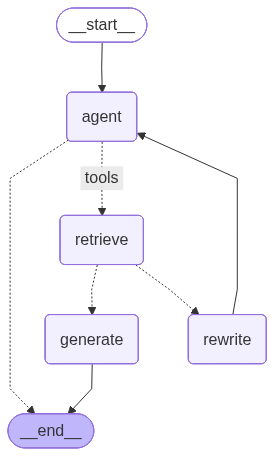

In [38]:
#🧰 STEP 6: Define Agent Node Logic to Use Tools
from langchain_core.messages import BaseMessage
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

# Define the AgentState type to hold conversation messages
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

def agent(state: AgentState) -> AgentState:
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]

    # Bind tools to the LLM
    model_with_tools = llm.bind_tools(tools)

    # Invoke the model with current conversation messages
    response = model_with_tools.invoke(messages)

    # Return the new message appended to conversation
    return {"messages": [response]}

# 📌 Explanation:
# This function takes conversation history, lets the LLM decide if it wants to call a retriever tool, and produces the next response.

#🧰 STEP 7: Define Edges to Grade Retrieved Docs for Relevance
from typing import Literal
from pydantic import BaseModel, Field
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain import hub

def grade_documents(state) -> Literal["generate", "rewrite"]:
    """Determines whether the retrieved documents are relevant to the question.
    
    Args:
        state (messages): The current state
    
    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("---CHECK RELEVANCE---")

    class Grade(BaseModel):
        """Binary score for relevance check."""
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    model_struct = llm.with_structured_output(Grade)
    
    prompt = PromptTemplate(
        template=(
            "You are a grader assessing relevance of a retrieved document to a user question.\n"
            "Here is the retrieved document:\n\n{context}\n\n"
            "Here is the user question: {question}\n"
            "If the document contains keyword(s) or semantic meaning related to the user question, "
            "grade it as relevant.\nGive a binary score 'yes' or 'no'."
        ),
        input_variables=["context", "question"],
    )
    
    chain = prompt | model_struct
    messages = state["messages"]
    question = messages[0].content
    docs = messages[-1].content
    
    scored_result = chain.invoke({"question": question, "context": docs})
    
    if scored_result.binary_score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewrite"
# 📌 Explanation:
# After retrieving documents, the LLM checks if they're relevant. If yes, generate an answer; otherwise, rewrite the question.


#🧰 STEP 8: Define Generate and Rewrite Nodes
from langchain_core.messages import HumanMessage

def generate(state: AgentState) -> AgentState:
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    docs = messages[-1].content
    
    # Load prompt template from LangChain Hub
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm | StrOutputParser()
    
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


def rewrite(state: AgentState) -> AgentState:
    """
    Transform the query to produce a better question.
    
    Args:
        state (messages): The current state
    
    Returns:
        dict: The updated state with re-phrased question
    """
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
    HumanMessage(
        content=f"""
Look at the input and try to reason about the underlying semantic intent / meaning. \n
Here is the initial question:
\n -------- \n
{question}
\n -------- \n
Formulate an improved question:"""
    )
]

    response = llm.invoke(msg)
    return {"messages": [response]}
# 📌 Explanation:
# •	generate: Answers the question using relevant documents.
# •	rewrite: Improves the question when retrieved docs aren't good enough.

#🧱 STEP 9: Create and Compile the LangGraph Workflow
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

# Create the workflow graph for the conversation
workflow = StateGraph(AgentState)

# Add nodes for agent, retrieval, rewriting, generating
workflow.add_node("agent", agent)
retrieve = ToolNode([retriever_tool, retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)
workflow.add_node("rewrite", rewrite)
workflow.add_node("generate", generate)

# Define graph edges (flow)

# Start with agent node
workflow.add_edge(START, "agent")

# Agent decides whether to call tools or end
workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools": "retrieve",
        END: END,
    }
)

# After retrieval, grade docs for relevance
workflow.add_conditional_edges("retrieve", grade_documents)

# If relevant, generate answer and end
workflow.add_edge("generate", END)

# If not relevant, rewrite and go back to agent
workflow.add_edge("rewrite", "agent")

# Compile the graph for running
graph = workflow.compile()
# 📌 Explanation:
# You build a workflow graph defining how the conversation flows: agent decides → retrieve docs → grade relevance → generate or rewrite → repeat.

#👀 STEP 10: Visualize and Run Example Queries
from IPython.display import Image, display

# Show graph structure (visualize)
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))




In [ ]:
# Run example queries
print(graph.invoke({"messages": "What is Langgraph?"}))
# ---CALL AGENT---
# ---CHECK RELEVANCE---
# ---DECISION: DOCS RELEVANT---
# ---GENERATE---
# c:\Python311\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
#   warnings.warn(
# {'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='737811dd-281d-45c8-8997-365cfe46f39f'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qmw52a1z0', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 310, 'total_tokens': 329, 'completion_time': 0.058172246, 'prompt_time': 0.02570159, 'queue_time': 0.0579298, 'total_time': 0.083873836}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fc361c70-5cb2-46c6-a688-6dc240447fa4-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Langgraph'}, 'id': 'qmw52a1z0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 310, 'output_tokens': 19, 'total_tokens': 329}), ToolMessage(content='Workflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    Get started\n    \n  \n\n\n\n\n\n\n\n\n            Get started\n          \n\n\n\n\n\n    Quickstarts\n    \n  \n\n\n\n\n\n            Quickstarts\n          \n\n\n\n\n    Start with a prebuilt agent\n\nfrom langgraph.graph import add_messages\nfrom langchain_core.messages import (\n    SystemMessage,\n    HumanMessage,\n    BaseMessage,\n    ToolCall,\n)\n\n\n@task\ndef call_llm(messages: list[BaseMessage]):\n    """LLM decides whether to call a tool or not"""\n    return llm_with_tools.invoke(\n        [\n            SystemMessage(\n                content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n            )\n        ]\n        + messages\n    )\n\n\n@task\ndef call_tool(tool_call: ToolCall):\n    """Performs the tool call"""\n    tool = tools_by_name[tool_call["name"]]\n    return tool.invoke(tool_call)\n\n\n@entrypoint()\ndef agent(messages: list[BaseMessage]):\n    llm_response = call_llm(messages).result()\n\n    while True:\n        if not llm_response.tool_calls:\n            break\n\nLangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment, observability, and evaluation. See module 6 of LangChain Academy.\n\n\n\n\n\n\n\n  Back to top\n\n\n\n\n\n\n\n\n\n\n                Previous\n              \n\n                Run a local server\n              \n\n\n\n\n\n                Next\n              \n\n                Agent architectures\n\nclass Sections(BaseModel):\n    sections: List[Section] = Field(\n        description="Sections of the report.",\n    )\n\n\n# Augment the LLM with schema for structured output\nplanner = llm.with_structured_output(Sections)\n\nCreating Workers in LangGraph\nBecause orchestrator-worker workflows are common, LangGraph has the Send API to support this. It lets you dynamically create worker nodes and send each one a specific input. Each worker has its own state, and all worker outputs are written to a shared state key that is accessible to the orchestrator graph. This gives the orchestrator access to all worker output and allows it to synthesize them into a final output. As you can see below, we iterate over a list of sections and Send each to a worker node. See further documentation here and here.\nfrom langgraph.types import Send', name='retriever_vector_db_blog', id='2381f30d-6407-4087-a39c-73edad2e95f7', tool_call_id='qmw52a1z0'), HumanMessage(content='LangGraph is a platform that provides features such as persistence, streaming, and deployment for workflows and agents. It supports human-in-the-loop interactions, conversational memory, and long-term memory, as well as easy deployment and evaluation. The context does not provide a detailed definition of LangGraph, but it appears to be a tool for building and managing complex workflows and agent architectures.', additional_kwargs={}, response_metadata={}, id='98767dd5-2f65-46a2-838c-947c9420a1e7')]}

print(graph.invoke({"messages": "What is Langchain?"}))
# ---CALL AGENT---
# ---CHECK RELEVANCE---
# ---DECISION: DOCS RELEVANT---
# ---GENERATE---
# c:\Python311\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
#   warnings.warn(
# {'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='59d57d21-f28d-464f-94ff-1094d9939827'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3mzv5964h', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 310, 'total_tokens': 332, 'completion_time': 0.046476691, 'prompt_time': 0.02657028, 'queue_time': 0.05894284, 'total_time': 0.073046971}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c6f8962c-7a17-448e-be8a-9d151403ca14-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'What is Langchain?'}, 'id': '3mzv5964h', 'type': 'tool_call'}], usage_metadata={'input_tokens': 310, 'output_tokens': 22, 'total_tokens': 332}), ToolMessage(content='Tutorials | 🦜️🔗 LangChain\n\nPipCondapip install langchain-core langgraph>0.2.27conda install langchain-core langgraph>0.2.27 -c conda-forge\nFor more details, see our Installation guide.\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls.\nAs these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent.\nThe best way to do this is with LangSmith.\nAfter you sign up at the link above, (you\'ll need to create an API key from the Settings -> API Keys page on the LangSmith website), make sure to set your environment variables to start logging traces:\nexport LANGSMITH_TRACING="true"export LANGSMITH_API_KEY="..."\nOr, if in a notebook, you can set them with:\nimport getpassimport osos.environ["LANGSMITH_TRACING"] = "true"os.environ["LANGSMITH_API_KEY"] = getpass.getpass()\nQuickstart\u200b\n\nSelect vector store:In-memory▾In-memoryAstraDBChromaFAISSMilvusMongoDBPGVectorPGVectorStorePineconeQdrantpip install -qU langchain-corefrom langchain_core.vectorstores import InMemoryVectorStorevector_store = InMemoryVectorStore(embeddings)\nDependencies\u200b\nIn addition, we\'ll use the following packages:\n%%capture --no-stderr%pip install --upgrade --quiet langgraph langchain-community beautifulsoup4\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls. As these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with LangSmith.\nNote that LangSmith is not needed, but it is helpful. If you do want to use LangSmith, after you sign up at the link above, make sure to set your environment variables to start logging traces:\n\nNew to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.\nGet started\u200b\nFamiliarize yourself with LangChain\'s open-source components by building simple applications.\nIf you\'re looking to get started with chat models, vector stores,\nor other LangChain components from a specific provider, check out our supported integrations.', name='retriever_vector_langchain_blog', id='e5009687-8627-400a-8a4a-19d1d1eeb65f', tool_call_id='3mzv5964h'), HumanMessage(content='LangChain is an open-source platform for building applications with Large Language Models (LLMs). It provides components such as vector stores and tools like LangSmith for inspecting and logging complex applications. LangChain allows users to build and deploy LLM-based applications, with support for various integrations and dependencies.', additional_kwargs={}, response_metadata={}, id='cfacc6e4-4d48-4d3e-910a-de82afe2451a')]}

print(graph.invoke({"messages": "What is Machine learning?"}))
# ---CALL AGENT---
# ---CHECK RELEVANCE---
# ---DECISION: DOCS NOT RELEVANT---
# ---TRANSFORM QUERY---
# ---CALL AGENT---
# {'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='e92a5a69-80b3-46da-a6ce-6d38e90ac8ff'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'k7897mvqp', 'function': {'arguments': '{"query":"Machine learning definition"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 310, 'total_tokens': 330, 'completion_time': 0.05495792, 'prompt_time': 0.132264968, 'queue_time': 0.237653581, 'total_time': 0.187222888}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--511f2a3e-9eef-4ce7-95d7-d75ffb8a162a-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Machine learning definition'}, 'id': 'k7897mvqp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 310, 'output_tokens': 20, 'total_tokens': 330}), ToolMessage(content='_set_env("ANTHROPIC_API_KEY")\n\nllm = ChatAnthropic(model="claude-3-5-sonnet-latest")\n\nBuilding Blocks: The Augmented LLM¶\nLLM have augmentations that support building workflows and agents. These include structured outputs and tool calling, as shown in this image from the Anthropic blog on Building Effective Agents:\n\n# Schema for structured output\nfrom pydantic import BaseModel, Field\n\nclass SearchQuery(BaseModel):\n    search_query: str = Field(None, description="Query that is optimized web search.")\n    justification: str = Field(\n        None, description="Why this query is relevant to the user\'s request."\n    )\n\n\n# Augment the LLM with schema for structured output\nstructured_llm = llm.with_structured_output(SearchQuery)\n\n# Invoke the augmented LLM\noutput = structured_llm.invoke("How does Calcium CT score relate to high cholesterol?")\n\n# Define a tool\ndef multiply(a: int, b: int) -> int:\n    return a * b\n\n# Augment the LLM with tools\nllm_with_tools = llm.bind_tools([multiply])\n\n# Nodes\ndef llm_call(state: MessagesState):\n    """LLM decides whether to call a tool or not"""\n\n    return {\n        "messages": [\n            llm_with_tools.invoke(\n                [\n                    SystemMessage(\n                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."\n                    )\n                ]\n                + state["messages"]\n            )\n        ]\n    }\n\n\ndef tool_node(state: dict):\n    """Performs the tool call"""\n\n    result = []\n    for tool_call in state["messages"][-1].tool_calls:\n        tool = tools_by_name[tool_call["name"]]\n        observation = tool.invoke(tool_call["args"])\n        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))\n    return {"messages": result}\n\n# Show the workflow\ndisplay(Image(optimizer_workflow.get_graph().draw_mermaid_png()))\n\n# Invoke\nstate = optimizer_workflow.invoke({"topic": "Cats"})\nprint(state["joke"])\n\nLangSmith Trace\nhttps://smith.langchain.com/public/86ab3e60-2000-4bff-b988-9b89a3269789/r\nResources:\nExamples\nHere is an assistant that uses evaluator-optimizer to improve a report. See our video here.\nHere is a RAG workflow that grades answers for hallucinations or errors. See our video here.\n\n\n# Schema for structured output to use in evaluation\nclass Feedback(BaseModel):\n    grade: Literal["funny", "not funny"] = Field(\n        description="Decide if the joke is funny or not.",\n    )\n    feedback: str = Field(\n        description="If the joke is not funny, provide feedback on how to improve it.",\n    )\n\n\n# Augment the LLM with schema for structured output\nevaluator = llm.with_structured_output(Feedback)\n\n# Nodes\n@task\ndef llm_call_generator(topic: str, feedback: Feedback):\n    """LLM generates a joke"""\n    if feedback:\n        msg = llm.invoke(\n            f"Write a joke about {topic} but take into account the feedback: {feedback}"\n        )\n    else:\n        msg = llm.invoke(f"Write a joke about {topic}")\n    return msg.content\n\n\n@task\ndef llm_call_evaluator(joke: str):\n    """LLM evaluates the joke"""\n    feedback = evaluator.invoke(f"Grade the joke {joke}")\n    return feedback\n\n\n@entrypoint()\ndef optimizer_workflow(topic: str):\n    feedback = None\n    while True:\n        joke = llm_call_generator(topic, feedback).result()\n        feedback = llm_call_evaluator(joke).result()\n        if feedback.grade == "funny":\n            break\n\n    return joke\n\n# Invoke\nfor step in optimizer_workflow.stream("Cats", stream_mode="updates"):\n    print(step)\n    print("\\n")\n\nLangSmith Trace\nhttps://smith.langchain.com/public/f66830be-4339-4a6b-8a93-389ce5ae27b4/r', name='retriever_vector_db_blog', id='913c17fe-3074-4f06-8266-7b2543305c4f', tool_call_id='k7897mvqp'), AIMessage(content='The initial question "What is Machine learning?" is quite broad and doesn\'t provide much context. To formulate an improved question, let\'s try to reason about the underlying semantic intent.\n\nIt seems the user is seeking a definition or an explanation of the concept of Machine Learning. However, to provide a more accurate and relevant response, it would be helpful to know what aspect of Machine Learning the user is interested in. Are they looking for a general overview, its applications, or something more specific like its techniques or tools?\n\nHere\'s an improved question:\n\n"What is Machine Learning, and how does it work?"\n\nor \n\n"Can you provide a brief introduction to Machine Learning, including its key concepts and applications?"\n\nor \n\n"What are the fundamental principles and techniques of Machine Learning?"\n\nThese rephrased questions provide more context and clarity, allowing for a more targeted and informative response.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 175, 'prompt_tokens': 73, 'total_tokens': 248, 'completion_time': 0.490097152, 'prompt_time': 0.010316009, 'queue_time': 0.072387431, 'total_time': 0.500413161}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--52d0cee4-67c6-4c11-81c0-ff03e0df01f3-0', usage_metadata={'input_tokens': 73, 'output_tokens': 175, 'total_tokens': 248}), AIMessage(content='', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 1371, 'total_tokens': 1372, 'completion_time': 0.007142965, 'prompt_time': 0.086576499, 'queue_time': None, 'total_time': 0.093719464}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f25bd29d-be60-48d4-9d8d-977d4197205b-0', usage_metadata={'input_tokens': 1371, 'output_tokens': 1, 'total_tokens': 1372})]}

# 📌 Explanation:
# You visualize your graph and test it with sample questions to see how it works.


---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---
{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='e92a5a69-80b3-46da-a6ce-6d38e90ac8ff'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'k7897mvqp', 'function': {'arguments': '{"query":"Machine learning definition"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 310, 'total_tokens': 330, 'completion_time': 0.05495792, 'prompt_time': 0.132264968, 'queue_time': 0.237653581, 'total_time': 0.187222888}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--511f2a3e-9eef-4ce7-95d7-d75ffb8a162a-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Machine learning definition'}, 'id': 

In [17]:
!pip install faiss-cpu

     ---------------------------------------- 18.2/18.2 MB 2.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install beautifulsoup4


     ------------------------------------ 105.1/105.1 kB 759.0 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
